In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime
import sys
sys.path.append("..")
from train import BodyPartsMeasurementTrainer
from body_parts_measurement_data_generator import BodyPartsMeasurementDataGenerator
import tensorflow as tf
from evaluator import Evaluator
from model.model import get_model
from tqdm import tqdm

2024-10-19 14:30:25.698125: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-19 14:30:27.630253: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-19 14:30:27.638408: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-19 14:30:34.215612: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
config = {
    # model
    'input_shape': [256,256,3],     # 훈련 이미지 크기
    'batch_size': 4,                # 배치 사이즈
    'path_pretrained': None,        # pretrained 모델 경로
    'type_backbone': "blazepose",   # backbone type (blazepose, mobilenet_v3)
    
    # loss
    'type_loss_fn': 'wing',         # 손실 함수 설정 (wing, mae)
    
    # data
    'seg_shape': [64,64],           # segmentation 크기 *미사용
    'path_classes': "../seg_classes.txt",   # segmentation class 정보 *미사용
    'shuffle': True,                # 데이터 섞기
    'is_normalized': False,         # normalize 데이터
    'is_with_seg': False,           # segmentation 사용 여부 *미사용
    'path_dataset': "/home/juhwan/Documents/capstone/body_part_measurement/dataset/korean_body", # 데이터 경로
    ## attention type              
    'type_attention': "regression", # attention 종류 (regression, categorical, none)
    'num_category_bmi': 10,         # categorical 시의 bmi category 갯수 변수
    'num_category_height': 10,      # categorical 시의 height category 갯수 변수
    'has_filename': False,          # 파일 이름이 주어지는지 여부

    # train
    'epochs': 30,                   # 훈련 epoch 수
    'eval_term': 1                  # 평가 빈도
}

In [3]:
model = get_model(config)

2024-10-19 14:30:50.779395: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
# model.load_weights('blazepose_attention_31features_731train_mf/blazepose_attention_0_2.994556342230903.h5')
# model.load_weights('blazepose_attention_0_3.2034787193590604.h5')
model.load_weights('blazepose_attention_27_0.3352749294704861.h5')

In [5]:
data_generator_test = BodyPartsMeasurementDataGenerator(config, data_type="/validation")
len(data_generator_test)

list_user_dirs ['F001', 'F002', 'F003', 'F004', 'F009', 'F010', 'F011', 'F012', 'F013', 'F014', 'F015', 'F016', 'F017', 'F018', 'F019', 'F020', 'F021', 'F022', 'F023', 'F024', 'F025', 'F026', 'F027', 'F028', 'F029', 'F030', 'M001', 'M002', 'M003', 'M004']


2880

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
evaluator = Evaluator(data_generator_test, model)

In [8]:
evaluator.run_evaluation()

  0%|          | 0/2880 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  0%|          | 1/2880 [00:02<1:59:07,  2.48s/it]

1/1 [==============================] - 0s 70ms/step


  0%|          | 2/2880 [00:02<59:38,  1.24s/it]  

1/1 [==============================] - 0s 72ms/step


  0%|          | 3/2880 [00:03<39:53,  1.20it/s]

1/1 [==============================] - 0s 77ms/step


  0%|          | 4/2880 [00:03<30:52,  1.55it/s]

1/1 [==============================] - 0s 75ms/step


  0%|          | 5/2880 [00:03<25:36,  1.87it/s]

1/1 [==============================] - 0s 75ms/step


  0%|          | 6/2880 [00:04<22:48,  2.10it/s]

1/1 [==============================] - 0s 86ms/step


  0%|          | 7/2880 [00:04<20:55,  2.29it/s]

1/1 [==============================] - 0s 64ms/step


  0%|          | 8/2880 [00:04<19:19,  2.48it/s]

1/1 [==============================] - 0s 68ms/step


  0%|          | 9/2880 [00:05<18:14,  2.62it/s]

1/1 [==============================] - 0s 72ms/step


  0%|          | 10/2880 [00:05<17:40,  2.71it/s]

1/1 [==============================] - 0s 67ms/step


  0%|          | 11/2880 [00:05<16:29,  2.90it/s]

1/1 [==============================] - 0s 70ms/step


  0%|          | 12/2880 [00:06<15:32,  3.08it/s]

1/1 [==============================] - 0s 75ms/step


  0%|          | 13/2880 [00:06<15:53,  3.01it/s]

1/1 [==============================] - 0s 69ms/step


  0%|          | 14/2880 [00:06<15:42,  3.04it/s]

1/1 [==============================] - 0s 81ms/step


  1%|          | 15/2880 [00:07<16:20,  2.92it/s]

1/1 [==============================] - 0s 67ms/step


  1%|          | 16/2880 [00:07<16:20,  2.92it/s]

1/1 [==============================] - 0s 69ms/step


  1%|          | 17/2880 [00:07<16:04,  2.97it/s]

1/1 [==============================] - 0s 76ms/step


  1%|          | 18/2880 [00:08<16:14,  2.94it/s]

1/1 [==============================] - 0s 70ms/step


  1%|          | 19/2880 [00:08<15:19,  3.11it/s]

1/1 [==============================] - 0s 74ms/step


  1%|          | 20/2880 [00:08<14:57,  3.19it/s]

1/1 [==============================] - 0s 77ms/step


  1%|          | 21/2880 [00:09<15:19,  3.11it/s]

1/1 [==============================] - 0s 64ms/step


  1%|          | 22/2880 [00:09<16:01,  2.97it/s]

1/1 [==============================] - 0s 73ms/step


  1%|          | 23/2880 [00:09<16:12,  2.94it/s]

1/1 [==============================] - 0s 62ms/step


  1%|          | 24/2880 [00:10<16:00,  2.97it/s]

1/1 [==============================] - 0s 67ms/step


  1%|          | 25/2880 [00:10<16:17,  2.92it/s]

1/1 [==============================] - 0s 70ms/step


  1%|          | 26/2880 [00:10<16:04,  2.96it/s]

1/1 [==============================] - 0s 74ms/step


  1%|          | 27/2880 [00:11<15:25,  3.08it/s]

1/1 [==============================] - 0s 76ms/step


  1%|          | 28/2880 [00:11<15:34,  3.05it/s]

1/1 [==============================] - 0s 70ms/step


  1%|          | 29/2880 [00:11<15:39,  3.03it/s]

1/1 [==============================] - 0s 63ms/step


  1%|          | 30/2880 [00:12<15:37,  3.04it/s]

1/1 [==============================] - 0s 68ms/step


  1%|          | 31/2880 [00:12<15:29,  3.06it/s]

1/1 [==============================] - 0s 71ms/step


  1%|          | 32/2880 [00:12<16:11,  2.93it/s]

1/1 [==============================] - 0s 63ms/step


  1%|          | 33/2880 [00:13<16:19,  2.91it/s]

1/1 [==============================] - 0s 67ms/step


  1%|          | 34/2880 [00:13<16:38,  2.85it/s]

1/1 [==============================] - 0s 68ms/step


  1%|          | 35/2880 [00:13<15:23,  3.08it/s]

1/1 [==============================] - 0s 71ms/step


  1%|▏         | 36/2880 [00:14<14:40,  3.23it/s]

1/1 [==============================] - 0s 72ms/step


  1%|▏         | 37/2880 [00:14<15:02,  3.15it/s]

1/1 [==============================] - 0s 68ms/step


  1%|▏         | 38/2880 [00:14<15:19,  3.09it/s]

1/1 [==============================] - 0s 68ms/step


  1%|▏         | 39/2880 [00:15<15:12,  3.11it/s]

1/1 [==============================] - 0s 71ms/step


  1%|▏         | 40/2880 [00:15<15:25,  3.07it/s]

1/1 [==============================] - 0s 79ms/step


  1%|▏         | 41/2880 [00:15<15:42,  3.01it/s]

1/1 [==============================] - 0s 69ms/step


  1%|▏         | 42/2880 [00:16<15:53,  2.98it/s]

1/1 [==============================] - 0s 74ms/step


  1%|▏         | 43/2880 [00:16<15:52,  2.98it/s]

1/1 [==============================] - 0s 71ms/step


  2%|▏         | 44/2880 [00:16<15:35,  3.03it/s]

1/1 [==============================] - 0s 76ms/step


  2%|▏         | 45/2880 [00:17<15:29,  3.05it/s]

1/1 [==============================] - 0s 71ms/step


  2%|▏         | 46/2880 [00:17<15:23,  3.07it/s]

1/1 [==============================] - 0s 71ms/step


  2%|▏         | 47/2880 [00:17<15:17,  3.09it/s]

1/1 [==============================] - 0s 80ms/step


  2%|▏         | 48/2880 [00:18<15:21,  3.07it/s]

1/1 [==============================] - 0s 79ms/step


  2%|▏         | 49/2880 [00:18<15:36,  3.02it/s]

1/1 [==============================] - 0s 68ms/step


  2%|▏         | 50/2880 [00:18<15:28,  3.05it/s]

1/1 [==============================] - 0s 75ms/step


  2%|▏         | 51/2880 [00:19<15:56,  2.96it/s]

1/1 [==============================] - 0s 77ms/step


  2%|▏         | 52/2880 [00:19<16:18,  2.89it/s]

1/1 [==============================] - 0s 70ms/step


  2%|▏         | 53/2880 [00:19<16:13,  2.90it/s]

1/1 [==============================] - 0s 72ms/step


  2%|▏         | 54/2880 [00:20<15:54,  2.96it/s]

1/1 [==============================] - 0s 71ms/step


  2%|▏         | 55/2880 [00:20<15:42,  3.00it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 56/2880 [00:20<15:45,  2.99it/s]

1/1 [==============================] - 0s 75ms/step


  2%|▏         | 57/2880 [00:21<15:58,  2.95it/s]

1/1 [==============================] - 0s 70ms/step


  2%|▏         | 58/2880 [00:21<15:38,  3.01it/s]

1/1 [==============================] - 0s 65ms/step


  2%|▏         | 59/2880 [00:21<15:23,  3.06it/s]

1/1 [==============================] - 0s 66ms/step


  2%|▏         | 60/2880 [00:22<15:51,  2.96it/s]

1/1 [==============================] - 0s 71ms/step


  2%|▏         | 61/2880 [00:22<15:49,  2.97it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 62/2880 [00:22<15:28,  3.04it/s]

1/1 [==============================] - 0s 77ms/step


  2%|▏         | 63/2880 [00:23<15:37,  3.01it/s]

1/1 [==============================] - 0s 78ms/step


  2%|▏         | 64/2880 [00:23<16:03,  2.92it/s]

1/1 [==============================] - 0s 64ms/step


  2%|▏         | 65/2880 [00:23<16:00,  2.93it/s]

1/1 [==============================] - 0s 72ms/step


  2%|▏         | 66/2880 [00:24<16:12,  2.89it/s]

1/1 [==============================] - 0s 74ms/step


  2%|▏         | 67/2880 [00:24<15:58,  2.94it/s]

1/1 [==============================] - 0s 75ms/step


  2%|▏         | 68/2880 [00:24<15:56,  2.94it/s]

1/1 [==============================] - 0s 79ms/step


  2%|▏         | 69/2880 [00:25<16:17,  2.88it/s]

1/1 [==============================] - 0s 70ms/step


  2%|▏         | 70/2880 [00:25<16:21,  2.86it/s]

1/1 [==============================] - 0s 91ms/step


  2%|▏         | 71/2880 [00:25<16:22,  2.86it/s]

1/1 [==============================] - 0s 74ms/step


  2%|▎         | 72/2880 [00:26<16:10,  2.89it/s]

1/1 [==============================] - 0s 65ms/step


  3%|▎         | 73/2880 [00:26<15:58,  2.93it/s]

1/1 [==============================] - 0s 80ms/step


  3%|▎         | 74/2880 [00:26<16:06,  2.90it/s]

1/1 [==============================] - 0s 76ms/step


  3%|▎         | 75/2880 [00:27<15:52,  2.95it/s]

1/1 [==============================] - 0s 73ms/step


  3%|▎         | 76/2880 [00:27<15:35,  3.00it/s]

1/1 [==============================] - 0s 69ms/step


  3%|▎         | 77/2880 [00:27<15:32,  3.01it/s]

1/1 [==============================] - 0s 66ms/step


  3%|▎         | 78/2880 [00:28<15:14,  3.07it/s]

1/1 [==============================] - 0s 72ms/step


  3%|▎         | 79/2880 [00:28<15:06,  3.09it/s]

1/1 [==============================] - 0s 67ms/step


  3%|▎         | 80/2880 [00:28<15:23,  3.03it/s]

1/1 [==============================] - 0s 67ms/step


  3%|▎         | 81/2880 [00:29<15:19,  3.04it/s]

1/1 [==============================] - 0s 66ms/step


  3%|▎         | 82/2880 [00:29<15:16,  3.05it/s]

1/1 [==============================] - 0s 70ms/step


  3%|▎         | 83/2880 [00:29<15:10,  3.07it/s]

1/1 [==============================] - 0s 71ms/step


  3%|▎         | 84/2880 [00:30<15:37,  2.98it/s]

1/1 [==============================] - 0s 73ms/step


  3%|▎         | 85/2880 [00:30<15:27,  3.01it/s]

1/1 [==============================] - 0s 71ms/step


  3%|▎         | 86/2880 [00:30<15:45,  2.96it/s]

1/1 [==============================] - 0s 66ms/step


  3%|▎         | 87/2880 [00:31<15:22,  3.03it/s]

1/1 [==============================] - 0s 61ms/step


  3%|▎         | 88/2880 [00:31<14:59,  3.11it/s]

1/1 [==============================] - 0s 70ms/step


  3%|▎         | 89/2880 [00:31<14:59,  3.10it/s]

1/1 [==============================] - 0s 76ms/step


  3%|▎         | 90/2880 [00:32<15:12,  3.06it/s]

1/1 [==============================] - 0s 69ms/step


  3%|▎         | 91/2880 [00:32<15:18,  3.04it/s]

1/1 [==============================] - 0s 71ms/step


  3%|▎         | 92/2880 [00:32<15:18,  3.04it/s]

1/1 [==============================] - 0s 73ms/step


  3%|▎         | 93/2880 [00:33<15:49,  2.93it/s]

1/1 [==============================] - 0s 67ms/step


  3%|▎         | 94/2880 [00:33<16:01,  2.90it/s]

1/1 [==============================] - 0s 69ms/step


  3%|▎         | 95/2880 [00:33<15:56,  2.91it/s]

1/1 [==============================] - 0s 65ms/step


  3%|▎         | 96/2880 [00:34<15:43,  2.95it/s]

1/1 [==============================] - 0s 77ms/step


  3%|▎         | 97/2880 [00:34<15:48,  2.93it/s]

1/1 [==============================] - 0s 74ms/step


  3%|▎         | 98/2880 [00:34<16:07,  2.88it/s]

1/1 [==============================] - 0s 81ms/step


  3%|▎         | 99/2880 [00:35<16:09,  2.87it/s]

1/1 [==============================] - 0s 68ms/step


  3%|▎         | 100/2880 [00:35<16:08,  2.87it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▎         | 101/2880 [00:35<15:44,  2.94it/s]

1/1 [==============================] - 0s 78ms/step


  4%|▎         | 102/2880 [00:36<15:43,  2.94it/s]

1/1 [==============================] - 0s 71ms/step


  4%|▎         | 103/2880 [00:36<15:24,  3.00it/s]

1/1 [==============================] - 0s 71ms/step


  4%|▎         | 104/2880 [00:36<15:35,  2.97it/s]

1/1 [==============================] - 0s 70ms/step


  4%|▎         | 105/2880 [00:37<15:22,  3.01it/s]

1/1 [==============================] - 0s 88ms/step


  4%|▎         | 106/2880 [00:37<15:28,  2.99it/s]

1/1 [==============================] - 0s 66ms/step


  4%|▎         | 107/2880 [00:37<15:42,  2.94it/s]

1/1 [==============================] - 0s 66ms/step


  4%|▍         | 108/2880 [00:38<15:18,  3.02it/s]

1/1 [==============================] - 0s 73ms/step


  4%|▍         | 109/2880 [00:38<15:31,  2.97it/s]

1/1 [==============================] - 0s 76ms/step


  4%|▍         | 110/2880 [00:39<16:07,  2.86it/s]

1/1 [==============================] - 0s 69ms/step


  4%|▍         | 111/2880 [00:39<15:35,  2.96it/s]

1/1 [==============================] - 0s 72ms/step


  4%|▍         | 112/2880 [00:39<15:51,  2.91it/s]

1/1 [==============================] - 0s 67ms/step


  4%|▍         | 113/2880 [00:40<15:55,  2.89it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▍         | 114/2880 [00:40<15:27,  2.98it/s]

1/1 [==============================] - 0s 71ms/step


  4%|▍         | 115/2880 [00:40<16:17,  2.83it/s]

1/1 [==============================] - 0s 69ms/step


  4%|▍         | 116/2880 [00:41<16:01,  2.87it/s]

1/1 [==============================] - 0s 75ms/step


  4%|▍         | 117/2880 [00:41<15:58,  2.88it/s]

1/1 [==============================] - 0s 70ms/step


  4%|▍         | 118/2880 [00:41<15:45,  2.92it/s]

1/1 [==============================] - 0s 63ms/step


  4%|▍         | 119/2880 [00:42<15:16,  3.01it/s]

1/1 [==============================] - 0s 66ms/step


  4%|▍         | 120/2880 [00:42<15:07,  3.04it/s]

1/1 [==============================] - 0s 66ms/step


  4%|▍         | 121/2880 [00:42<15:09,  3.03it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▍         | 122/2880 [00:43<15:06,  3.04it/s]

1/1 [==============================] - 0s 68ms/step


  4%|▍         | 123/2880 [00:43<14:58,  3.07it/s]

1/1 [==============================] - 0s 74ms/step


  4%|▍         | 124/2880 [00:43<15:48,  2.91it/s]

1/1 [==============================] - 0s 78ms/step


  4%|▍         | 125/2880 [00:44<16:08,  2.85it/s]

1/1 [==============================] - 0s 65ms/step


  4%|▍         | 126/2880 [00:44<15:51,  2.89it/s]

1/1 [==============================] - 0s 66ms/step


  4%|▍         | 127/2880 [00:44<15:44,  2.92it/s]

1/1 [==============================] - 0s 72ms/step


  4%|▍         | 128/2880 [00:45<15:34,  2.94it/s]

1/1 [==============================] - 0s 68ms/step


  4%|▍         | 129/2880 [00:45<15:31,  2.95it/s]

1/1 [==============================] - 0s 67ms/step


  5%|▍         | 130/2880 [00:45<15:21,  2.98it/s]

1/1 [==============================] - 0s 73ms/step


  5%|▍         | 131/2880 [00:46<15:05,  3.04it/s]

1/1 [==============================] - 0s 67ms/step


  5%|▍         | 132/2880 [00:46<14:55,  3.07it/s]

1/1 [==============================] - 0s 66ms/step


  5%|▍         | 133/2880 [00:46<14:49,  3.09it/s]

1/1 [==============================] - 0s 70ms/step


  5%|▍         | 134/2880 [00:47<14:44,  3.10it/s]

1/1 [==============================] - 0s 70ms/step


  5%|▍         | 135/2880 [00:47<14:38,  3.12it/s]

1/1 [==============================] - 0s 64ms/step


  5%|▍         | 136/2880 [00:47<14:42,  3.11it/s]

1/1 [==============================] - 0s 70ms/step


  5%|▍         | 137/2880 [00:48<14:33,  3.14it/s]

1/1 [==============================] - 0s 68ms/step


  5%|▍         | 138/2880 [00:48<14:43,  3.10it/s]

1/1 [==============================] - 0s 70ms/step


  5%|▍         | 139/2880 [00:48<14:45,  3.09it/s]

1/1 [==============================] - 0s 77ms/step


  5%|▍         | 140/2880 [00:49<14:58,  3.05it/s]

1/1 [==============================] - 0s 66ms/step


  5%|▍         | 141/2880 [00:49<14:44,  3.10it/s]

1/1 [==============================] - 0s 72ms/step


  5%|▍         | 142/2880 [00:49<14:54,  3.06it/s]

1/1 [==============================] - 0s 65ms/step


  5%|▍         | 143/2880 [00:49<14:37,  3.12it/s]

1/1 [==============================] - 0s 66ms/step


  5%|▌         | 144/2880 [00:50<15:01,  3.04it/s]

1/1 [==============================] - 0s 67ms/step


  5%|▌         | 145/2880 [00:50<15:27,  2.95it/s]

1/1 [==============================] - 0s 66ms/step


  5%|▌         | 146/2880 [00:51<15:41,  2.90it/s]

1/1 [==============================] - 0s 68ms/step


  5%|▌         | 147/2880 [00:51<15:15,  2.98it/s]

1/1 [==============================] - 0s 62ms/step


  5%|▌         | 148/2880 [00:51<15:09,  3.00it/s]

1/1 [==============================] - 0s 66ms/step


  5%|▌         | 149/2880 [00:52<15:08,  3.01it/s]

1/1 [==============================] - 0s 76ms/step


  5%|▌         | 150/2880 [00:52<15:02,  3.02it/s]

1/1 [==============================] - 0s 64ms/step


  5%|▌         | 151/2880 [00:52<14:56,  3.04it/s]

1/1 [==============================] - 0s 74ms/step


  5%|▌         | 152/2880 [00:52<14:59,  3.03it/s]

1/1 [==============================] - 0s 69ms/step


  5%|▌         | 153/2880 [00:53<15:14,  2.98it/s]

1/1 [==============================] - 0s 69ms/step


  5%|▌         | 154/2880 [00:53<15:27,  2.94it/s]

1/1 [==============================] - 0s 79ms/step


  5%|▌         | 155/2880 [00:54<15:36,  2.91it/s]

1/1 [==============================] - 0s 67ms/step


  5%|▌         | 156/2880 [00:54<15:39,  2.90it/s]

1/1 [==============================] - 0s 67ms/step


  5%|▌         | 157/2880 [00:54<15:27,  2.93it/s]

1/1 [==============================] - 0s 68ms/step


  5%|▌         | 158/2880 [00:55<15:30,  2.92it/s]

1/1 [==============================] - 0s 81ms/step


  6%|▌         | 159/2880 [00:55<16:10,  2.80it/s]

1/1 [==============================] - 0s 63ms/step


  6%|▌         | 160/2880 [00:55<15:40,  2.89it/s]

1/1 [==============================] - 0s 67ms/step


  6%|▌         | 161/2880 [00:56<15:23,  2.94it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▌         | 162/2880 [00:56<15:40,  2.89it/s]

1/1 [==============================] - 0s 67ms/step


  6%|▌         | 163/2880 [00:56<15:28,  2.93it/s]

1/1 [==============================] - 0s 70ms/step


  6%|▌         | 164/2880 [00:57<15:26,  2.93it/s]

1/1 [==============================] - 0s 65ms/step


  6%|▌         | 165/2880 [00:57<15:32,  2.91it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▌         | 166/2880 [00:57<15:15,  2.96it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▌         | 167/2880 [00:58<15:32,  2.91it/s]

1/1 [==============================] - 0s 71ms/step


  6%|▌         | 168/2880 [00:58<15:18,  2.95it/s]

1/1 [==============================] - 0s 66ms/step


  6%|▌         | 169/2880 [00:58<15:34,  2.90it/s]

1/1 [==============================] - 0s 63ms/step


  6%|▌         | 170/2880 [00:59<15:21,  2.94it/s]

1/1 [==============================] - 0s 64ms/step


  6%|▌         | 171/2880 [00:59<15:23,  2.93it/s]

1/1 [==============================] - 0s 66ms/step


  6%|▌         | 172/2880 [00:59<15:00,  3.01it/s]

1/1 [==============================] - 0s 63ms/step


  6%|▌         | 173/2880 [01:00<14:46,  3.05it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▌         | 174/2880 [01:00<14:57,  3.01it/s]

1/1 [==============================] - 0s 61ms/step


  6%|▌         | 175/2880 [01:00<14:28,  3.11it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▌         | 176/2880 [01:01<14:59,  3.01it/s]

1/1 [==============================] - 0s 58ms/step


  6%|▌         | 177/2880 [01:01<15:09,  2.97it/s]

1/1 [==============================] - 0s 72ms/step


  6%|▌         | 178/2880 [01:01<15:11,  2.97it/s]

1/1 [==============================] - 0s 70ms/step


  6%|▌         | 179/2880 [01:02<15:12,  2.96it/s]

1/1 [==============================] - 0s 71ms/step


  6%|▋         | 180/2880 [01:02<15:13,  2.95it/s]

1/1 [==============================] - 0s 73ms/step


  6%|▋         | 181/2880 [01:02<15:21,  2.93it/s]

1/1 [==============================] - 0s 70ms/step


  6%|▋         | 182/2880 [01:03<15:17,  2.94it/s]

1/1 [==============================] - 0s 77ms/step


  6%|▋         | 183/2880 [01:03<15:28,  2.90it/s]

1/1 [==============================] - 0s 64ms/step


  6%|▋         | 184/2880 [01:03<15:13,  2.95it/s]

1/1 [==============================] - 0s 65ms/step


  6%|▋         | 185/2880 [01:04<15:10,  2.96it/s]

1/1 [==============================] - 0s 65ms/step


  6%|▋         | 186/2880 [01:04<14:54,  3.01it/s]

1/1 [==============================] - 0s 66ms/step


  6%|▋         | 187/2880 [01:04<14:39,  3.06it/s]

1/1 [==============================] - 0s 82ms/step


  7%|▋         | 188/2880 [01:05<14:52,  3.01it/s]

1/1 [==============================] - 0s 72ms/step


  7%|▋         | 189/2880 [01:05<14:57,  3.00it/s]

1/1 [==============================] - 0s 70ms/step


  7%|▋         | 190/2880 [01:05<14:44,  3.04it/s]

1/1 [==============================] - 0s 65ms/step


  7%|▋         | 191/2880 [01:06<15:23,  2.91it/s]

1/1 [==============================] - 0s 68ms/step


  7%|▋         | 192/2880 [01:06<15:21,  2.92it/s]

1/1 [==============================] - 0s 62ms/step


  7%|▋         | 193/2880 [01:06<15:21,  2.92it/s]

1/1 [==============================] - 0s 71ms/step


  7%|▋         | 194/2880 [01:07<15:25,  2.90it/s]

1/1 [==============================] - 0s 81ms/step


  7%|▋         | 195/2880 [01:07<15:40,  2.85it/s]

1/1 [==============================] - 0s 69ms/step


  7%|▋         | 196/2880 [01:07<15:15,  2.93it/s]

1/1 [==============================] - 0s 69ms/step


  7%|▋         | 197/2880 [01:08<14:54,  3.00it/s]

1/1 [==============================] - 0s 68ms/step


  7%|▋         | 198/2880 [01:08<14:56,  2.99it/s]

1/1 [==============================] - 0s 70ms/step


  7%|▋         | 199/2880 [01:08<15:02,  2.97it/s]

1/1 [==============================] - 0s 75ms/step


  7%|▋         | 200/2880 [01:09<15:22,  2.91it/s]

1/1 [==============================] - 0s 55ms/step


  7%|▋         | 201/2880 [01:09<15:09,  2.95it/s]

1/1 [==============================] - 0s 70ms/step


  7%|▋         | 202/2880 [01:09<15:03,  2.96it/s]

1/1 [==============================] - 0s 73ms/step


  7%|▋         | 203/2880 [01:10<15:07,  2.95it/s]

1/1 [==============================] - 0s 71ms/step


  7%|▋         | 204/2880 [01:10<15:00,  2.97it/s]

1/1 [==============================] - 0s 66ms/step


  7%|▋         | 205/2880 [01:10<14:47,  3.01it/s]

1/1 [==============================] - 0s 70ms/step


  7%|▋         | 206/2880 [01:11<14:34,  3.06it/s]

1/1 [==============================] - 0s 70ms/step


  7%|▋         | 207/2880 [01:11<14:34,  3.06it/s]

1/1 [==============================] - 0s 79ms/step


  7%|▋         | 208/2880 [01:11<14:53,  2.99it/s]

1/1 [==============================] - 0s 69ms/step


  7%|▋         | 209/2880 [01:12<15:01,  2.96it/s]

1/1 [==============================] - 0s 73ms/step


  7%|▋         | 210/2880 [01:12<15:09,  2.94it/s]

1/1 [==============================] - 0s 67ms/step


  7%|▋         | 211/2880 [01:12<14:49,  3.00it/s]

1/1 [==============================] - 0s 77ms/step


  7%|▋         | 212/2880 [01:13<15:05,  2.94it/s]

1/1 [==============================] - 0s 60ms/step


  7%|▋         | 213/2880 [01:13<15:38,  2.84it/s]

1/1 [==============================] - 0s 70ms/step


  7%|▋         | 214/2880 [01:14<15:33,  2.86it/s]

1/1 [==============================] - 0s 78ms/step


  7%|▋         | 215/2880 [01:14<15:19,  2.90it/s]

1/1 [==============================] - 0s 71ms/step


  8%|▊         | 216/2880 [01:14<15:13,  2.92it/s]

1/1 [==============================] - 0s 54ms/step


  8%|▊         | 217/2880 [01:15<14:58,  2.96it/s]

1/1 [==============================] - 0s 67ms/step


  8%|▊         | 218/2880 [01:15<14:41,  3.02it/s]

1/1 [==============================] - 0s 65ms/step


  8%|▊         | 219/2880 [01:15<14:44,  3.01it/s]

1/1 [==============================] - 0s 64ms/step


  8%|▊         | 220/2880 [01:16<14:34,  3.04it/s]

1/1 [==============================] - 0s 62ms/step


  8%|▊         | 221/2880 [01:16<14:21,  3.09it/s]

1/1 [==============================] - 0s 78ms/step


  8%|▊         | 222/2880 [01:16<14:50,  2.98it/s]

1/1 [==============================] - 0s 70ms/step


  8%|▊         | 223/2880 [01:17<14:52,  2.98it/s]

1/1 [==============================] - 0s 66ms/step


  8%|▊         | 224/2880 [01:17<15:16,  2.90it/s]

1/1 [==============================] - 0s 64ms/step


  8%|▊         | 225/2880 [01:17<15:16,  2.90it/s]

1/1 [==============================] - 0s 74ms/step


  8%|▊         | 226/2880 [01:18<14:52,  2.97it/s]

1/1 [==============================] - 0s 63ms/step


  8%|▊         | 227/2880 [01:18<14:37,  3.02it/s]

1/1 [==============================] - 0s 71ms/step


  8%|▊         | 228/2880 [01:18<14:30,  3.05it/s]

1/1 [==============================] - 0s 62ms/step


  8%|▊         | 229/2880 [01:19<14:25,  3.06it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 230/2880 [01:19<14:12,  3.11it/s]

1/1 [==============================] - 0s 71ms/step


  8%|▊         | 231/2880 [01:19<14:31,  3.04it/s]

1/1 [==============================] - 0s 73ms/step


  8%|▊         | 232/2880 [01:19<14:26,  3.06it/s]

1/1 [==============================] - 0s 60ms/step


  8%|▊         | 233/2880 [01:20<14:14,  3.10it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 234/2880 [01:20<14:52,  2.97it/s]

1/1 [==============================] - 0s 62ms/step


  8%|▊         | 235/2880 [01:20<14:39,  3.01it/s]

1/1 [==============================] - 0s 76ms/step


  8%|▊         | 236/2880 [01:21<14:35,  3.02it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 237/2880 [01:21<14:36,  3.02it/s]

1/1 [==============================] - 0s 64ms/step


  8%|▊         | 238/2880 [01:21<14:46,  2.98it/s]

1/1 [==============================] - 0s 84ms/step


  8%|▊         | 239/2880 [01:22<15:07,  2.91it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 240/2880 [01:22<15:16,  2.88it/s]

1/1 [==============================] - 0s 68ms/step


  8%|▊         | 241/2880 [01:23<15:17,  2.88it/s]

1/1 [==============================] - 0s 73ms/step


  8%|▊         | 242/2880 [01:23<14:57,  2.94it/s]

1/1 [==============================] - 0s 65ms/step


  8%|▊         | 243/2880 [01:23<14:46,  2.97it/s]

1/1 [==============================] - 0s 65ms/step


  8%|▊         | 244/2880 [01:24<14:27,  3.04it/s]

1/1 [==============================] - 0s 70ms/step


  9%|▊         | 245/2880 [01:24<14:20,  3.06it/s]

1/1 [==============================] - 0s 71ms/step


  9%|▊         | 246/2880 [01:24<15:12,  2.89it/s]

1/1 [==============================] - 0s 62ms/step


  9%|▊         | 247/2880 [01:25<14:33,  3.01it/s]

1/1 [==============================] - 0s 71ms/step


  9%|▊         | 248/2880 [01:25<14:25,  3.04it/s]

1/1 [==============================] - 0s 73ms/step


  9%|▊         | 249/2880 [01:25<14:44,  2.97it/s]

1/1 [==============================] - 0s 51ms/step


  9%|▊         | 250/2880 [01:26<14:53,  2.94it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▊         | 251/2880 [01:26<15:05,  2.90it/s]

1/1 [==============================] - 0s 73ms/step


  9%|▉         | 252/2880 [01:26<15:02,  2.91it/s]

1/1 [==============================] - 0s 63ms/step


  9%|▉         | 253/2880 [01:27<14:46,  2.96it/s]

1/1 [==============================] - 0s 66ms/step


  9%|▉         | 254/2880 [01:27<14:46,  2.96it/s]

1/1 [==============================] - 0s 70ms/step


  9%|▉         | 255/2880 [01:27<14:50,  2.95it/s]

1/1 [==============================] - 0s 70ms/step


  9%|▉         | 256/2880 [01:28<15:00,  2.91it/s]

1/1 [==============================] - 0s 67ms/step


  9%|▉         | 257/2880 [01:28<14:48,  2.95it/s]

1/1 [==============================] - 0s 69ms/step


  9%|▉         | 258/2880 [01:28<14:35,  3.00it/s]

1/1 [==============================] - 0s 64ms/step


  9%|▉         | 259/2880 [01:29<14:30,  3.01it/s]

1/1 [==============================] - 0s 70ms/step


  9%|▉         | 260/2880 [01:29<14:34,  2.99it/s]

1/1 [==============================] - 0s 74ms/step


  9%|▉         | 261/2880 [01:29<14:48,  2.95it/s]

1/1 [==============================] - 0s 71ms/step


  9%|▉         | 262/2880 [01:30<14:49,  2.94it/s]

1/1 [==============================] - 0s 70ms/step


  9%|▉         | 263/2880 [01:30<14:43,  2.96it/s]

1/1 [==============================] - 0s 75ms/step


  9%|▉         | 264/2880 [01:30<15:11,  2.87it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▉         | 265/2880 [01:31<14:52,  2.93it/s]

1/1 [==============================] - 0s 72ms/step


  9%|▉         | 266/2880 [01:31<15:03,  2.89it/s]

1/1 [==============================] - 0s 65ms/step


  9%|▉         | 267/2880 [01:31<15:13,  2.86it/s]

1/1 [==============================] - 0s 73ms/step


  9%|▉         | 268/2880 [01:32<14:53,  2.92it/s]

1/1 [==============================] - 0s 65ms/step


  9%|▉         | 269/2880 [01:32<14:58,  2.91it/s]

1/1 [==============================] - 0s 80ms/step


  9%|▉         | 270/2880 [01:32<14:48,  2.94it/s]

1/1 [==============================] - 0s 66ms/step


  9%|▉         | 271/2880 [01:33<15:13,  2.86it/s]

1/1 [==============================] - 0s 73ms/step


  9%|▉         | 272/2880 [01:33<15:07,  2.87it/s]

1/1 [==============================] - 0s 65ms/step


  9%|▉         | 273/2880 [01:33<14:53,  2.92it/s]

1/1 [==============================] - 0s 64ms/step


 10%|▉         | 274/2880 [01:34<14:51,  2.92it/s]

1/1 [==============================] - 0s 64ms/step


 10%|▉         | 275/2880 [01:34<14:49,  2.93it/s]

1/1 [==============================] - 0s 73ms/step


 10%|▉         | 276/2880 [01:34<14:17,  3.04it/s]

1/1 [==============================] - 0s 61ms/step


 10%|▉         | 277/2880 [01:35<14:09,  3.06it/s]

1/1 [==============================] - 0s 59ms/step


 10%|▉         | 278/2880 [01:35<13:44,  3.16it/s]

1/1 [==============================] - 0s 64ms/step


 10%|▉         | 279/2880 [01:35<13:19,  3.25it/s]

1/1 [==============================] - 0s 72ms/step


 10%|▉         | 280/2880 [01:36<13:12,  3.28it/s]

1/1 [==============================] - 0s 56ms/step


 10%|▉         | 281/2880 [01:36<13:28,  3.21it/s]

1/1 [==============================] - 0s 64ms/step


 10%|▉         | 282/2880 [01:36<13:15,  3.26it/s]

1/1 [==============================] - 0s 61ms/step


 10%|▉         | 283/2880 [01:37<13:00,  3.33it/s]

1/1 [==============================] - 0s 64ms/step


 10%|▉         | 284/2880 [01:37<12:55,  3.35it/s]

1/1 [==============================] - 0s 66ms/step


 10%|▉         | 285/2880 [01:37<12:48,  3.38it/s]

1/1 [==============================] - 0s 61ms/step


 10%|▉         | 286/2880 [01:37<12:47,  3.38it/s]

1/1 [==============================] - 0s 65ms/step


 10%|▉         | 287/2880 [01:38<12:55,  3.34it/s]

1/1 [==============================] - 0s 86ms/step


 10%|█         | 288/2880 [01:38<13:03,  3.31it/s]

1/1 [==============================] - 0s 67ms/step


 10%|█         | 289/2880 [01:38<13:27,  3.21it/s]

1/1 [==============================] - 0s 64ms/step


 10%|█         | 290/2880 [01:39<13:21,  3.23it/s]

1/1 [==============================] - 0s 70ms/step


 10%|█         | 291/2880 [01:39<13:17,  3.25it/s]

1/1 [==============================] - 0s 71ms/step


 10%|█         | 292/2880 [01:39<13:05,  3.29it/s]

1/1 [==============================] - 0s 75ms/step


 10%|█         | 293/2880 [01:40<13:00,  3.31it/s]

1/1 [==============================] - 0s 67ms/step


 10%|█         | 294/2880 [01:40<12:49,  3.36it/s]

1/1 [==============================] - 0s 62ms/step


 10%|█         | 295/2880 [01:40<13:02,  3.30it/s]

1/1 [==============================] - 0s 62ms/step


 10%|█         | 296/2880 [01:40<12:48,  3.36it/s]

1/1 [==============================] - 0s 64ms/step


 10%|█         | 297/2880 [01:41<12:38,  3.40it/s]

1/1 [==============================] - 0s 74ms/step


 10%|█         | 298/2880 [01:41<13:34,  3.17it/s]

1/1 [==============================] - 0s 69ms/step


 10%|█         | 299/2880 [01:41<14:07,  3.04it/s]

1/1 [==============================] - 0s 72ms/step


 10%|█         | 300/2880 [01:42<14:34,  2.95it/s]

1/1 [==============================] - 0s 74ms/step


 10%|█         | 301/2880 [01:42<14:08,  3.04it/s]

1/1 [==============================] - 0s 69ms/step


 10%|█         | 302/2880 [01:42<13:46,  3.12it/s]

1/1 [==============================] - 0s 68ms/step


 11%|█         | 303/2880 [01:43<13:25,  3.20it/s]

1/1 [==============================] - 0s 65ms/step


 11%|█         | 304/2880 [01:43<13:32,  3.17it/s]

1/1 [==============================] - 0s 62ms/step


 11%|█         | 305/2880 [01:43<13:29,  3.18it/s]

1/1 [==============================] - 0s 71ms/step


 11%|█         | 306/2880 [01:44<13:59,  3.06it/s]

1/1 [==============================] - 0s 59ms/step


 11%|█         | 307/2880 [01:44<13:58,  3.07it/s]

1/1 [==============================] - 0s 61ms/step


 11%|█         | 308/2880 [01:44<13:59,  3.06it/s]

1/1 [==============================] - 0s 64ms/step


 11%|█         | 309/2880 [01:45<13:58,  3.07it/s]

1/1 [==============================] - 0s 61ms/step


 11%|█         | 310/2880 [01:45<13:51,  3.09it/s]

1/1 [==============================] - 0s 69ms/step


 11%|█         | 311/2880 [01:45<14:01,  3.05it/s]

1/1 [==============================] - 0s 71ms/step


 11%|█         | 312/2880 [01:46<14:36,  2.93it/s]

1/1 [==============================] - 0s 68ms/step


 11%|█         | 313/2880 [01:46<14:23,  2.97it/s]

1/1 [==============================] - 0s 68ms/step


 11%|█         | 314/2880 [01:46<14:28,  2.95it/s]

1/1 [==============================] - 0s 72ms/step


 11%|█         | 315/2880 [01:47<14:38,  2.92it/s]

1/1 [==============================] - 0s 67ms/step


 11%|█         | 316/2880 [01:47<14:31,  2.94it/s]

1/1 [==============================] - 0s 63ms/step


 11%|█         | 317/2880 [01:47<14:17,  2.99it/s]

1/1 [==============================] - 0s 67ms/step


 11%|█         | 318/2880 [01:48<14:21,  2.97it/s]

1/1 [==============================] - 0s 68ms/step


 11%|█         | 319/2880 [01:48<14:21,  2.97it/s]

1/1 [==============================] - 0s 66ms/step


 11%|█         | 320/2880 [01:48<14:38,  2.91it/s]

1/1 [==============================] - 0s 60ms/step


 11%|█         | 321/2880 [01:49<14:26,  2.95it/s]

1/1 [==============================] - 0s 80ms/step


 11%|█         | 322/2880 [01:49<16:12,  2.63it/s]

1/1 [==============================] - 0s 81ms/step


 11%|█         | 323/2880 [01:49<14:28,  2.94it/s]

1/1 [==============================] - 0s 71ms/step


 11%|█▏        | 324/2880 [01:50<13:19,  3.20it/s]

1/1 [==============================] - 0s 64ms/step


 11%|█▏        | 325/2880 [01:50<12:10,  3.50it/s]

1/1 [==============================] - 0s 63ms/step


 11%|█▏        | 326/2880 [01:50<11:39,  3.65it/s]

1/1 [==============================] - 0s 74ms/step


 11%|█▏        | 327/2880 [01:50<11:04,  3.84it/s]

1/1 [==============================] - 0s 68ms/step


 11%|█▏        | 328/2880 [01:51<10:37,  4.00it/s]

1/1 [==============================] - 0s 84ms/step


 11%|█▏        | 329/2880 [01:51<10:33,  4.03it/s]

1/1 [==============================] - 0s 65ms/step


 11%|█▏        | 330/2880 [01:51<10:24,  4.08it/s]

1/1 [==============================] - 0s 73ms/step


 11%|█▏        | 331/2880 [01:51<10:30,  4.04it/s]

1/1 [==============================] - 0s 63ms/step


 12%|█▏        | 332/2880 [01:52<10:16,  4.13it/s]

1/1 [==============================] - 0s 71ms/step


 12%|█▏        | 333/2880 [01:52<10:17,  4.13it/s]

1/1 [==============================] - 0s 65ms/step


 12%|█▏        | 334/2880 [01:52<10:10,  4.17it/s]

1/1 [==============================] - 0s 67ms/step


 12%|█▏        | 335/2880 [01:52<10:24,  4.08it/s]

1/1 [==============================] - 0s 75ms/step


 12%|█▏        | 336/2880 [01:53<10:22,  4.08it/s]

1/1 [==============================] - 0s 63ms/step


 12%|█▏        | 337/2880 [01:53<10:13,  4.15it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▏        | 338/2880 [01:53<10:07,  4.18it/s]

1/1 [==============================] - 0s 67ms/step


 12%|█▏        | 339/2880 [01:53<10:10,  4.16it/s]

1/1 [==============================] - 0s 72ms/step


 12%|█▏        | 340/2880 [01:54<10:05,  4.19it/s]

1/1 [==============================] - 0s 64ms/step


 12%|█▏        | 341/2880 [01:54<09:56,  4.25it/s]

1/1 [==============================] - 0s 67ms/step


 12%|█▏        | 342/2880 [01:54<09:58,  4.24it/s]

1/1 [==============================] - 0s 66ms/step


 12%|█▏        | 343/2880 [01:54<09:51,  4.29it/s]

1/1 [==============================] - 0s 58ms/step


 12%|█▏        | 344/2880 [01:54<09:40,  4.37it/s]

1/1 [==============================] - 0s 66ms/step


 12%|█▏        | 345/2880 [01:55<10:00,  4.22it/s]

1/1 [==============================] - 0s 63ms/step


 12%|█▏        | 346/2880 [01:55<10:03,  4.20it/s]

1/1 [==============================] - 0s 66ms/step


 12%|█▏        | 347/2880 [01:55<10:02,  4.20it/s]

1/1 [==============================] - 0s 66ms/step


 12%|█▏        | 348/2880 [01:55<09:53,  4.27it/s]

1/1 [==============================] - 0s 62ms/step


 12%|█▏        | 349/2880 [01:56<09:53,  4.26it/s]

1/1 [==============================] - 0s 66ms/step


 12%|█▏        | 350/2880 [01:56<09:48,  4.30it/s]

1/1 [==============================] - 0s 71ms/step


 12%|█▏        | 351/2880 [01:56<09:45,  4.32it/s]

1/1 [==============================] - 0s 63ms/step


 12%|█▏        | 352/2880 [01:56<09:40,  4.36it/s]

1/1 [==============================] - 0s 73ms/step


 12%|█▏        | 353/2880 [01:57<09:52,  4.26it/s]

1/1 [==============================] - 0s 69ms/step


 12%|█▏        | 354/2880 [01:57<09:53,  4.25it/s]

1/1 [==============================] - 0s 63ms/step


 12%|█▏        | 355/2880 [01:57<09:45,  4.32it/s]

1/1 [==============================] - 0s 59ms/step


 12%|█▏        | 356/2880 [01:57<09:39,  4.36it/s]

1/1 [==============================] - 0s 55ms/step


 12%|█▏        | 357/2880 [01:57<09:21,  4.49it/s]

1/1 [==============================] - 0s 63ms/step


 12%|█▏        | 358/2880 [01:58<09:21,  4.49it/s]

1/1 [==============================] - 0s 70ms/step


 12%|█▏        | 359/2880 [01:58<09:27,  4.44it/s]

1/1 [==============================] - 0s 53ms/step


 12%|█▎        | 360/2880 [01:58<09:18,  4.51it/s]

1/1 [==============================] - 0s 64ms/step


 13%|█▎        | 361/2880 [01:58<09:19,  4.50it/s]

1/1 [==============================] - 0s 68ms/step


 13%|█▎        | 362/2880 [01:59<09:48,  4.28it/s]

1/1 [==============================] - 0s 66ms/step


 13%|█▎        | 363/2880 [01:59<09:57,  4.21it/s]

1/1 [==============================] - 0s 63ms/step


 13%|█▎        | 364/2880 [01:59<09:45,  4.30it/s]

1/1 [==============================] - 0s 69ms/step


 13%|█▎        | 365/2880 [01:59<09:42,  4.32it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█▎        | 366/2880 [02:00<09:37,  4.35it/s]

1/1 [==============================] - 0s 62ms/step


 13%|█▎        | 367/2880 [02:00<09:33,  4.38it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█▎        | 368/2880 [02:00<09:31,  4.39it/s]

1/1 [==============================] - 0s 67ms/step


 13%|█▎        | 369/2880 [02:00<09:29,  4.41it/s]

1/1 [==============================] - 0s 62ms/step


 13%|█▎        | 370/2880 [02:00<09:26,  4.43it/s]

1/1 [==============================] - 0s 53ms/step


 13%|█▎        | 371/2880 [02:01<09:18,  4.49it/s]

1/1 [==============================] - 0s 70ms/step


 13%|█▎        | 372/2880 [02:01<09:27,  4.42it/s]

1/1 [==============================] - 0s 69ms/step


 13%|█▎        | 373/2880 [02:01<09:36,  4.35it/s]

1/1 [==============================] - 0s 62ms/step


 13%|█▎        | 374/2880 [02:01<09:27,  4.42it/s]

1/1 [==============================] - 0s 62ms/step


 13%|█▎        | 375/2880 [02:02<09:20,  4.47it/s]

1/1 [==============================] - 0s 72ms/step


 13%|█▎        | 376/2880 [02:02<09:29,  4.39it/s]

1/1 [==============================] - 0s 80ms/step


 13%|█▎        | 377/2880 [02:02<09:43,  4.29it/s]

1/1 [==============================] - 0s 64ms/step


 13%|█▎        | 378/2880 [02:02<09:34,  4.36it/s]

1/1 [==============================] - 0s 70ms/step


 13%|█▎        | 379/2880 [02:02<09:31,  4.38it/s]

1/1 [==============================] - 0s 60ms/step


 13%|█▎        | 380/2880 [02:03<09:21,  4.46it/s]

1/1 [==============================] - 0s 62ms/step


 13%|█▎        | 381/2880 [02:03<09:15,  4.50it/s]

1/1 [==============================] - 0s 59ms/step


 13%|█▎        | 382/2880 [02:03<09:10,  4.54it/s]

1/1 [==============================] - 0s 65ms/step


 13%|█▎        | 383/2880 [02:03<09:10,  4.53it/s]

1/1 [==============================] - 0s 58ms/step


 13%|█▎        | 384/2880 [02:04<09:20,  4.45it/s]

1/1 [==============================] - 0s 62ms/step


 13%|█▎        | 385/2880 [02:04<09:15,  4.50it/s]

1/1 [==============================] - 0s 65ms/step


 13%|█▎        | 386/2880 [02:04<09:16,  4.48it/s]

1/1 [==============================] - 0s 63ms/step


 13%|█▎        | 387/2880 [02:04<09:11,  4.52it/s]

1/1 [==============================] - 0s 66ms/step


 13%|█▎        | 388/2880 [02:04<09:10,  4.53it/s]

1/1 [==============================] - 0s 71ms/step


 14%|█▎        | 389/2880 [02:05<09:21,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█▎        | 390/2880 [02:05<09:18,  4.46it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▎        | 391/2880 [02:05<09:12,  4.51it/s]

1/1 [==============================] - 0s 58ms/step


 14%|█▎        | 392/2880 [02:05<09:22,  4.42it/s]

1/1 [==============================] - 0s 66ms/step


 14%|█▎        | 393/2880 [02:06<09:20,  4.44it/s]

1/1 [==============================] - 0s 60ms/step


 14%|█▎        | 394/2880 [02:06<09:16,  4.47it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▎        | 395/2880 [02:06<09:07,  4.54it/s]

1/1 [==============================] - 0s 68ms/step


 14%|█▍        | 396/2880 [02:06<09:11,  4.51it/s]

1/1 [==============================] - 0s 70ms/step


 14%|█▍        | 397/2880 [02:06<09:11,  4.50it/s]

1/1 [==============================] - 0s 68ms/step


 14%|█▍        | 398/2880 [02:07<09:14,  4.47it/s]

1/1 [==============================] - 0s 67ms/step


 14%|█▍        | 399/2880 [02:07<09:16,  4.46it/s]

1/1 [==============================] - 0s 69ms/step


 14%|█▍        | 400/2880 [02:07<09:26,  4.38it/s]

1/1 [==============================] - 0s 66ms/step


 14%|█▍        | 401/2880 [02:07<09:29,  4.36it/s]

1/1 [==============================] - 0s 68ms/step


 14%|█▍        | 402/2880 [02:08<09:27,  4.37it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 403/2880 [02:08<09:16,  4.45it/s]

1/1 [==============================] - 0s 70ms/step


 14%|█▍        | 404/2880 [02:08<09:15,  4.46it/s]

1/1 [==============================] - 0s 66ms/step


 14%|█▍        | 405/2880 [02:08<09:24,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 14%|█▍        | 406/2880 [02:09<09:18,  4.43it/s]

1/1 [==============================] - 0s 62ms/step


 14%|█▍        | 407/2880 [02:09<09:24,  4.38it/s]

1/1 [==============================] - 0s 64ms/step


 14%|█▍        | 408/2880 [02:09<09:18,  4.43it/s]

1/1 [==============================] - 0s 65ms/step


 14%|█▍        | 409/2880 [02:09<09:36,  4.28it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▍        | 410/2880 [02:09<09:29,  4.33it/s]

1/1 [==============================] - 0s 63ms/step


 14%|█▍        | 411/2880 [02:10<09:33,  4.30it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 412/2880 [02:10<09:21,  4.40it/s]

1/1 [==============================] - 0s 71ms/step


 14%|█▍        | 413/2880 [02:10<09:25,  4.36it/s]

1/1 [==============================] - 0s 65ms/step


 14%|█▍        | 414/2880 [02:10<09:26,  4.35it/s]

1/1 [==============================] - 0s 65ms/step


 14%|█▍        | 415/2880 [02:11<09:18,  4.41it/s]

1/1 [==============================] - 0s 66ms/step


 14%|█▍        | 416/2880 [02:11<09:21,  4.39it/s]

1/1 [==============================] - 0s 61ms/step


 14%|█▍        | 417/2880 [02:11<09:14,  4.44it/s]

1/1 [==============================] - 0s 61ms/step


 15%|█▍        | 418/2880 [02:11<09:12,  4.45it/s]

1/1 [==============================] - 0s 66ms/step


 15%|█▍        | 419/2880 [02:11<09:11,  4.46it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▍        | 420/2880 [02:12<09:03,  4.52it/s]

1/1 [==============================] - 0s 62ms/step


 15%|█▍        | 421/2880 [02:12<09:09,  4.47it/s]

1/1 [==============================] - 0s 61ms/step


 15%|█▍        | 422/2880 [02:12<09:06,  4.50it/s]

1/1 [==============================] - 0s 62ms/step


 15%|█▍        | 423/2880 [02:12<09:18,  4.40it/s]

1/1 [==============================] - 0s 66ms/step


 15%|█▍        | 424/2880 [02:13<09:16,  4.42it/s]

1/1 [==============================] - 0s 57ms/step


 15%|█▍        | 425/2880 [02:13<09:21,  4.37it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█▍        | 426/2880 [02:13<09:27,  4.32it/s]

1/1 [==============================] - 0s 72ms/step


 15%|█▍        | 427/2880 [02:13<09:33,  4.27it/s]

1/1 [==============================] - 0s 70ms/step


 15%|█▍        | 428/2880 [02:14<09:35,  4.26it/s]

1/1 [==============================] - 0s 69ms/step


 15%|█▍        | 429/2880 [02:14<09:44,  4.19it/s]

1/1 [==============================] - 0s 64ms/step


 15%|█▍        | 430/2880 [02:14<09:41,  4.21it/s]

1/1 [==============================] - 0s 63ms/step


 15%|█▍        | 431/2880 [02:14<09:32,  4.28it/s]

1/1 [==============================] - 0s 61ms/step


 15%|█▌        | 432/2880 [02:14<09:17,  4.39it/s]

1/1 [==============================] - 0s 62ms/step


 15%|█▌        | 433/2880 [02:15<09:38,  4.23it/s]

1/1 [==============================] - 0s 67ms/step


 15%|█▌        | 434/2880 [02:15<09:31,  4.28it/s]

1/1 [==============================] - 0s 66ms/step


 15%|█▌        | 435/2880 [02:15<09:34,  4.25it/s]

1/1 [==============================] - 0s 66ms/step


 15%|█▌        | 436/2880 [02:15<09:22,  4.34it/s]

1/1 [==============================] - 0s 63ms/step


 15%|█▌        | 437/2880 [02:16<09:20,  4.36it/s]

1/1 [==============================] - 0s 70ms/step


 15%|█▌        | 438/2880 [02:16<09:22,  4.34it/s]

1/1 [==============================] - 0s 70ms/step


 15%|█▌        | 439/2880 [02:16<09:25,  4.32it/s]

1/1 [==============================] - 0s 60ms/step


 15%|█▌        | 440/2880 [02:16<09:14,  4.40it/s]

1/1 [==============================] - 0s 62ms/step


 15%|█▌        | 441/2880 [02:17<09:06,  4.46it/s]

1/1 [==============================] - 0s 65ms/step


 15%|█▌        | 442/2880 [02:17<09:08,  4.45it/s]

1/1 [==============================] - 0s 66ms/step


 15%|█▌        | 443/2880 [02:17<09:06,  4.46it/s]

1/1 [==============================] - 0s 70ms/step


 15%|█▌        | 444/2880 [02:17<09:14,  4.39it/s]

1/1 [==============================] - 0s 61ms/step


 15%|█▌        | 445/2880 [02:17<09:08,  4.44it/s]

1/1 [==============================] - 0s 61ms/step


 15%|█▌        | 446/2880 [02:18<09:07,  4.44it/s]

1/1 [==============================] - 0s 63ms/step


 16%|█▌        | 447/2880 [02:18<09:02,  4.48it/s]

1/1 [==============================] - 0s 62ms/step


 16%|█▌        | 448/2880 [02:18<08:57,  4.52it/s]

1/1 [==============================] - 0s 60ms/step


 16%|█▌        | 449/2880 [02:18<08:56,  4.53it/s]

1/1 [==============================] - 0s 74ms/step


 16%|█▌        | 450/2880 [02:19<09:02,  4.48it/s]

1/1 [==============================] - 0s 72ms/step


 16%|█▌        | 451/2880 [02:19<09:06,  4.45it/s]

1/1 [==============================] - 0s 80ms/step


 16%|█▌        | 452/2880 [02:19<09:29,  4.27it/s]

1/1 [==============================] - 0s 62ms/step


 16%|█▌        | 453/2880 [02:19<09:19,  4.34it/s]

1/1 [==============================] - 0s 61ms/step


 16%|█▌        | 454/2880 [02:19<09:25,  4.29it/s]

1/1 [==============================] - 0s 59ms/step


 16%|█▌        | 455/2880 [02:20<09:09,  4.41it/s]

1/1 [==============================] - 0s 67ms/step


 16%|█▌        | 456/2880 [02:20<09:14,  4.37it/s]

1/1 [==============================] - 0s 67ms/step


 16%|█▌        | 457/2880 [02:20<09:14,  4.37it/s]

1/1 [==============================] - 0s 66ms/step


 16%|█▌        | 458/2880 [02:20<09:23,  4.30it/s]

1/1 [==============================] - 0s 66ms/step


 16%|█▌        | 459/2880 [02:21<09:20,  4.32it/s]

1/1 [==============================] - 0s 65ms/step


 16%|█▌        | 460/2880 [02:21<09:13,  4.37it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▌        | 461/2880 [02:21<09:08,  4.41it/s]

1/1 [==============================] - 0s 60ms/step


 16%|█▌        | 462/2880 [02:21<08:59,  4.48it/s]

1/1 [==============================] - 0s 62ms/step


 16%|█▌        | 463/2880 [02:22<08:54,  4.53it/s]

1/1 [==============================] - 0s 63ms/step


 16%|█▌        | 464/2880 [02:22<08:51,  4.54it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▌        | 465/2880 [02:22<09:16,  4.34it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▌        | 466/2880 [02:22<09:15,  4.35it/s]

1/1 [==============================] - 0s 65ms/step


 16%|█▌        | 467/2880 [02:22<09:15,  4.34it/s]

1/1 [==============================] - 0s 76ms/step


 16%|█▋        | 468/2880 [02:23<09:34,  4.20it/s]

1/1 [==============================] - 0s 60ms/step


 16%|█▋        | 469/2880 [02:23<09:32,  4.21it/s]

1/1 [==============================] - 0s 63ms/step


 16%|█▋        | 470/2880 [02:23<09:22,  4.29it/s]

1/1 [==============================] - 0s 68ms/step


 16%|█▋        | 471/2880 [02:23<09:30,  4.22it/s]

1/1 [==============================] - 0s 61ms/step


 16%|█▋        | 472/2880 [02:24<09:13,  4.35it/s]

1/1 [==============================] - 0s 61ms/step


 16%|█▋        | 473/2880 [02:24<09:00,  4.45it/s]

1/1 [==============================] - 0s 66ms/step


 16%|█▋        | 474/2880 [02:24<09:01,  4.44it/s]

1/1 [==============================] - 0s 60ms/step


 16%|█▋        | 475/2880 [02:24<08:53,  4.51it/s]

1/1 [==============================] - 0s 68ms/step


 17%|█▋        | 476/2880 [02:25<09:03,  4.43it/s]

1/1 [==============================] - 0s 62ms/step


 17%|█▋        | 477/2880 [02:25<08:56,  4.48it/s]

1/1 [==============================] - 0s 62ms/step


 17%|█▋        | 478/2880 [02:25<08:53,  4.50it/s]

1/1 [==============================] - 0s 57ms/step


 17%|█▋        | 479/2880 [02:25<08:44,  4.58it/s]

1/1 [==============================] - 0s 64ms/step


 17%|█▋        | 480/2880 [02:25<08:43,  4.58it/s]

1/1 [==============================] - 0s 68ms/step


 17%|█▋        | 481/2880 [02:26<08:49,  4.53it/s]

1/1 [==============================] - 0s 66ms/step


 17%|█▋        | 482/2880 [02:26<08:58,  4.45it/s]

1/1 [==============================] - 0s 72ms/step


 17%|█▋        | 483/2880 [02:26<09:06,  4.39it/s]

1/1 [==============================] - 0s 73ms/step


 17%|█▋        | 484/2880 [02:26<09:18,  4.29it/s]

1/1 [==============================] - 0s 70ms/step


 17%|█▋        | 485/2880 [02:27<09:16,  4.30it/s]

1/1 [==============================] - 0s 71ms/step


 17%|█▋        | 486/2880 [02:27<09:21,  4.26it/s]

1/1 [==============================] - 0s 62ms/step


 17%|█▋        | 487/2880 [02:27<09:13,  4.32it/s]

1/1 [==============================] - 0s 63ms/step


 17%|█▋        | 488/2880 [02:27<09:13,  4.32it/s]

1/1 [==============================] - 0s 63ms/step


 17%|█▋        | 489/2880 [02:27<09:06,  4.38it/s]

1/1 [==============================] - 0s 59ms/step


 17%|█▋        | 490/2880 [02:28<08:59,  4.43it/s]

1/1 [==============================] - 0s 67ms/step


 17%|█▋        | 491/2880 [02:28<09:30,  4.19it/s]

1/1 [==============================] - 0s 61ms/step


 17%|█▋        | 492/2880 [02:28<09:52,  4.03it/s]

1/1 [==============================] - 0s 62ms/step


 17%|█▋        | 493/2880 [02:28<10:08,  3.92it/s]

1/1 [==============================] - 0s 61ms/step


 17%|█▋        | 494/2880 [02:29<10:17,  3.87it/s]

1/1 [==============================] - 0s 62ms/step


 17%|█▋        | 495/2880 [02:29<10:25,  3.81it/s]

1/1 [==============================] - 0s 64ms/step


 17%|█▋        | 496/2880 [02:29<10:32,  3.77it/s]

1/1 [==============================] - 0s 64ms/step


 17%|█▋        | 497/2880 [02:30<10:38,  3.73it/s]

1/1 [==============================] - 0s 67ms/step


 17%|█▋        | 498/2880 [02:30<10:48,  3.67it/s]

1/1 [==============================] - 0s 68ms/step


 17%|█▋        | 499/2880 [02:30<10:56,  3.63it/s]

1/1 [==============================] - 0s 66ms/step


 17%|█▋        | 500/2880 [02:30<11:22,  3.49it/s]

1/1 [==============================] - 0s 67ms/step


 17%|█▋        | 501/2880 [02:31<11:16,  3.52it/s]

1/1 [==============================] - 0s 65ms/step


 17%|█▋        | 502/2880 [02:31<11:13,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 17%|█▋        | 503/2880 [02:31<11:10,  3.54it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 504/2880 [02:32<11:10,  3.54it/s]

1/1 [==============================] - 0s 62ms/step


 18%|█▊        | 505/2880 [02:32<11:12,  3.53it/s]

1/1 [==============================] - 0s 63ms/step


 18%|█▊        | 506/2880 [02:32<11:04,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 507/2880 [02:32<10:59,  3.60it/s]

1/1 [==============================] - 0s 61ms/step


 18%|█▊        | 508/2880 [02:33<10:52,  3.64it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 509/2880 [02:33<10:49,  3.65it/s]

1/1 [==============================] - 0s 66ms/step


 18%|█▊        | 510/2880 [02:33<10:52,  3.63it/s]

1/1 [==============================] - 0s 68ms/step


 18%|█▊        | 511/2880 [02:34<11:06,  3.55it/s]

1/1 [==============================] - 0s 70ms/step


 18%|█▊        | 512/2880 [02:34<11:03,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 513/2880 [02:34<11:10,  3.53it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 514/2880 [02:34<11:04,  3.56it/s]

1/1 [==============================] - 0s 67ms/step


 18%|█▊        | 515/2880 [02:35<11:00,  3.58it/s]

1/1 [==============================] - 0s 63ms/step


 18%|█▊        | 516/2880 [02:35<11:01,  3.57it/s]

1/1 [==============================] - 0s 73ms/step


 18%|█▊        | 517/2880 [02:35<11:07,  3.54it/s]

1/1 [==============================] - 0s 61ms/step


 18%|█▊        | 518/2880 [02:35<11:14,  3.50it/s]

1/1 [==============================] - 0s 60ms/step


 18%|█▊        | 519/2880 [02:36<11:18,  3.48it/s]

1/1 [==============================] - 0s 64ms/step


 18%|█▊        | 520/2880 [02:36<11:06,  3.54it/s]

1/1 [==============================] - 0s 70ms/step


 18%|█▊        | 521/2880 [02:36<11:05,  3.54it/s]

1/1 [==============================] - 0s 63ms/step


 18%|█▊        | 522/2880 [02:37<10:51,  3.62it/s]

1/1 [==============================] - 0s 66ms/step


 18%|█▊        | 523/2880 [02:37<11:01,  3.57it/s]

1/1 [==============================] - 0s 66ms/step


 18%|█▊        | 524/2880 [02:37<10:57,  3.59it/s]

1/1 [==============================] - 0s 68ms/step


 18%|█▊        | 525/2880 [02:37<10:56,  3.59it/s]

1/1 [==============================] - 0s 67ms/step


 18%|█▊        | 526/2880 [02:38<10:53,  3.60it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 527/2880 [02:38<10:49,  3.62it/s]

1/1 [==============================] - 0s 73ms/step


 18%|█▊        | 528/2880 [02:38<11:01,  3.55it/s]

1/1 [==============================] - 0s 74ms/step


 18%|█▊        | 529/2880 [02:39<11:15,  3.48it/s]

1/1 [==============================] - 0s 65ms/step


 18%|█▊        | 530/2880 [02:39<11:10,  3.50it/s]

1/1 [==============================] - 0s 67ms/step


 18%|█▊        | 531/2880 [02:39<11:04,  3.54it/s]

1/1 [==============================] - 0s 61ms/step


 18%|█▊        | 532/2880 [02:39<11:07,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▊        | 533/2880 [02:40<11:10,  3.50it/s]

1/1 [==============================] - 0s 69ms/step


 19%|█▊        | 534/2880 [02:40<11:12,  3.49it/s]

1/1 [==============================] - 0s 67ms/step


 19%|█▊        | 535/2880 [02:40<11:05,  3.52it/s]

1/1 [==============================] - 0s 68ms/step


 19%|█▊        | 536/2880 [02:41<11:19,  3.45it/s]

1/1 [==============================] - 0s 63ms/step


 19%|█▊        | 537/2880 [02:41<11:08,  3.50it/s]

1/1 [==============================] - 0s 62ms/step


 19%|█▊        | 538/2880 [02:41<11:03,  3.53it/s]

1/1 [==============================] - 0s 67ms/step


 19%|█▊        | 539/2880 [02:41<11:06,  3.51it/s]

1/1 [==============================] - 0s 62ms/step


 19%|█▉        | 540/2880 [02:42<10:56,  3.57it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▉        | 541/2880 [02:42<10:52,  3.59it/s]

1/1 [==============================] - 0s 61ms/step


 19%|█▉        | 542/2880 [02:42<10:52,  3.59it/s]

1/1 [==============================] - 0s 67ms/step


 19%|█▉        | 543/2880 [02:43<11:00,  3.54it/s]

1/1 [==============================] - 0s 65ms/step


 19%|█▉        | 544/2880 [02:43<11:13,  3.47it/s]

1/1 [==============================] - 0s 67ms/step


 19%|█▉        | 545/2880 [02:43<11:08,  3.50it/s]

1/1 [==============================] - 0s 63ms/step


 19%|█▉        | 546/2880 [02:43<11:04,  3.51it/s]

1/1 [==============================] - 0s 71ms/step


 19%|█▉        | 547/2880 [02:44<11:04,  3.51it/s]

1/1 [==============================] - 0s 61ms/step


 19%|█▉        | 548/2880 [02:44<10:54,  3.56it/s]

1/1 [==============================] - 0s 60ms/step


 19%|█▉        | 549/2880 [02:44<10:41,  3.63it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▉        | 550/2880 [02:45<10:35,  3.66it/s]

1/1 [==============================] - 0s 63ms/step


 19%|█▉        | 551/2880 [02:45<10:38,  3.65it/s]

1/1 [==============================] - 0s 69ms/step


 19%|█▉        | 552/2880 [02:45<10:41,  3.63it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▉        | 553/2880 [02:45<10:41,  3.63it/s]

1/1 [==============================] - 0s 64ms/step


 19%|█▉        | 554/2880 [02:46<10:41,  3.63it/s]

1/1 [==============================] - 0s 62ms/step


 19%|█▉        | 555/2880 [02:46<10:58,  3.53it/s]

1/1 [==============================] - 0s 62ms/step


 19%|█▉        | 556/2880 [02:46<10:49,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 19%|█▉        | 557/2880 [02:46<10:43,  3.61it/s]

1/1 [==============================] - 0s 63ms/step


 19%|█▉        | 558/2880 [02:47<10:41,  3.62it/s]

1/1 [==============================] - 0s 63ms/step


 19%|█▉        | 559/2880 [02:47<10:37,  3.64it/s]

1/1 [==============================] - 0s 62ms/step


 19%|█▉        | 560/2880 [02:47<10:32,  3.67it/s]

1/1 [==============================] - 0s 66ms/step


 19%|█▉        | 561/2880 [02:48<10:34,  3.65it/s]

1/1 [==============================] - 0s 61ms/step


 20%|█▉        | 562/2880 [02:48<10:43,  3.60it/s]

1/1 [==============================] - 0s 76ms/step


 20%|█▉        | 563/2880 [02:48<10:58,  3.52it/s]

1/1 [==============================] - 0s 65ms/step


 20%|█▉        | 564/2880 [02:48<10:52,  3.55it/s]

1/1 [==============================] - 0s 63ms/step


 20%|█▉        | 565/2880 [02:49<10:46,  3.58it/s]

1/1 [==============================] - 0s 60ms/step


 20%|█▉        | 566/2880 [02:49<10:45,  3.58it/s]

1/1 [==============================] - 0s 70ms/step


 20%|█▉        | 567/2880 [02:49<10:52,  3.55it/s]

1/1 [==============================] - 0s 66ms/step


 20%|█▉        | 568/2880 [02:50<10:50,  3.56it/s]

1/1 [==============================] - 0s 64ms/step


 20%|█▉        | 569/2880 [02:50<10:42,  3.60it/s]

1/1 [==============================] - 0s 69ms/step


 20%|█▉        | 570/2880 [02:50<10:58,  3.51it/s]

1/1 [==============================] - 0s 65ms/step


 20%|█▉        | 571/2880 [02:50<10:51,  3.54it/s]

1/1 [==============================] - 0s 67ms/step


 20%|█▉        | 572/2880 [02:51<11:04,  3.47it/s]

1/1 [==============================] - 0s 63ms/step


 20%|█▉        | 573/2880 [02:51<10:57,  3.51it/s]

1/1 [==============================] - 0s 62ms/step


 20%|█▉        | 574/2880 [02:51<10:49,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 20%|█▉        | 575/2880 [02:52<10:46,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 20%|██        | 576/2880 [02:52<10:46,  3.56it/s]

1/1 [==============================] - 0s 65ms/step


 20%|██        | 577/2880 [02:52<10:42,  3.59it/s]

1/1 [==============================] - 0s 67ms/step


 20%|██        | 578/2880 [02:52<10:43,  3.58it/s]

1/1 [==============================] - 0s 66ms/step


 20%|██        | 579/2880 [02:53<10:49,  3.54it/s]

1/1 [==============================] - 0s 63ms/step


 20%|██        | 580/2880 [02:53<10:44,  3.57it/s]

1/1 [==============================] - 0s 63ms/step


 20%|██        | 581/2880 [02:53<10:50,  3.53it/s]

1/1 [==============================] - 0s 61ms/step


 20%|██        | 582/2880 [02:53<10:47,  3.55it/s]

1/1 [==============================] - 0s 64ms/step


 20%|██        | 583/2880 [02:54<10:49,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 20%|██        | 584/2880 [02:54<10:53,  3.51it/s]

1/1 [==============================] - 0s 62ms/step


 20%|██        | 585/2880 [02:54<10:46,  3.55it/s]

1/1 [==============================] - 0s 60ms/step


 20%|██        | 586/2880 [02:55<10:41,  3.57it/s]

1/1 [==============================] - 0s 66ms/step


 20%|██        | 587/2880 [02:55<10:38,  3.59it/s]

1/1 [==============================] - 0s 65ms/step


 20%|██        | 588/2880 [02:55<10:34,  3.61it/s]

1/1 [==============================] - 0s 63ms/step


 20%|██        | 589/2880 [02:55<10:30,  3.63it/s]

1/1 [==============================] - 0s 64ms/step


 20%|██        | 590/2880 [02:56<10:41,  3.57it/s]

1/1 [==============================] - 0s 60ms/step


 21%|██        | 591/2880 [02:56<10:35,  3.60it/s]

1/1 [==============================] - 0s 60ms/step


 21%|██        | 592/2880 [02:56<10:30,  3.63it/s]

1/1 [==============================] - 0s 62ms/step


 21%|██        | 593/2880 [02:57<10:25,  3.65it/s]

1/1 [==============================] - 0s 67ms/step


 21%|██        | 594/2880 [02:57<10:24,  3.66it/s]

1/1 [==============================] - 0s 75ms/step


 21%|██        | 595/2880 [02:57<10:39,  3.57it/s]

1/1 [==============================] - 0s 73ms/step


 21%|██        | 596/2880 [02:57<10:45,  3.54it/s]

1/1 [==============================] - 0s 71ms/step


 21%|██        | 597/2880 [02:58<10:44,  3.54it/s]

1/1 [==============================] - 0s 62ms/step


 21%|██        | 598/2880 [02:58<10:38,  3.57it/s]

1/1 [==============================] - 0s 67ms/step


 21%|██        | 599/2880 [02:58<10:36,  3.58it/s]

1/1 [==============================] - 0s 66ms/step


 21%|██        | 600/2880 [02:58<10:39,  3.57it/s]

1/1 [==============================] - 0s 62ms/step


 21%|██        | 601/2880 [02:59<10:37,  3.57it/s]

1/1 [==============================] - 0s 66ms/step


 21%|██        | 602/2880 [02:59<10:54,  3.48it/s]

1/1 [==============================] - 0s 60ms/step


 21%|██        | 603/2880 [02:59<10:33,  3.59it/s]

1/1 [==============================] - 0s 62ms/step


 21%|██        | 604/2880 [03:00<10:28,  3.62it/s]

1/1 [==============================] - 0s 61ms/step


 21%|██        | 605/2880 [03:00<10:28,  3.62it/s]

1/1 [==============================] - 0s 68ms/step


 21%|██        | 606/2880 [03:00<10:28,  3.62it/s]

1/1 [==============================] - 0s 62ms/step


 21%|██        | 607/2880 [03:00<10:29,  3.61it/s]

1/1 [==============================] - 0s 60ms/step


 21%|██        | 608/2880 [03:01<10:25,  3.63it/s]

1/1 [==============================] - 0s 64ms/step


 21%|██        | 609/2880 [03:01<10:25,  3.63it/s]

1/1 [==============================] - 0s 72ms/step


 21%|██        | 610/2880 [03:01<10:36,  3.57it/s]

1/1 [==============================] - 0s 63ms/step


 21%|██        | 611/2880 [03:02<10:33,  3.58it/s]

1/1 [==============================] - 0s 59ms/step


 21%|██▏       | 612/2880 [03:02<10:39,  3.54it/s]

1/1 [==============================] - 0s 59ms/step


 21%|██▏       | 613/2880 [03:02<10:43,  3.52it/s]

1/1 [==============================] - 0s 63ms/step


 21%|██▏       | 614/2880 [03:02<10:59,  3.44it/s]

1/1 [==============================] - 0s 60ms/step


 21%|██▏       | 615/2880 [03:03<10:46,  3.50it/s]

1/1 [==============================] - 0s 60ms/step


 21%|██▏       | 616/2880 [03:03<10:40,  3.53it/s]

1/1 [==============================] - 0s 59ms/step


 21%|██▏       | 617/2880 [03:03<10:33,  3.57it/s]

1/1 [==============================] - 0s 61ms/step


 21%|██▏       | 618/2880 [03:04<10:42,  3.52it/s]

1/1 [==============================] - 0s 58ms/step


 21%|██▏       | 619/2880 [03:04<10:39,  3.54it/s]

1/1 [==============================] - 0s 66ms/step


 22%|██▏       | 620/2880 [03:04<10:37,  3.55it/s]

1/1 [==============================] - 0s 60ms/step


 22%|██▏       | 621/2880 [03:04<10:31,  3.58it/s]

1/1 [==============================] - 0s 70ms/step


 22%|██▏       | 622/2880 [03:05<10:31,  3.58it/s]

1/1 [==============================] - 0s 72ms/step


 22%|██▏       | 623/2880 [03:05<10:39,  3.53it/s]

1/1 [==============================] - 0s 60ms/step


 22%|██▏       | 624/2880 [03:05<10:34,  3.56it/s]

1/1 [==============================] - 0s 76ms/step


 22%|██▏       | 625/2880 [03:06<10:42,  3.51it/s]

1/1 [==============================] - 0s 61ms/step


 22%|██▏       | 626/2880 [03:06<10:47,  3.48it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 627/2880 [03:06<10:57,  3.43it/s]

1/1 [==============================] - 0s 70ms/step


 22%|██▏       | 628/2880 [03:06<10:50,  3.46it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 629/2880 [03:07<10:41,  3.51it/s]

1/1 [==============================] - 0s 63ms/step


 22%|██▏       | 630/2880 [03:07<10:33,  3.55it/s]

1/1 [==============================] - 0s 70ms/step


 22%|██▏       | 631/2880 [03:07<10:32,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 632/2880 [03:08<10:29,  3.57it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 633/2880 [03:08<10:34,  3.54it/s]

1/1 [==============================] - 0s 74ms/step


 22%|██▏       | 634/2880 [03:08<10:39,  3.51it/s]

1/1 [==============================] - 0s 63ms/step


 22%|██▏       | 635/2880 [03:08<10:38,  3.52it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 636/2880 [03:09<10:29,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 637/2880 [03:09<10:24,  3.59it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 638/2880 [03:09<10:29,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 639/2880 [03:09<10:22,  3.60it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 640/2880 [03:10<10:33,  3.53it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 641/2880 [03:10<10:31,  3.55it/s]

1/1 [==============================] - 0s 60ms/step


 22%|██▏       | 642/2880 [03:10<10:32,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 22%|██▏       | 643/2880 [03:11<10:28,  3.56it/s]

1/1 [==============================] - 0s 69ms/step


 22%|██▏       | 644/2880 [03:11<10:29,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 22%|██▏       | 645/2880 [03:11<10:25,  3.57it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 646/2880 [03:11<10:25,  3.57it/s]

1/1 [==============================] - 0s 68ms/step


 22%|██▏       | 647/2880 [03:12<10:28,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 22%|██▎       | 648/2880 [03:12<10:28,  3.55it/s]

1/1 [==============================] - 0s 63ms/step


 23%|██▎       | 649/2880 [03:12<10:22,  3.59it/s]

1/1 [==============================] - 0s 80ms/step


 23%|██▎       | 650/2880 [03:13<10:36,  3.50it/s]

1/1 [==============================] - 0s 70ms/step


 23%|██▎       | 651/2880 [03:13<10:36,  3.50it/s]

1/1 [==============================] - 0s 69ms/step


 23%|██▎       | 652/2880 [03:13<10:33,  3.52it/s]

1/1 [==============================] - 0s 66ms/step


 23%|██▎       | 653/2880 [03:13<10:29,  3.54it/s]

1/1 [==============================] - 0s 66ms/step


 23%|██▎       | 654/2880 [03:14<10:33,  3.52it/s]

1/1 [==============================] - 0s 61ms/step


 23%|██▎       | 655/2880 [03:14<10:25,  3.56it/s]

1/1 [==============================] - 0s 71ms/step


 23%|██▎       | 656/2880 [03:14<10:25,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 23%|██▎       | 657/2880 [03:15<10:29,  3.53it/s]

1/1 [==============================] - 0s 65ms/step


 23%|██▎       | 658/2880 [03:15<10:33,  3.51it/s]

1/1 [==============================] - 0s 68ms/step


 23%|██▎       | 659/2880 [03:15<10:45,  3.44it/s]

1/1 [==============================] - 0s 67ms/step


 23%|██▎       | 660/2880 [03:15<10:37,  3.48it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██▎       | 661/2880 [03:16<10:33,  3.50it/s]

1/1 [==============================] - 0s 68ms/step


 23%|██▎       | 662/2880 [03:16<10:27,  3.53it/s]

1/1 [==============================] - 0s 62ms/step


 23%|██▎       | 663/2880 [03:16<10:21,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 23%|██▎       | 664/2880 [03:17<10:18,  3.58it/s]

1/1 [==============================] - 0s 59ms/step


 23%|██▎       | 665/2880 [03:17<10:11,  3.62it/s]

1/1 [==============================] - 0s 64ms/step


 23%|██▎       | 666/2880 [03:17<10:13,  3.61it/s]

1/1 [==============================] - 0s 76ms/step


 23%|██▎       | 667/2880 [03:17<10:32,  3.50it/s]

1/1 [==============================] - 0s 63ms/step


 23%|██▎       | 668/2880 [03:18<10:43,  3.44it/s]

1/1 [==============================] - 0s 61ms/step


 23%|██▎       | 669/2880 [03:18<10:50,  3.40it/s]

1/1 [==============================] - 0s 60ms/step


 23%|██▎       | 670/2880 [03:18<10:37,  3.46it/s]

1/1 [==============================] - 0s 62ms/step


 23%|██▎       | 671/2880 [03:19<10:28,  3.51it/s]

1/1 [==============================] - 0s 69ms/step


 23%|██▎       | 672/2880 [03:19<10:37,  3.46it/s]

1/1 [==============================] - 0s 61ms/step


 23%|██▎       | 673/2880 [03:19<10:28,  3.51it/s]

1/1 [==============================] - 0s 62ms/step


 23%|██▎       | 674/2880 [03:19<10:22,  3.54it/s]

1/1 [==============================] - 0s 63ms/step


 23%|██▎       | 675/2880 [03:20<10:20,  3.55it/s]

1/1 [==============================] - 0s 68ms/step


 23%|██▎       | 676/2880 [03:20<10:23,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▎       | 677/2880 [03:20<10:16,  3.57it/s]

1/1 [==============================] - 0s 68ms/step


 24%|██▎       | 678/2880 [03:21<10:31,  3.49it/s]

1/1 [==============================] - 0s 63ms/step


 24%|██▎       | 679/2880 [03:21<10:25,  3.52it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▎       | 680/2880 [03:21<10:21,  3.54it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▎       | 681/2880 [03:21<10:16,  3.56it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▎       | 682/2880 [03:22<10:17,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▎       | 683/2880 [03:22<10:20,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▍       | 684/2880 [03:22<10:13,  3.58it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 685/2880 [03:23<10:20,  3.54it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▍       | 686/2880 [03:23<10:17,  3.55it/s]

1/1 [==============================] - 0s 57ms/step


 24%|██▍       | 687/2880 [03:23<10:22,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 24%|██▍       | 688/2880 [03:23<10:15,  3.56it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 689/2880 [03:24<10:23,  3.51it/s]

1/1 [==============================] - 0s 69ms/step


 24%|██▍       | 690/2880 [03:24<10:24,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▍       | 691/2880 [03:24<10:16,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 24%|██▍       | 692/2880 [03:25<10:21,  3.52it/s]

1/1 [==============================] - 0s 60ms/step


 24%|██▍       | 693/2880 [03:25<10:17,  3.54it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 694/2880 [03:25<10:20,  3.52it/s]

1/1 [==============================] - 0s 60ms/step


 24%|██▍       | 695/2880 [03:25<10:15,  3.55it/s]

1/1 [==============================] - 0s 63ms/step


 24%|██▍       | 696/2880 [03:26<10:08,  3.59it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▍       | 697/2880 [03:26<10:18,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 698/2880 [03:26<10:17,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 24%|██▍       | 699/2880 [03:26<10:15,  3.54it/s]

1/1 [==============================] - 0s 61ms/step


 24%|██▍       | 700/2880 [03:27<10:20,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▍       | 701/2880 [03:27<10:13,  3.55it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▍       | 702/2880 [03:27<10:07,  3.58it/s]

1/1 [==============================] - 0s 64ms/step


 24%|██▍       | 703/2880 [03:28<10:04,  3.60it/s]

1/1 [==============================] - 0s 65ms/step


 24%|██▍       | 704/2880 [03:28<10:07,  3.58it/s]

1/1 [==============================] - 0s 63ms/step


 24%|██▍       | 705/2880 [03:28<10:03,  3.60it/s]

1/1 [==============================] - 0s 70ms/step


 25%|██▍       | 706/2880 [03:28<10:15,  3.53it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▍       | 707/2880 [03:29<10:10,  3.56it/s]

1/1 [==============================] - 0s 71ms/step


 25%|██▍       | 708/2880 [03:29<10:16,  3.52it/s]

1/1 [==============================] - 0s 65ms/step


 25%|██▍       | 709/2880 [03:29<10:11,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 25%|██▍       | 710/2880 [03:30<10:07,  3.57it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▍       | 711/2880 [03:30<10:04,  3.59it/s]

1/1 [==============================] - 0s 66ms/step


 25%|██▍       | 712/2880 [03:30<10:10,  3.55it/s]

1/1 [==============================] - 0s 63ms/step


 25%|██▍       | 713/2880 [03:30<10:07,  3.57it/s]

1/1 [==============================] - 0s 68ms/step


 25%|██▍       | 714/2880 [03:31<10:11,  3.54it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▍       | 715/2880 [03:31<10:04,  3.58it/s]

1/1 [==============================] - 0s 69ms/step


 25%|██▍       | 716/2880 [03:31<10:03,  3.59it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▍       | 717/2880 [03:32<09:58,  3.61it/s]

1/1 [==============================] - 0s 61ms/step


 25%|██▍       | 718/2880 [03:32<09:52,  3.65it/s]

1/1 [==============================] - 0s 67ms/step


 25%|██▍       | 719/2880 [03:32<09:57,  3.61it/s]

1/1 [==============================] - 0s 65ms/step


 25%|██▌       | 720/2880 [03:32<09:59,  3.60it/s]

1/1 [==============================] - 0s 67ms/step


 25%|██▌       | 721/2880 [03:33<10:00,  3.60it/s]

1/1 [==============================] - 0s 69ms/step


 25%|██▌       | 722/2880 [03:33<10:06,  3.56it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 723/2880 [03:33<10:03,  3.57it/s]

1/1 [==============================] - 0s 63ms/step


 25%|██▌       | 724/2880 [03:33<09:59,  3.60it/s]

1/1 [==============================] - 0s 60ms/step


 25%|██▌       | 725/2880 [03:34<09:56,  3.61it/s]

1/1 [==============================] - 0s 66ms/step


 25%|██▌       | 726/2880 [03:34<09:58,  3.60it/s]

1/1 [==============================] - 0s 65ms/step


 25%|██▌       | 727/2880 [03:34<09:58,  3.60it/s]

1/1 [==============================] - 0s 62ms/step


 25%|██▌       | 728/2880 [03:35<09:59,  3.59it/s]

1/1 [==============================] - 0s 59ms/step


 25%|██▌       | 729/2880 [03:35<09:54,  3.62it/s]

1/1 [==============================] - 0s 62ms/step


 25%|██▌       | 730/2880 [03:35<09:54,  3.62it/s]

1/1 [==============================] - 0s 64ms/step


 25%|██▌       | 731/2880 [03:35<10:04,  3.55it/s]

1/1 [==============================] - 0s 65ms/step


 25%|██▌       | 732/2880 [03:36<10:06,  3.54it/s]

1/1 [==============================] - 0s 66ms/step


 25%|██▌       | 733/2880 [03:36<10:04,  3.55it/s]

1/1 [==============================] - 0s 75ms/step


 25%|██▌       | 734/2880 [03:36<10:10,  3.51it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██▌       | 735/2880 [03:37<10:11,  3.51it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▌       | 736/2880 [03:37<10:21,  3.45it/s]

1/1 [==============================] - 0s 73ms/step


 26%|██▌       | 737/2880 [03:37<10:18,  3.47it/s]

1/1 [==============================] - 0s 66ms/step


 26%|██▌       | 738/2880 [03:37<10:13,  3.49it/s]

1/1 [==============================] - 0s 61ms/step


 26%|██▌       | 739/2880 [03:38<10:08,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▌       | 740/2880 [03:38<10:02,  3.55it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▌       | 741/2880 [03:38<10:00,  3.56it/s]

1/1 [==============================] - 0s 66ms/step


 26%|██▌       | 742/2880 [03:39<10:05,  3.53it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▌       | 743/2880 [03:39<10:01,  3.55it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▌       | 744/2880 [03:39<10:00,  3.56it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██▌       | 745/2880 [03:39<09:56,  3.58it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██▌       | 746/2880 [03:40<10:00,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 26%|██▌       | 747/2880 [03:40<09:54,  3.59it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██▌       | 748/2880 [03:40<09:56,  3.57it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▌       | 749/2880 [03:41<10:05,  3.52it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██▌       | 750/2880 [03:41<10:04,  3.53it/s]

1/1 [==============================] - 0s 69ms/step


 26%|██▌       | 751/2880 [03:41<10:02,  3.53it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██▌       | 752/2880 [03:41<10:00,  3.55it/s]

1/1 [==============================] - 0s 71ms/step


 26%|██▌       | 753/2880 [03:42<10:01,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 26%|██▌       | 754/2880 [03:42<09:58,  3.55it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▌       | 755/2880 [03:42<10:05,  3.51it/s]

1/1 [==============================] - 0s 67ms/step


 26%|██▋       | 756/2880 [03:42<09:57,  3.56it/s]

1/1 [==============================] - 0s 63ms/step


 26%|██▋       | 757/2880 [03:43<09:54,  3.57it/s]

1/1 [==============================] - 0s 72ms/step


 26%|██▋       | 758/2880 [03:43<09:57,  3.55it/s]

1/1 [==============================] - 0s 64ms/step


 26%|██▋       | 759/2880 [03:43<09:54,  3.57it/s]

1/1 [==============================] - 0s 70ms/step


 26%|██▋       | 760/2880 [03:44<09:52,  3.58it/s]

1/1 [==============================] - 0s 71ms/step


 26%|██▋       | 761/2880 [03:44<09:56,  3.55it/s]

1/1 [==============================] - 0s 77ms/step


 26%|██▋       | 762/2880 [03:44<10:18,  3.43it/s]

1/1 [==============================] - 0s 70ms/step


 26%|██▋       | 763/2880 [03:44<10:11,  3.46it/s]

1/1 [==============================] - 0s 65ms/step


 27%|██▋       | 764/2880 [03:45<10:03,  3.50it/s]

1/1 [==============================] - 0s 64ms/step


 27%|██▋       | 765/2880 [03:45<09:58,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 27%|██▋       | 766/2880 [03:45<09:54,  3.56it/s]

1/1 [==============================] - 0s 63ms/step


 27%|██▋       | 767/2880 [03:46<09:51,  3.57it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██▋       | 768/2880 [03:46<09:45,  3.61it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██▋       | 769/2880 [03:46<09:46,  3.60it/s]

1/1 [==============================] - 0s 67ms/step


 27%|██▋       | 770/2880 [03:46<10:05,  3.49it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██▋       | 771/2880 [03:47<10:01,  3.51it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██▋       | 772/2880 [03:47<09:57,  3.53it/s]

1/1 [==============================] - 0s 69ms/step


 27%|██▋       | 773/2880 [03:47<09:57,  3.53it/s]

1/1 [==============================] - 0s 60ms/step


 27%|██▋       | 774/2880 [03:48<09:51,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██▋       | 775/2880 [03:48<09:51,  3.56it/s]

1/1 [==============================] - 0s 60ms/step


 27%|██▋       | 776/2880 [03:48<10:17,  3.41it/s]

1/1 [==============================] - 0s 65ms/step


 27%|██▋       | 777/2880 [03:48<10:04,  3.48it/s]

1/1 [==============================] - 0s 70ms/step


 27%|██▋       | 778/2880 [03:49<10:09,  3.45it/s]

1/1 [==============================] - 0s 67ms/step


 27%|██▋       | 779/2880 [03:49<10:04,  3.48it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██▋       | 780/2880 [03:49<09:55,  3.53it/s]

1/1 [==============================] - 0s 64ms/step


 27%|██▋       | 781/2880 [03:50<09:48,  3.57it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██▋       | 782/2880 [03:50<09:42,  3.60it/s]

1/1 [==============================] - 0s 65ms/step


 27%|██▋       | 783/2880 [03:50<09:39,  3.62it/s]

1/1 [==============================] - 0s 59ms/step


 27%|██▋       | 784/2880 [03:50<09:36,  3.64it/s]

1/1 [==============================] - 0s 67ms/step


 27%|██▋       | 785/2880 [03:51<09:42,  3.60it/s]

1/1 [==============================] - 0s 61ms/step


 27%|██▋       | 786/2880 [03:51<09:44,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 27%|██▋       | 787/2880 [03:51<09:46,  3.57it/s]

1/1 [==============================] - 0s 57ms/step


 27%|██▋       | 788/2880 [03:52<09:43,  3.58it/s]

1/1 [==============================] - 0s 62ms/step


 27%|██▋       | 789/2880 [03:52<09:38,  3.62it/s]

1/1 [==============================] - 0s 72ms/step


 27%|██▋       | 790/2880 [03:52<09:49,  3.55it/s]

1/1 [==============================] - 0s 66ms/step


 27%|██▋       | 791/2880 [03:52<09:48,  3.55it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 792/2880 [03:53<09:44,  3.57it/s]

1/1 [==============================] - 0s 69ms/step


 28%|██▊       | 793/2880 [03:53<09:47,  3.55it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 794/2880 [03:53<09:48,  3.55it/s]

1/1 [==============================] - 0s 68ms/step


 28%|██▊       | 795/2880 [03:53<09:48,  3.54it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 796/2880 [03:54<09:46,  3.56it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 797/2880 [03:54<09:48,  3.54it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 798/2880 [03:54<09:48,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 799/2880 [03:55<09:44,  3.56it/s]

1/1 [==============================] - 0s 61ms/step


 28%|██▊       | 800/2880 [03:55<09:41,  3.58it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 801/2880 [03:55<09:40,  3.58it/s]

1/1 [==============================] - 0s 67ms/step


 28%|██▊       | 802/2880 [03:55<09:43,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 803/2880 [03:56<09:42,  3.57it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 804/2880 [03:56<09:37,  3.60it/s]

1/1 [==============================] - 0s 69ms/step


 28%|██▊       | 805/2880 [03:56<09:51,  3.51it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 806/2880 [03:57<09:54,  3.49it/s]

1/1 [==============================] - 0s 62ms/step


 28%|██▊       | 807/2880 [03:57<10:07,  3.41it/s]

1/1 [==============================] - 0s 64ms/step


 28%|██▊       | 808/2880 [03:57<09:56,  3.47it/s]

1/1 [==============================] - 0s 61ms/step


 28%|██▊       | 809/2880 [03:57<09:49,  3.51it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 810/2880 [03:58<09:47,  3.53it/s]

1/1 [==============================] - 0s 77ms/step


 28%|██▊       | 811/2880 [03:58<10:01,  3.44it/s]

1/1 [==============================] - 0s 63ms/step


 28%|██▊       | 812/2880 [03:58<09:54,  3.48it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 813/2880 [03:59<09:47,  3.52it/s]

1/1 [==============================] - 0s 61ms/step


 28%|██▊       | 814/2880 [03:59<09:38,  3.57it/s]

1/1 [==============================] - 0s 60ms/step


 28%|██▊       | 815/2880 [03:59<09:53,  3.48it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 816/2880 [03:59<09:44,  3.53it/s]

1/1 [==============================] - 0s 72ms/step


 28%|██▊       | 817/2880 [04:00<09:54,  3.47it/s]

1/1 [==============================] - 0s 66ms/step


 28%|██▊       | 818/2880 [04:00<10:01,  3.43it/s]

1/1 [==============================] - 0s 73ms/step


 28%|██▊       | 819/2880 [04:00<09:59,  3.44it/s]

1/1 [==============================] - 0s 65ms/step


 28%|██▊       | 820/2880 [04:01<09:52,  3.47it/s]

1/1 [==============================] - 0s 72ms/step


 29%|██▊       | 821/2880 [04:01<09:46,  3.51it/s]

1/1 [==============================] - 0s 63ms/step


 29%|██▊       | 822/2880 [04:01<09:40,  3.54it/s]

1/1 [==============================] - 0s 66ms/step


 29%|██▊       | 823/2880 [04:01<09:41,  3.54it/s]

1/1 [==============================] - 0s 62ms/step


 29%|██▊       | 824/2880 [04:02<09:37,  3.56it/s]

1/1 [==============================] - 0s 73ms/step


 29%|██▊       | 825/2880 [04:02<09:49,  3.48it/s]

1/1 [==============================] - 0s 63ms/step


 29%|██▊       | 826/2880 [04:02<09:44,  3.51it/s]

1/1 [==============================] - 0s 68ms/step


 29%|██▊       | 827/2880 [04:03<09:42,  3.53it/s]

1/1 [==============================] - 0s 68ms/step


 29%|██▉       | 828/2880 [04:03<09:44,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 829/2880 [04:03<09:38,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 830/2880 [04:03<09:36,  3.56it/s]

1/1 [==============================] - 0s 60ms/step


 29%|██▉       | 831/2880 [04:04<09:31,  3.58it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 832/2880 [04:04<09:29,  3.59it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 833/2880 [04:04<09:39,  3.53it/s]

1/1 [==============================] - 0s 68ms/step


 29%|██▉       | 834/2880 [04:05<09:40,  3.52it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 835/2880 [04:05<09:34,  3.56it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 836/2880 [04:05<09:30,  3.58it/s]

1/1 [==============================] - 0s 60ms/step


 29%|██▉       | 837/2880 [04:05<09:27,  3.60it/s]

1/1 [==============================] - 0s 69ms/step


 29%|██▉       | 838/2880 [04:06<09:29,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 29%|██▉       | 839/2880 [04:06<09:31,  3.57it/s]

1/1 [==============================] - 0s 60ms/step


 29%|██▉       | 840/2880 [04:06<09:36,  3.54it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 841/2880 [04:07<09:34,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 29%|██▉       | 842/2880 [04:07<09:50,  3.45it/s]

1/1 [==============================] - 0s 65ms/step


 29%|██▉       | 843/2880 [04:07<10:09,  3.34it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 844/2880 [04:07<09:53,  3.43it/s]

1/1 [==============================] - 0s 68ms/step


 29%|██▉       | 845/2880 [04:08<10:06,  3.36it/s]

1/1 [==============================] - 0s 66ms/step


 29%|██▉       | 846/2880 [04:08<10:00,  3.39it/s]

1/1 [==============================] - 0s 64ms/step


 29%|██▉       | 847/2880 [04:08<09:54,  3.42it/s]

1/1 [==============================] - 0s 63ms/step


 29%|██▉       | 848/2880 [04:09<09:53,  3.42it/s]

1/1 [==============================] - 0s 65ms/step


 29%|██▉       | 849/2880 [04:09<09:44,  3.48it/s]

1/1 [==============================] - 0s 63ms/step


 30%|██▉       | 850/2880 [04:09<09:38,  3.51it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 851/2880 [04:09<09:32,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 852/2880 [04:10<09:26,  3.58it/s]

1/1 [==============================] - 0s 56ms/step


 30%|██▉       | 853/2880 [04:10<09:17,  3.64it/s]

1/1 [==============================] - 0s 64ms/step


 30%|██▉       | 854/2880 [04:10<09:25,  3.58it/s]

1/1 [==============================] - 0s 60ms/step


 30%|██▉       | 855/2880 [04:11<09:19,  3.62it/s]

1/1 [==============================] - 0s 62ms/step


 30%|██▉       | 856/2880 [04:11<09:18,  3.63it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 857/2880 [04:11<09:19,  3.62it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 858/2880 [04:11<09:30,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 859/2880 [04:12<09:25,  3.57it/s]

1/1 [==============================] - 0s 68ms/step


 30%|██▉       | 860/2880 [04:12<09:23,  3.58it/s]

1/1 [==============================] - 0s 60ms/step


 30%|██▉       | 861/2880 [04:12<09:41,  3.47it/s]

1/1 [==============================] - 0s 61ms/step


 30%|██▉       | 862/2880 [04:13<09:29,  3.54it/s]

1/1 [==============================] - 0s 63ms/step


 30%|██▉       | 863/2880 [04:13<09:23,  3.58it/s]

1/1 [==============================] - 0s 62ms/step


 30%|███       | 864/2880 [04:13<09:20,  3.60it/s]

1/1 [==============================] - 0s 64ms/step


 30%|███       | 865/2880 [04:13<09:27,  3.55it/s]

1/1 [==============================] - 0s 58ms/step


 30%|███       | 866/2880 [04:14<09:30,  3.53it/s]

1/1 [==============================] - 0s 65ms/step


 30%|███       | 867/2880 [04:14<09:26,  3.55it/s]

1/1 [==============================] - 0s 64ms/step


 30%|███       | 868/2880 [04:14<09:49,  3.41it/s]

1/1 [==============================] - 0s 68ms/step


 30%|███       | 869/2880 [04:15<09:47,  3.42it/s]

1/1 [==============================] - 0s 63ms/step


 30%|███       | 870/2880 [04:15<09:39,  3.47it/s]

1/1 [==============================] - 0s 65ms/step


 30%|███       | 871/2880 [04:15<09:32,  3.51it/s]

1/1 [==============================] - 0s 68ms/step


 30%|███       | 872/2880 [04:15<09:28,  3.53it/s]

1/1 [==============================] - 0s 69ms/step


 30%|███       | 873/2880 [04:16<09:37,  3.47it/s]

1/1 [==============================] - 0s 70ms/step


 30%|███       | 874/2880 [04:16<09:39,  3.46it/s]

1/1 [==============================] - 0s 64ms/step


 30%|███       | 875/2880 [04:16<09:42,  3.44it/s]

1/1 [==============================] - 0s 59ms/step


 30%|███       | 876/2880 [04:17<09:30,  3.51it/s]

1/1 [==============================] - 0s 61ms/step


 30%|███       | 877/2880 [04:17<09:25,  3.54it/s]

1/1 [==============================] - 0s 69ms/step


 30%|███       | 878/2880 [04:17<09:24,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███       | 879/2880 [04:17<09:31,  3.50it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███       | 880/2880 [04:18<09:32,  3.50it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 881/2880 [04:18<09:27,  3.52it/s]

1/1 [==============================] - 0s 62ms/step


 31%|███       | 882/2880 [04:18<09:20,  3.56it/s]

1/1 [==============================] - 0s 67ms/step


 31%|███       | 883/2880 [04:18<09:22,  3.55it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 884/2880 [04:19<09:33,  3.48it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███       | 885/2880 [04:19<09:27,  3.51it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███       | 886/2880 [04:19<09:33,  3.48it/s]

1/1 [==============================] - 0s 65ms/step


 31%|███       | 887/2880 [04:20<09:33,  3.48it/s]

1/1 [==============================] - 0s 80ms/step


 31%|███       | 888/2880 [04:20<09:37,  3.45it/s]

1/1 [==============================] - 0s 62ms/step


 31%|███       | 889/2880 [04:20<09:28,  3.51it/s]

1/1 [==============================] - 0s 68ms/step


 31%|███       | 890/2880 [04:21<09:36,  3.45it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███       | 891/2880 [04:21<09:32,  3.48it/s]

1/1 [==============================] - 0s 60ms/step


 31%|███       | 892/2880 [04:21<09:22,  3.54it/s]

1/1 [==============================] - 0s 71ms/step


 31%|███       | 893/2880 [04:21<09:20,  3.54it/s]

1/1 [==============================] - 0s 61ms/step


 31%|███       | 894/2880 [04:22<09:21,  3.53it/s]

1/1 [==============================] - 0s 57ms/step


 31%|███       | 895/2880 [04:22<09:22,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███       | 896/2880 [04:22<09:17,  3.56it/s]

1/1 [==============================] - 0s 68ms/step


 31%|███       | 897/2880 [04:22<09:19,  3.54it/s]

1/1 [==============================] - 0s 67ms/step


 31%|███       | 898/2880 [04:23<09:18,  3.55it/s]

1/1 [==============================] - 0s 67ms/step


 31%|███       | 899/2880 [04:23<09:22,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 31%|███▏      | 900/2880 [04:23<09:22,  3.52it/s]

1/1 [==============================] - 0s 69ms/step


 31%|███▏      | 901/2880 [04:24<09:30,  3.47it/s]

1/1 [==============================] - 0s 66ms/step


 31%|███▏      | 902/2880 [04:24<09:29,  3.47it/s]

1/1 [==============================] - 0s 72ms/step


 31%|███▏      | 903/2880 [04:24<09:30,  3.46it/s]

1/1 [==============================] - 0s 61ms/step


 31%|███▏      | 904/2880 [04:24<09:23,  3.51it/s]

1/1 [==============================] - 0s 60ms/step


 31%|███▏      | 905/2880 [04:25<09:17,  3.54it/s]

1/1 [==============================] - 0s 62ms/step


 31%|███▏      | 906/2880 [04:25<09:16,  3.55it/s]

1/1 [==============================] - 0s 64ms/step


 31%|███▏      | 907/2880 [04:25<09:12,  3.57it/s]

1/1 [==============================] - 0s 64ms/step


 32%|███▏      | 908/2880 [04:26<09:13,  3.56it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 909/2880 [04:26<09:20,  3.51it/s]

1/1 [==============================] - 0s 69ms/step


 32%|███▏      | 910/2880 [04:26<09:26,  3.48it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▏      | 911/2880 [04:26<09:28,  3.46it/s]

1/1 [==============================] - 0s 57ms/step


 32%|███▏      | 912/2880 [04:27<09:16,  3.54it/s]

1/1 [==============================] - 0s 65ms/step


 32%|███▏      | 913/2880 [04:27<09:10,  3.57it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 914/2880 [04:27<09:17,  3.53it/s]

1/1 [==============================] - 0s 69ms/step


 32%|███▏      | 915/2880 [04:28<09:16,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 916/2880 [04:28<09:12,  3.55it/s]

1/1 [==============================] - 0s 63ms/step


 32%|███▏      | 917/2880 [04:28<09:11,  3.56it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▏      | 918/2880 [04:28<09:07,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 32%|███▏      | 919/2880 [04:29<09:08,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 32%|███▏      | 920/2880 [04:29<09:13,  3.54it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 921/2880 [04:29<09:14,  3.53it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▏      | 922/2880 [04:30<09:12,  3.54it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 923/2880 [04:30<09:17,  3.51it/s]

1/1 [==============================] - 0s 60ms/step


 32%|███▏      | 924/2880 [04:30<09:18,  3.50it/s]

1/1 [==============================] - 0s 60ms/step


 32%|███▏      | 925/2880 [04:30<09:14,  3.52it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 926/2880 [04:31<09:10,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 32%|███▏      | 927/2880 [04:31<09:02,  3.60it/s]

1/1 [==============================] - 0s 66ms/step


 32%|███▏      | 928/2880 [04:31<09:11,  3.54it/s]

1/1 [==============================] - 0s 72ms/step


 32%|███▏      | 929/2880 [04:32<09:14,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 32%|███▏      | 930/2880 [04:32<09:16,  3.51it/s]

1/1 [==============================] - 0s 70ms/step


 32%|███▏      | 931/2880 [04:32<09:17,  3.49it/s]

1/1 [==============================] - 0s 72ms/step


 32%|███▏      | 932/2880 [04:32<09:20,  3.48it/s]

1/1 [==============================] - 0s 59ms/step


 32%|███▏      | 933/2880 [04:33<09:24,  3.45it/s]

1/1 [==============================] - 0s 55ms/step


 32%|███▏      | 934/2880 [04:33<09:09,  3.54it/s]

1/1 [==============================] - 0s 61ms/step


 32%|███▏      | 935/2880 [04:33<09:09,  3.54it/s]

1/1 [==============================] - 0s 60ms/step


 32%|███▎      | 936/2880 [04:34<09:03,  3.58it/s]

1/1 [==============================] - 0s 64ms/step


 33%|███▎      | 937/2880 [04:34<09:05,  3.56it/s]

1/1 [==============================] - 0s 60ms/step


 33%|███▎      | 938/2880 [04:34<09:12,  3.51it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███▎      | 939/2880 [04:34<09:10,  3.52it/s]

1/1 [==============================] - 0s 69ms/step


 33%|███▎      | 940/2880 [04:35<09:18,  3.47it/s]

1/1 [==============================] - 0s 66ms/step


 33%|███▎      | 941/2880 [04:35<09:31,  3.39it/s]

1/1 [==============================] - 0s 61ms/step


 33%|███▎      | 942/2880 [04:35<09:22,  3.45it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 943/2880 [04:36<09:13,  3.50it/s]

1/1 [==============================] - 0s 68ms/step


 33%|███▎      | 944/2880 [04:36<09:13,  3.50it/s]

1/1 [==============================] - 0s 62ms/step


 33%|███▎      | 945/2880 [04:36<09:05,  3.55it/s]

1/1 [==============================] - 0s 65ms/step


 33%|███▎      | 946/2880 [04:36<09:05,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 33%|███▎      | 947/2880 [04:37<09:01,  3.57it/s]

1/1 [==============================] - 0s 60ms/step


 33%|███▎      | 948/2880 [04:37<08:54,  3.61it/s]

1/1 [==============================] - 0s 62ms/step


 33%|███▎      | 949/2880 [04:37<09:00,  3.58it/s]

1/1 [==============================] - 0s 61ms/step


 33%|███▎      | 950/2880 [04:38<08:54,  3.61it/s]

1/1 [==============================] - 0s 63ms/step


 33%|███▎      | 951/2880 [04:38<08:58,  3.59it/s]

1/1 [==============================] - 0s 63ms/step


 33%|███▎      | 952/2880 [04:38<08:54,  3.61it/s]

1/1 [==============================] - 0s 59ms/step


 33%|███▎      | 953/2880 [04:38<08:50,  3.64it/s]

1/1 [==============================] - 0s 60ms/step


 33%|███▎      | 954/2880 [04:39<08:51,  3.62it/s]

1/1 [==============================] - 0s 62ms/step


 33%|███▎      | 955/2880 [04:39<08:56,  3.59it/s]

1/1 [==============================] - 0s 70ms/step


 33%|███▎      | 956/2880 [04:39<09:01,  3.55it/s]

1/1 [==============================] - 0s 77ms/step


 33%|███▎      | 957/2880 [04:39<09:21,  3.43it/s]

1/1 [==============================] - 0s 64ms/step


 33%|███▎      | 958/2880 [04:40<09:13,  3.47it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 959/2880 [04:40<09:24,  3.40it/s]

1/1 [==============================] - 0s 69ms/step


 33%|███▎      | 960/2880 [04:40<09:16,  3.45it/s]

1/1 [==============================] - 0s 58ms/step


 33%|███▎      | 961/2880 [04:41<09:08,  3.50it/s]

1/1 [==============================] - 0s 67ms/step


 33%|███▎      | 962/2880 [04:41<09:13,  3.46it/s]

1/1 [==============================] - 0s 71ms/step


 33%|███▎      | 963/2880 [04:41<09:10,  3.48it/s]

1/1 [==============================] - 0s 69ms/step


 33%|███▎      | 964/2880 [04:42<09:08,  3.50it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▎      | 965/2880 [04:42<09:00,  3.54it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▎      | 966/2880 [04:42<08:55,  3.57it/s]

1/1 [==============================] - 0s 61ms/step


 34%|███▎      | 967/2880 [04:42<08:51,  3.60it/s]

1/1 [==============================] - 0s 59ms/step


 34%|███▎      | 968/2880 [04:43<08:47,  3.63it/s]

1/1 [==============================] - 0s 62ms/step


 34%|███▎      | 969/2880 [04:43<08:55,  3.57it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▎      | 970/2880 [04:43<08:55,  3.57it/s]

1/1 [==============================] - 0s 58ms/step


 34%|███▎      | 971/2880 [04:43<08:55,  3.56it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 972/2880 [04:44<08:58,  3.54it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 973/2880 [04:44<09:03,  3.51it/s]

1/1 [==============================] - 0s 60ms/step


 34%|███▍      | 974/2880 [04:44<08:57,  3.55it/s]

1/1 [==============================] - 0s 67ms/step


 34%|███▍      | 975/2880 [04:45<08:53,  3.57it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 976/2880 [04:45<09:06,  3.48it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 977/2880 [04:45<09:02,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 978/2880 [04:45<09:00,  3.52it/s]

1/1 [==============================] - 0s 63ms/step


 34%|███▍      | 979/2880 [04:46<08:55,  3.55it/s]

1/1 [==============================] - 0s 69ms/step


 34%|███▍      | 980/2880 [04:46<08:53,  3.56it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 981/2880 [04:46<08:51,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 982/2880 [04:47<08:50,  3.57it/s]

1/1 [==============================] - 0s 70ms/step


 34%|███▍      | 983/2880 [04:47<08:52,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 34%|███▍      | 984/2880 [04:47<08:48,  3.59it/s]

1/1 [==============================] - 0s 72ms/step


 34%|███▍      | 985/2880 [04:47<09:01,  3.50it/s]

1/1 [==============================] - 0s 69ms/step


 34%|███▍      | 986/2880 [04:48<09:01,  3.50it/s]

1/1 [==============================] - 0s 65ms/step


 34%|███▍      | 987/2880 [04:48<08:55,  3.54it/s]

1/1 [==============================] - 0s 68ms/step


 34%|███▍      | 988/2880 [04:48<08:56,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▍      | 989/2880 [04:49<08:59,  3.50it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▍      | 990/2880 [04:49<08:58,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


 34%|███▍      | 991/2880 [04:49<08:57,  3.51it/s]

1/1 [==============================] - 0s 66ms/step


 34%|███▍      | 992/2880 [04:49<08:53,  3.54it/s]

1/1 [==============================] - 0s 62ms/step


 34%|███▍      | 993/2880 [04:50<08:50,  3.56it/s]

1/1 [==============================] - 0s 66ms/step


 35%|███▍      | 994/2880 [04:50<08:49,  3.56it/s]

1/1 [==============================] - 0s 61ms/step


 35%|███▍      | 995/2880 [04:50<08:45,  3.59it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▍      | 996/2880 [04:51<08:47,  3.57it/s]

1/1 [==============================] - 0s 66ms/step


 35%|███▍      | 997/2880 [04:51<08:46,  3.57it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▍      | 998/2880 [04:51<08:43,  3.59it/s]

1/1 [==============================] - 0s 65ms/step


 35%|███▍      | 999/2880 [04:51<08:41,  3.60it/s]

1/1 [==============================] - 0s 64ms/step


 35%|███▍      | 1000/2880 [04:52<08:39,  3.62it/s]

1/1 [==============================] - 0s 62ms/step


 35%|███▍      | 1001/2880 [04:52<08:36,  3.64it/s]

1/1 [==============================] - 0s 64ms/step


 35%|███▍      | 1002/2880 [04:52<08:39,  3.62it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▍      | 1003/2880 [04:52<08:40,  3.61it/s]

1/1 [==============================] - 0s 66ms/step


 35%|███▍      | 1004/2880 [04:53<08:50,  3.54it/s]

1/1 [==============================] - 0s 68ms/step


 35%|███▍      | 1005/2880 [04:53<08:47,  3.56it/s]

1/1 [==============================] - 0s 61ms/step


 35%|███▍      | 1006/2880 [04:53<08:43,  3.58it/s]

1/1 [==============================] - 0s 68ms/step


 35%|███▍      | 1007/2880 [04:54<08:43,  3.58it/s]

1/1 [==============================] - 0s 59ms/step


 35%|███▌      | 1008/2880 [04:54<08:38,  3.61it/s]

1/1 [==============================] - 0s 63ms/step


 35%|███▌      | 1009/2880 [04:54<08:36,  3.62it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▌      | 1010/2880 [04:54<08:50,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▌      | 1011/2880 [04:55<09:08,  3.41it/s]

1/1 [==============================] - 0s 72ms/step


 35%|███▌      | 1012/2880 [04:55<09:20,  3.34it/s]

1/1 [==============================] - 0s 75ms/step


 35%|███▌      | 1013/2880 [04:55<09:14,  3.37it/s]

1/1 [==============================] - 0s 69ms/step


 35%|███▌      | 1014/2880 [04:56<09:05,  3.42it/s]

1/1 [==============================] - 0s 61ms/step


 35%|███▌      | 1015/2880 [04:56<08:58,  3.46it/s]

1/1 [==============================] - 0s 64ms/step


 35%|███▌      | 1016/2880 [04:56<08:52,  3.50it/s]

1/1 [==============================] - 0s 61ms/step


 35%|███▌      | 1017/2880 [04:56<08:46,  3.54it/s]

1/1 [==============================] - 0s 71ms/step


 35%|███▌      | 1018/2880 [04:57<08:47,  3.53it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▌      | 1019/2880 [04:57<08:51,  3.50it/s]

1/1 [==============================] - 0s 62ms/step


 35%|███▌      | 1020/2880 [04:57<08:51,  3.50it/s]

1/1 [==============================] - 0s 72ms/step


 35%|███▌      | 1021/2880 [04:58<08:50,  3.51it/s]

1/1 [==============================] - 0s 67ms/step


 35%|███▌      | 1022/2880 [04:58<09:00,  3.44it/s]

1/1 [==============================] - 0s 72ms/step


 36%|███▌      | 1023/2880 [04:58<08:55,  3.47it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 1024/2880 [04:58<08:51,  3.49it/s]

1/1 [==============================] - 0s 64ms/step


 36%|███▌      | 1025/2880 [04:59<08:46,  3.52it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 1026/2880 [04:59<08:46,  3.52it/s]

1/1 [==============================] - 0s 69ms/step


 36%|███▌      | 1027/2880 [04:59<08:47,  3.51it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▌      | 1028/2880 [05:00<08:47,  3.51it/s]

1/1 [==============================] - 0s 66ms/step


 36%|███▌      | 1029/2880 [05:00<08:45,  3.52it/s]

1/1 [==============================] - 0s 60ms/step


 36%|███▌      | 1030/2880 [05:00<08:39,  3.56it/s]

1/1 [==============================] - 0s 69ms/step


 36%|███▌      | 1031/2880 [05:00<08:38,  3.57it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▌      | 1032/2880 [05:01<08:37,  3.57it/s]

1/1 [==============================] - 0s 61ms/step


 36%|███▌      | 1033/2880 [05:01<08:36,  3.58it/s]

1/1 [==============================] - 0s 58ms/step


 36%|███▌      | 1034/2880 [05:01<08:36,  3.57it/s]

1/1 [==============================] - 0s 74ms/step


 36%|███▌      | 1035/2880 [05:02<10:45,  2.86it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▌      | 1036/2880 [05:02<09:48,  3.13it/s]

1/1 [==============================] - 0s 70ms/step


 36%|███▌      | 1037/2880 [05:02<09:06,  3.37it/s]

1/1 [==============================] - 0s 73ms/step


 36%|███▌      | 1038/2880 [05:03<08:33,  3.58it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▌      | 1039/2880 [05:03<08:10,  3.76it/s]

1/1 [==============================] - 0s 71ms/step


 36%|███▌      | 1040/2880 [05:03<07:50,  3.91it/s]

1/1 [==============================] - 0s 70ms/step


 36%|███▌      | 1041/2880 [05:03<07:38,  4.01it/s]

1/1 [==============================] - 0s 73ms/step


 36%|███▌      | 1042/2880 [05:03<07:31,  4.07it/s]

1/1 [==============================] - 0s 66ms/step


 36%|███▌      | 1043/2880 [05:04<07:27,  4.11it/s]

1/1 [==============================] - 0s 73ms/step


 36%|███▋      | 1044/2880 [05:04<07:18,  4.19it/s]

1/1 [==============================] - 0s 72ms/step


 36%|███▋      | 1045/2880 [05:04<07:14,  4.23it/s]

1/1 [==============================] - 0s 72ms/step


 36%|███▋      | 1046/2880 [05:04<07:14,  4.22it/s]

1/1 [==============================] - 0s 65ms/step


 36%|███▋      | 1047/2880 [05:05<07:07,  4.29it/s]

1/1 [==============================] - 0s 73ms/step


 36%|███▋      | 1048/2880 [05:05<07:13,  4.22it/s]

1/1 [==============================] - 0s 66ms/step


 36%|███▋      | 1049/2880 [05:05<07:06,  4.29it/s]

1/1 [==============================] - 0s 67ms/step


 36%|███▋      | 1050/2880 [05:05<07:04,  4.31it/s]

1/1 [==============================] - 0s 63ms/step


 36%|███▋      | 1051/2880 [05:06<07:02,  4.33it/s]

1/1 [==============================] - 0s 74ms/step


 37%|███▋      | 1052/2880 [05:06<07:05,  4.30it/s]

1/1 [==============================] - 0s 66ms/step


 37%|███▋      | 1053/2880 [05:06<07:00,  4.35it/s]

1/1 [==============================] - 0s 64ms/step


 37%|███▋      | 1054/2880 [05:06<06:54,  4.40it/s]

1/1 [==============================] - 0s 62ms/step


 37%|███▋      | 1055/2880 [05:06<06:59,  4.35it/s]

1/1 [==============================] - 0s 64ms/step


 37%|███▋      | 1056/2880 [05:07<06:55,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 1057/2880 [05:07<06:59,  4.34it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 1058/2880 [05:07<06:53,  4.41it/s]

1/1 [==============================] - 0s 76ms/step


 37%|███▋      | 1059/2880 [05:07<06:58,  4.35it/s]

1/1 [==============================] - 0s 66ms/step


 37%|███▋      | 1060/2880 [05:08<06:58,  4.35it/s]

1/1 [==============================] - 0s 64ms/step


 37%|███▋      | 1061/2880 [05:08<06:54,  4.38it/s]

1/1 [==============================] - 0s 65ms/step


 37%|███▋      | 1062/2880 [05:08<06:53,  4.39it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 1063/2880 [05:08<06:57,  4.35it/s]

1/1 [==============================] - 0s 74ms/step


 37%|███▋      | 1064/2880 [05:09<07:09,  4.23it/s]

1/1 [==============================] - 0s 66ms/step


 37%|███▋      | 1065/2880 [05:09<07:07,  4.25it/s]

1/1 [==============================] - 0s 67ms/step


 37%|███▋      | 1066/2880 [05:09<07:07,  4.24it/s]

1/1 [==============================] - 0s 61ms/step


 37%|███▋      | 1067/2880 [05:09<07:05,  4.26it/s]

1/1 [==============================] - 0s 61ms/step


 37%|███▋      | 1068/2880 [05:09<06:59,  4.32it/s]

1/1 [==============================] - 0s 70ms/step


 37%|███▋      | 1069/2880 [05:10<06:57,  4.34it/s]

1/1 [==============================] - 0s 64ms/step


 37%|███▋      | 1070/2880 [05:10<06:51,  4.40it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 1071/2880 [05:10<06:59,  4.31it/s]

1/1 [==============================] - 0s 68ms/step


 37%|███▋      | 1072/2880 [05:10<06:46,  4.45it/s]

1/1 [==============================] - 0s 71ms/step


 37%|███▋      | 1073/2880 [05:11<06:56,  4.34it/s]

1/1 [==============================] - 0s 67ms/step


 37%|███▋      | 1074/2880 [05:11<06:55,  4.35it/s]

1/1 [==============================] - 0s 69ms/step


 37%|███▋      | 1075/2880 [05:11<07:01,  4.28it/s]

1/1 [==============================] - 0s 67ms/step


 37%|███▋      | 1076/2880 [05:11<07:06,  4.23it/s]

1/1 [==============================] - 0s 59ms/step


 37%|███▋      | 1077/2880 [05:12<07:01,  4.28it/s]

1/1 [==============================] - 0s 63ms/step


 37%|███▋      | 1078/2880 [05:12<07:05,  4.23it/s]

1/1 [==============================] - 0s 69ms/step


 37%|███▋      | 1079/2880 [05:12<07:00,  4.28it/s]

1/1 [==============================] - 0s 69ms/step


 38%|███▊      | 1080/2880 [05:12<06:56,  4.33it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 1081/2880 [05:12<06:58,  4.30it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 1082/2880 [05:13<06:52,  4.36it/s]

1/1 [==============================] - 0s 62ms/step


 38%|███▊      | 1083/2880 [05:13<06:59,  4.28it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 1084/2880 [05:13<06:42,  4.46it/s]

1/1 [==============================] - 0s 68ms/step


 38%|███▊      | 1085/2880 [05:13<06:40,  4.48it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 1086/2880 [05:14<06:41,  4.47it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 1087/2880 [05:14<06:39,  4.49it/s]

1/1 [==============================] - 0s 72ms/step


 38%|███▊      | 1088/2880 [05:14<06:43,  4.45it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 1089/2880 [05:14<06:50,  4.37it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 1090/2880 [05:15<06:45,  4.42it/s]

1/1 [==============================] - 0s 74ms/step


 38%|███▊      | 1091/2880 [05:15<07:05,  4.20it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 1092/2880 [05:15<07:09,  4.16it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 1093/2880 [05:15<07:03,  4.22it/s]

1/1 [==============================] - 0s 57ms/step


 38%|███▊      | 1094/2880 [05:15<06:58,  4.26it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 1095/2880 [05:16<07:02,  4.23it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 1096/2880 [05:16<06:59,  4.25it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 1097/2880 [05:16<06:51,  4.33it/s]

1/1 [==============================] - 0s 64ms/step


 38%|███▊      | 1098/2880 [05:16<06:48,  4.36it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 1099/2880 [05:17<06:42,  4.42it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 1100/2880 [05:17<06:42,  4.42it/s]

1/1 [==============================] - 0s 69ms/step


 38%|███▊      | 1101/2880 [05:17<06:44,  4.40it/s]

1/1 [==============================] - 0s 74ms/step


 38%|███▊      | 1102/2880 [05:17<07:04,  4.19it/s]

1/1 [==============================] - 0s 67ms/step


 38%|███▊      | 1103/2880 [05:18<06:58,  4.24it/s]

1/1 [==============================] - 0s 62ms/step


 38%|███▊      | 1104/2880 [05:18<06:50,  4.32it/s]

1/1 [==============================] - 0s 61ms/step


 38%|███▊      | 1105/2880 [05:18<06:51,  4.31it/s]

1/1 [==============================] - 0s 66ms/step


 38%|███▊      | 1106/2880 [05:18<06:54,  4.28it/s]

1/1 [==============================] - 0s 65ms/step


 38%|███▊      | 1107/2880 [05:18<06:50,  4.32it/s]

1/1 [==============================] - 0s 59ms/step


 38%|███▊      | 1108/2880 [05:19<06:47,  4.35it/s]

1/1 [==============================] - 0s 63ms/step


 39%|███▊      | 1109/2880 [05:19<06:39,  4.43it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▊      | 1110/2880 [05:19<06:48,  4.34it/s]

1/1 [==============================] - 0s 62ms/step


 39%|███▊      | 1111/2880 [05:19<06:46,  4.35it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▊      | 1112/2880 [05:20<06:44,  4.37it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▊      | 1113/2880 [05:20<06:37,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


 39%|███▊      | 1114/2880 [05:20<06:34,  4.47it/s]

1/1 [==============================] - 0s 73ms/step


 39%|███▊      | 1115/2880 [05:20<06:39,  4.42it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▉      | 1116/2880 [05:21<06:36,  4.45it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▉      | 1117/2880 [05:21<06:35,  4.46it/s]

1/1 [==============================] - 0s 72ms/step


 39%|███▉      | 1118/2880 [05:21<06:44,  4.36it/s]

1/1 [==============================] - 0s 69ms/step


 39%|███▉      | 1119/2880 [05:21<06:48,  4.31it/s]

1/1 [==============================] - 0s 68ms/step


 39%|███▉      | 1120/2880 [05:21<06:44,  4.35it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 1121/2880 [05:22<06:38,  4.42it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 1122/2880 [05:22<06:34,  4.46it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 1123/2880 [05:22<06:33,  4.47it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▉      | 1124/2880 [05:22<06:37,  4.41it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 1125/2880 [05:23<06:38,  4.40it/s]

1/1 [==============================] - 0s 71ms/step


 39%|███▉      | 1126/2880 [05:23<06:50,  4.28it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 1127/2880 [05:23<06:56,  4.21it/s]

1/1 [==============================] - 0s 62ms/step


 39%|███▉      | 1128/2880 [05:23<06:44,  4.33it/s]

1/1 [==============================] - 0s 65ms/step


 39%|███▉      | 1129/2880 [05:24<06:45,  4.32it/s]

1/1 [==============================] - 0s 66ms/step


 39%|███▉      | 1130/2880 [05:24<06:40,  4.37it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 1131/2880 [05:24<06:36,  4.41it/s]

1/1 [==============================] - 0s 65ms/step


 39%|███▉      | 1132/2880 [05:24<06:35,  4.42it/s]

1/1 [==============================] - 0s 57ms/step


 39%|███▉      | 1133/2880 [05:24<06:30,  4.48it/s]

1/1 [==============================] - 0s 61ms/step


 39%|███▉      | 1134/2880 [05:25<06:28,  4.50it/s]

1/1 [==============================] - 0s 60ms/step


 39%|███▉      | 1135/2880 [05:25<06:39,  4.36it/s]

1/1 [==============================] - 0s 62ms/step


 39%|███▉      | 1136/2880 [05:25<06:34,  4.42it/s]

1/1 [==============================] - 0s 59ms/step


 39%|███▉      | 1137/2880 [05:25<06:36,  4.39it/s]

1/1 [==============================] - 0s 64ms/step


 40%|███▉      | 1138/2880 [05:26<06:23,  4.54it/s]

1/1 [==============================] - 0s 64ms/step


 40%|███▉      | 1139/2880 [05:26<06:25,  4.52it/s]

1/1 [==============================] - 0s 60ms/step


 40%|███▉      | 1140/2880 [05:26<06:13,  4.66it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███▉      | 1141/2880 [05:26<06:16,  4.62it/s]

1/1 [==============================] - 0s 66ms/step


 40%|███▉      | 1142/2880 [05:26<06:21,  4.55it/s]

1/1 [==============================] - 0s 61ms/step


 40%|███▉      | 1143/2880 [05:27<06:19,  4.58it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███▉      | 1144/2880 [05:27<06:18,  4.58it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███▉      | 1145/2880 [05:27<06:19,  4.57it/s]

1/1 [==============================] - 0s 72ms/step


 40%|███▉      | 1146/2880 [05:27<06:29,  4.46it/s]

1/1 [==============================] - 0s 74ms/step


 40%|███▉      | 1147/2880 [05:28<06:40,  4.32it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███▉      | 1148/2880 [05:28<06:35,  4.38it/s]

1/1 [==============================] - 0s 59ms/step


 40%|███▉      | 1149/2880 [05:28<06:29,  4.44it/s]

1/1 [==============================] - 0s 58ms/step


 40%|███▉      | 1150/2880 [05:28<06:27,  4.46it/s]

1/1 [==============================] - 0s 62ms/step


 40%|███▉      | 1151/2880 [05:28<06:24,  4.50it/s]

1/1 [==============================] - 0s 68ms/step


 40%|████      | 1152/2880 [05:29<06:29,  4.44it/s]

1/1 [==============================] - 0s 64ms/step


 40%|████      | 1153/2880 [05:29<06:30,  4.42it/s]

1/1 [==============================] - 0s 63ms/step


 40%|████      | 1154/2880 [05:29<06:28,  4.45it/s]

1/1 [==============================] - 0s 62ms/step


 40%|████      | 1155/2880 [05:29<06:26,  4.46it/s]

1/1 [==============================] - 0s 71ms/step


 40%|████      | 1156/2880 [05:30<06:29,  4.43it/s]

1/1 [==============================] - 0s 66ms/step


 40%|████      | 1157/2880 [05:30<06:44,  4.26it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 1158/2880 [05:30<06:33,  4.37it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 1159/2880 [05:30<06:29,  4.42it/s]

1/1 [==============================] - 0s 64ms/step


 40%|████      | 1160/2880 [05:30<06:27,  4.44it/s]

1/1 [==============================] - 0s 63ms/step


 40%|████      | 1161/2880 [05:31<06:22,  4.50it/s]

1/1 [==============================] - 0s 64ms/step


 40%|████      | 1162/2880 [05:31<06:37,  4.32it/s]

1/1 [==============================] - 0s 61ms/step


 40%|████      | 1163/2880 [05:31<06:37,  4.32it/s]

1/1 [==============================] - 0s 59ms/step


 40%|████      | 1164/2880 [05:31<06:32,  4.37it/s]

1/1 [==============================] - 0s 57ms/step


 40%|████      | 1165/2880 [05:32<06:25,  4.45it/s]

1/1 [==============================] - 0s 63ms/step


 40%|████      | 1166/2880 [05:32<06:18,  4.52it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████      | 1167/2880 [05:32<06:20,  4.51it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 1168/2880 [05:32<06:25,  4.44it/s]

1/1 [==============================] - 0s 60ms/step


 41%|████      | 1169/2880 [05:32<06:20,  4.49it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████      | 1170/2880 [05:33<06:19,  4.51it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████      | 1171/2880 [05:33<06:22,  4.46it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 1172/2880 [05:33<06:26,  4.42it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████      | 1173/2880 [05:33<06:37,  4.30it/s]

1/1 [==============================] - 0s 71ms/step


 41%|████      | 1174/2880 [05:34<06:39,  4.27it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 1175/2880 [05:34<06:35,  4.31it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████      | 1176/2880 [05:34<06:31,  4.35it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 1177/2880 [05:34<06:30,  4.36it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████      | 1178/2880 [05:35<06:26,  4.41it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████      | 1179/2880 [05:35<06:22,  4.45it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████      | 1180/2880 [05:35<06:27,  4.38it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████      | 1181/2880 [05:35<06:23,  4.43it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████      | 1182/2880 [05:35<06:23,  4.42it/s]

1/1 [==============================] - 0s 66ms/step


 41%|████      | 1183/2880 [05:36<06:27,  4.38it/s]

1/1 [==============================] - 0s 68ms/step


 41%|████      | 1184/2880 [05:36<06:28,  4.37it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████      | 1185/2880 [05:36<06:26,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████      | 1186/2880 [05:36<06:24,  4.41it/s]

1/1 [==============================] - 0s 62ms/step


 41%|████      | 1187/2880 [05:37<06:23,  4.42it/s]

1/1 [==============================] - 0s 62ms/step


 41%|████▏     | 1188/2880 [05:37<06:18,  4.48it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████▏     | 1189/2880 [05:37<06:16,  4.50it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████▏     | 1190/2880 [05:37<06:17,  4.48it/s]

1/1 [==============================] - 0s 65ms/step


 41%|████▏     | 1191/2880 [05:37<06:15,  4.50it/s]

1/1 [==============================] - 0s 64ms/step


 41%|████▏     | 1192/2880 [05:38<06:13,  4.52it/s]

1/1 [==============================] - 0s 63ms/step


 41%|████▏     | 1193/2880 [05:38<06:12,  4.53it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████▏     | 1194/2880 [05:38<06:08,  4.58it/s]

1/1 [==============================] - 0s 61ms/step


 41%|████▏     | 1195/2880 [05:38<06:06,  4.60it/s]

1/1 [==============================] - 0s 58ms/step


 42%|████▏     | 1196/2880 [05:39<06:12,  4.53it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▏     | 1197/2880 [05:39<06:12,  4.51it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 1198/2880 [05:39<06:11,  4.52it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 1199/2880 [05:39<06:08,  4.57it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▏     | 1200/2880 [05:39<06:09,  4.55it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 1201/2880 [05:40<06:09,  4.55it/s]

1/1 [==============================] - 0s 70ms/step


 42%|████▏     | 1202/2880 [05:40<06:18,  4.43it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 1203/2880 [05:40<06:51,  4.08it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 1204/2880 [05:40<06:44,  4.14it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 1205/2880 [05:41<06:32,  4.27it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 1206/2880 [05:41<06:18,  4.42it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 1207/2880 [05:41<06:17,  4.43it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 1208/2880 [05:41<06:14,  4.46it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 1209/2880 [05:42<06:15,  4.46it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 1210/2880 [05:42<06:11,  4.50it/s]

1/1 [==============================] - 0s 66ms/step


 42%|████▏     | 1211/2880 [05:42<06:11,  4.49it/s]

1/1 [==============================] - 0s 68ms/step


 42%|████▏     | 1212/2880 [05:42<06:12,  4.48it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▏     | 1213/2880 [05:42<06:12,  4.48it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 1214/2880 [05:43<06:07,  4.53it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 1215/2880 [05:43<06:07,  4.53it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 1216/2880 [05:43<06:06,  4.54it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 1217/2880 [05:43<06:04,  4.56it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▏     | 1218/2880 [05:43<05:57,  4.65it/s]

1/1 [==============================] - 0s 55ms/step


 42%|████▏     | 1219/2880 [05:44<05:55,  4.67it/s]

1/1 [==============================] - 0s 61ms/step


 42%|████▏     | 1220/2880 [05:44<05:49,  4.75it/s]

1/1 [==============================] - 0s 67ms/step


 42%|████▏     | 1221/2880 [05:44<05:54,  4.68it/s]

1/1 [==============================] - 0s 62ms/step


 42%|████▏     | 1222/2880 [05:44<05:55,  4.66it/s]

1/1 [==============================] - 0s 63ms/step


 42%|████▏     | 1223/2880 [05:45<06:04,  4.54it/s]

1/1 [==============================] - 0s 65ms/step


 42%|████▎     | 1224/2880 [05:45<06:05,  4.53it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 1225/2880 [05:45<06:05,  4.53it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 1226/2880 [05:45<06:06,  4.52it/s]

1/1 [==============================] - 0s 65ms/step


 43%|████▎     | 1227/2880 [05:45<06:05,  4.52it/s]

1/1 [==============================] - 0s 59ms/step


 43%|████▎     | 1228/2880 [05:46<05:56,  4.64it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 1229/2880 [05:46<06:01,  4.57it/s]

1/1 [==============================] - 0s 76ms/step


 43%|████▎     | 1230/2880 [05:46<06:22,  4.32it/s]

1/1 [==============================] - 0s 68ms/step


 43%|████▎     | 1231/2880 [05:46<06:28,  4.24it/s]

1/1 [==============================] - 0s 65ms/step


 43%|████▎     | 1232/2880 [05:47<06:21,  4.32it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 1233/2880 [05:47<06:14,  4.40it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 1234/2880 [05:47<06:10,  4.44it/s]

1/1 [==============================] - 0s 68ms/step


 43%|████▎     | 1235/2880 [05:47<06:12,  4.41it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 1236/2880 [05:47<06:11,  4.43it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 1237/2880 [05:48<06:06,  4.48it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 1238/2880 [05:48<06:04,  4.51it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 1239/2880 [05:48<06:01,  4.53it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 1240/2880 [05:48<06:02,  4.53it/s]

1/1 [==============================] - 0s 61ms/step


 43%|████▎     | 1241/2880 [05:49<05:58,  4.57it/s]

1/1 [==============================] - 0s 64ms/step


 43%|████▎     | 1242/2880 [05:49<06:00,  4.54it/s]

1/1 [==============================] - 0s 67ms/step


 43%|████▎     | 1243/2880 [05:49<06:04,  4.49it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 1244/2880 [05:49<06:04,  4.48it/s]

1/1 [==============================] - 0s 66ms/step


 43%|████▎     | 1245/2880 [05:49<06:03,  4.50it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 1246/2880 [05:50<06:03,  4.49it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 1247/2880 [05:50<06:05,  4.47it/s]

1/1 [==============================] - 0s 69ms/step


 43%|████▎     | 1248/2880 [05:50<06:12,  4.39it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 1249/2880 [05:50<06:08,  4.43it/s]

1/1 [==============================] - 0s 61ms/step


 43%|████▎     | 1250/2880 [05:51<06:09,  4.41it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 1251/2880 [05:51<06:03,  4.48it/s]

1/1 [==============================] - 0s 63ms/step


 43%|████▎     | 1252/2880 [05:51<06:11,  4.38it/s]

1/1 [==============================] - 0s 60ms/step


 44%|████▎     | 1253/2880 [05:51<06:10,  4.40it/s]

1/1 [==============================] - 0s 58ms/step


 44%|████▎     | 1254/2880 [05:52<06:14,  4.35it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▎     | 1255/2880 [05:52<06:09,  4.39it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▎     | 1256/2880 [05:52<06:02,  4.48it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▎     | 1257/2880 [05:52<06:00,  4.50it/s]

1/1 [==============================] - 0s 81ms/step


 44%|████▎     | 1258/2880 [05:52<06:11,  4.36it/s]

1/1 [==============================] - 0s 68ms/step


 44%|████▎     | 1259/2880 [05:53<06:24,  4.22it/s]

1/1 [==============================] - 0s 66ms/step


 44%|████▍     | 1260/2880 [05:53<06:14,  4.33it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▍     | 1261/2880 [05:53<06:15,  4.31it/s]

1/1 [==============================] - 0s 69ms/step


 44%|████▍     | 1262/2880 [05:53<06:12,  4.34it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▍     | 1263/2880 [05:54<06:05,  4.42it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 1264/2880 [05:54<06:04,  4.43it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 1265/2880 [05:54<06:08,  4.38it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 1266/2880 [05:54<06:04,  4.43it/s]

1/1 [==============================] - 0s 68ms/step


 44%|████▍     | 1267/2880 [05:54<06:04,  4.42it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 1268/2880 [05:55<06:02,  4.45it/s]

1/1 [==============================] - 0s 65ms/step


 44%|████▍     | 1269/2880 [05:55<06:11,  4.33it/s]

1/1 [==============================] - 0s 68ms/step


 44%|████▍     | 1270/2880 [05:55<06:08,  4.37it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 1271/2880 [05:55<06:06,  4.40it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 1272/2880 [05:56<06:06,  4.39it/s]

1/1 [==============================] - 0s 62ms/step


 44%|████▍     | 1273/2880 [05:56<06:05,  4.39it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 1274/2880 [05:56<06:12,  4.31it/s]

1/1 [==============================] - 0s 64ms/step


 44%|████▍     | 1275/2880 [05:56<06:10,  4.33it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 1276/2880 [05:57<06:03,  4.41it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▍     | 1277/2880 [05:57<05:59,  4.46it/s]

1/1 [==============================] - 0s 63ms/step


 44%|████▍     | 1278/2880 [05:57<05:57,  4.48it/s]

1/1 [==============================] - 0s 67ms/step


 44%|████▍     | 1279/2880 [05:57<05:56,  4.49it/s]

1/1 [==============================] - 0s 69ms/step


 44%|████▍     | 1280/2880 [05:57<06:05,  4.38it/s]

1/1 [==============================] - 0s 61ms/step


 44%|████▍     | 1281/2880 [05:58<06:00,  4.44it/s]

1/1 [==============================] - 0s 69ms/step


 45%|████▍     | 1282/2880 [05:58<06:11,  4.30it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▍     | 1283/2880 [05:58<06:07,  4.35it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▍     | 1284/2880 [05:58<06:03,  4.39it/s]

1/1 [==============================] - 0s 67ms/step


 45%|████▍     | 1285/2880 [05:59<06:08,  4.33it/s]

1/1 [==============================] - 0s 69ms/step


 45%|████▍     | 1286/2880 [05:59<06:13,  4.27it/s]

1/1 [==============================] - 0s 59ms/step


 45%|████▍     | 1287/2880 [05:59<06:06,  4.35it/s]

1/1 [==============================] - 0s 66ms/step


 45%|████▍     | 1288/2880 [05:59<06:09,  4.31it/s]

1/1 [==============================] - 0s 65ms/step


 45%|████▍     | 1289/2880 [06:00<06:05,  4.35it/s]

1/1 [==============================] - 0s 69ms/step


 45%|████▍     | 1290/2880 [06:00<06:03,  4.37it/s]

1/1 [==============================] - 0s 65ms/step


 45%|████▍     | 1291/2880 [06:00<06:00,  4.41it/s]

1/1 [==============================] - 0s 68ms/step


 45%|████▍     | 1292/2880 [06:00<06:01,  4.40it/s]

1/1 [==============================] - 0s 69ms/step


 45%|████▍     | 1293/2880 [06:00<06:05,  4.34it/s]

1/1 [==============================] - 0s 62ms/step


 45%|████▍     | 1294/2880 [06:01<05:59,  4.41it/s]

1/1 [==============================] - 0s 67ms/step


 45%|████▍     | 1295/2880 [06:01<05:56,  4.45it/s]

1/1 [==============================] - 0s 62ms/step


 45%|████▌     | 1296/2880 [06:01<05:52,  4.49it/s]

1/1 [==============================] - 0s 67ms/step


 45%|████▌     | 1297/2880 [06:01<05:50,  4.52it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▌     | 1298/2880 [06:02<05:41,  4.63it/s]

1/1 [==============================] - 0s 66ms/step


 45%|████▌     | 1299/2880 [06:02<05:44,  4.59it/s]

1/1 [==============================] - 0s 61ms/step


 45%|████▌     | 1300/2880 [06:02<05:54,  4.46it/s]

1/1 [==============================] - 0s 71ms/step


 45%|████▌     | 1301/2880 [06:02<05:56,  4.43it/s]

1/1 [==============================] - 0s 60ms/step


 45%|████▌     | 1302/2880 [06:02<05:51,  4.49it/s]

1/1 [==============================] - 0s 67ms/step


 45%|████▌     | 1303/2880 [06:03<05:51,  4.48it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▌     | 1304/2880 [06:03<05:50,  4.49it/s]

1/1 [==============================] - 0s 66ms/step


 45%|████▌     | 1305/2880 [06:03<05:52,  4.47it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▌     | 1306/2880 [06:03<05:44,  4.57it/s]

1/1 [==============================] - 0s 67ms/step


 45%|████▌     | 1307/2880 [06:04<05:53,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


 45%|████▌     | 1308/2880 [06:04<05:54,  4.44it/s]

1/1 [==============================] - 0s 69ms/step


 45%|████▌     | 1309/2880 [06:04<06:09,  4.26it/s]

1/1 [==============================] - 0s 63ms/step


 45%|████▌     | 1310/2880 [06:04<06:01,  4.35it/s]

1/1 [==============================] - 0s 82ms/step


 46%|████▌     | 1311/2880 [06:04<06:09,  4.25it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 1312/2880 [06:05<06:02,  4.33it/s]

1/1 [==============================] - 0s 70ms/step


 46%|████▌     | 1313/2880 [06:05<06:05,  4.29it/s]

1/1 [==============================] - 0s 69ms/step


 46%|████▌     | 1314/2880 [06:05<06:12,  4.21it/s]

1/1 [==============================] - 0s 71ms/step


 46%|████▌     | 1315/2880 [06:05<06:09,  4.24it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▌     | 1316/2880 [06:06<06:00,  4.34it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 1317/2880 [06:06<05:56,  4.38it/s]

1/1 [==============================] - 0s 71ms/step


 46%|████▌     | 1318/2880 [06:06<05:57,  4.37it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▌     | 1319/2880 [06:06<05:49,  4.47it/s]

1/1 [==============================] - 0s 62ms/step


 46%|████▌     | 1320/2880 [06:07<05:45,  4.52it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 1321/2880 [06:07<05:42,  4.55it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▌     | 1322/2880 [06:07<05:40,  4.58it/s]

1/1 [==============================] - 0s 67ms/step


 46%|████▌     | 1323/2880 [06:07<05:45,  4.51it/s]

1/1 [==============================] - 0s 70ms/step


 46%|████▌     | 1324/2880 [06:07<05:51,  4.42it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▌     | 1325/2880 [06:08<05:47,  4.48it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 1326/2880 [06:08<05:49,  4.44it/s]

1/1 [==============================] - 0s 59ms/step


 46%|████▌     | 1327/2880 [06:08<05:51,  4.42it/s]

1/1 [==============================] - 0s 64ms/step


 46%|████▌     | 1328/2880 [06:08<05:48,  4.46it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▌     | 1329/2880 [06:09<05:49,  4.43it/s]

1/1 [==============================] - 0s 63ms/step


 46%|████▌     | 1330/2880 [06:09<05:46,  4.48it/s]

1/1 [==============================] - 0s 66ms/step


 46%|████▌     | 1331/2880 [06:09<05:42,  4.52it/s]

1/1 [==============================] - 0s 65ms/step


 46%|████▋     | 1332/2880 [06:09<05:42,  4.52it/s]

1/1 [==============================] - 0s 55ms/step


 46%|████▋     | 1333/2880 [06:09<05:46,  4.46it/s]

1/1 [==============================] - 0s 62ms/step


 46%|████▋     | 1334/2880 [06:10<05:45,  4.47it/s]

1/1 [==============================] - 0s 68ms/step


 46%|████▋     | 1335/2880 [06:10<05:46,  4.46it/s]

1/1 [==============================] - 0s 70ms/step


 46%|████▋     | 1336/2880 [06:10<05:45,  4.47it/s]

1/1 [==============================] - 0s 58ms/step


 46%|████▋     | 1337/2880 [06:10<05:40,  4.53it/s]

1/1 [==============================] - 0s 61ms/step


 46%|████▋     | 1338/2880 [06:11<05:42,  4.51it/s]

1/1 [==============================] - 0s 60ms/step


 46%|████▋     | 1339/2880 [06:11<05:39,  4.54it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 1340/2880 [06:11<05:33,  4.61it/s]

1/1 [==============================] - 0s 74ms/step


 47%|████▋     | 1341/2880 [06:11<05:36,  4.57it/s]

1/1 [==============================] - 0s 68ms/step


 47%|████▋     | 1342/2880 [06:11<05:45,  4.46it/s]

1/1 [==============================] - 0s 69ms/step


 47%|████▋     | 1343/2880 [06:12<05:45,  4.45it/s]

1/1 [==============================] - 0s 69ms/step


 47%|████▋     | 1344/2880 [06:12<05:46,  4.44it/s]

1/1 [==============================] - 0s 61ms/step


 47%|████▋     | 1345/2880 [06:12<05:43,  4.47it/s]

1/1 [==============================] - 0s 70ms/step


 47%|████▋     | 1346/2880 [06:12<05:43,  4.46it/s]

1/1 [==============================] - 0s 63ms/step


 47%|████▋     | 1347/2880 [06:13<05:38,  4.53it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 1348/2880 [06:13<05:39,  4.51it/s]

1/1 [==============================] - 0s 65ms/step


 47%|████▋     | 1349/2880 [06:13<05:40,  4.50it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 1350/2880 [06:13<05:39,  4.51it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 1351/2880 [06:13<05:36,  4.54it/s]

1/1 [==============================] - 0s 70ms/step


 47%|████▋     | 1352/2880 [06:14<05:44,  4.44it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 1353/2880 [06:14<05:43,  4.45it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 1354/2880 [06:14<05:45,  4.42it/s]

1/1 [==============================] - 0s 61ms/step


 47%|████▋     | 1355/2880 [06:14<05:42,  4.46it/s]

1/1 [==============================] - 0s 61ms/step


 47%|████▋     | 1356/2880 [06:15<05:36,  4.53it/s]

1/1 [==============================] - 0s 59ms/step


 47%|████▋     | 1357/2880 [06:15<05:37,  4.52it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 1358/2880 [06:15<05:37,  4.51it/s]

1/1 [==============================] - 0s 66ms/step


 47%|████▋     | 1359/2880 [06:15<05:36,  4.52it/s]

1/1 [==============================] - 0s 65ms/step


 47%|████▋     | 1360/2880 [06:15<05:39,  4.47it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 1361/2880 [06:16<05:38,  4.49it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 1362/2880 [06:16<05:34,  4.53it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 1363/2880 [06:16<05:39,  4.47it/s]

1/1 [==============================] - 0s 62ms/step


 47%|████▋     | 1364/2880 [06:16<05:35,  4.51it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 1365/2880 [06:17<05:36,  4.51it/s]

1/1 [==============================] - 0s 64ms/step


 47%|████▋     | 1366/2880 [06:17<05:36,  4.50it/s]

1/1 [==============================] - 0s 60ms/step


 47%|████▋     | 1367/2880 [06:17<05:30,  4.58it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 1368/2880 [06:17<05:25,  4.65it/s]

1/1 [==============================] - 0s 70ms/step


 48%|████▊     | 1369/2880 [06:17<05:32,  4.54it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 1370/2880 [06:18<05:40,  4.44it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 1371/2880 [06:18<05:45,  4.37it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 1372/2880 [06:18<05:44,  4.38it/s]

1/1 [==============================] - 0s 65ms/step


 48%|████▊     | 1373/2880 [06:18<05:40,  4.42it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 1374/2880 [06:19<05:42,  4.39it/s]

1/1 [==============================] - 0s 68ms/step


 48%|████▊     | 1375/2880 [06:19<05:34,  4.50it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 1376/2880 [06:19<05:25,  4.62it/s]

1/1 [==============================] - 0s 69ms/step


 48%|████▊     | 1377/2880 [06:19<05:31,  4.53it/s]

1/1 [==============================] - 0s 60ms/step


 48%|████▊     | 1378/2880 [06:19<05:32,  4.52it/s]

1/1 [==============================] - 0s 61ms/step


 48%|████▊     | 1379/2880 [06:20<05:31,  4.52it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 1380/2880 [06:20<05:35,  4.48it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 1381/2880 [06:20<05:34,  4.49it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 1382/2880 [06:20<05:33,  4.49it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 1383/2880 [06:21<05:31,  4.52it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 1384/2880 [06:21<05:36,  4.45it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 1385/2880 [06:21<05:34,  4.46it/s]

1/1 [==============================] - 0s 64ms/step


 48%|████▊     | 1386/2880 [06:21<05:32,  4.49it/s]

1/1 [==============================] - 0s 67ms/step


 48%|████▊     | 1387/2880 [06:21<05:30,  4.51it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 1388/2880 [06:22<05:24,  4.60it/s]

1/1 [==============================] - 0s 59ms/step


 48%|████▊     | 1389/2880 [06:22<05:23,  4.61it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 1390/2880 [06:22<05:23,  4.61it/s]

1/1 [==============================] - 0s 66ms/step


 48%|████▊     | 1391/2880 [06:22<05:35,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 1392/2880 [06:23<05:28,  4.53it/s]

1/1 [==============================] - 0s 63ms/step


 48%|████▊     | 1393/2880 [06:23<05:31,  4.49it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 1394/2880 [06:23<05:27,  4.53it/s]

1/1 [==============================] - 0s 62ms/step


 48%|████▊     | 1395/2880 [06:23<05:26,  4.54it/s]

1/1 [==============================] - 0s 69ms/step


 48%|████▊     | 1396/2880 [06:23<05:38,  4.38it/s]

1/1 [==============================] - 0s 74ms/step


 49%|████▊     | 1397/2880 [06:24<05:51,  4.22it/s]

1/1 [==============================] - 0s 69ms/step


 49%|████▊     | 1398/2880 [06:24<05:57,  4.14it/s]

1/1 [==============================] - 0s 64ms/step


 49%|████▊     | 1399/2880 [06:24<06:01,  4.10it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▊     | 1400/2880 [06:24<05:54,  4.17it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▊     | 1401/2880 [06:25<05:47,  4.26it/s]

1/1 [==============================] - 0s 61ms/step


 49%|████▊     | 1402/2880 [06:25<05:37,  4.38it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▊     | 1403/2880 [06:25<05:42,  4.31it/s]

1/1 [==============================] - 0s 68ms/step


 49%|████▉     | 1404/2880 [06:25<05:38,  4.35it/s]

1/1 [==============================] - 0s 57ms/step


 49%|████▉     | 1405/2880 [06:26<05:35,  4.40it/s]

1/1 [==============================] - 0s 56ms/step


 49%|████▉     | 1406/2880 [06:26<05:27,  4.50it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▉     | 1407/2880 [06:26<05:27,  4.50it/s]

1/1 [==============================] - 0s 69ms/step


 49%|████▉     | 1408/2880 [06:26<05:29,  4.46it/s]

1/1 [==============================] - 0s 67ms/step


 49%|████▉     | 1409/2880 [06:26<05:27,  4.49it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 1410/2880 [06:27<05:33,  4.40it/s]

1/1 [==============================] - 0s 64ms/step


 49%|████▉     | 1411/2880 [06:27<05:25,  4.51it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▉     | 1412/2880 [06:27<05:27,  4.48it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 1413/2880 [06:27<05:22,  4.55it/s]

1/1 [==============================] - 0s 62ms/step


 49%|████▉     | 1414/2880 [06:28<05:20,  4.57it/s]

1/1 [==============================] - 0s 65ms/step


 49%|████▉     | 1415/2880 [06:28<05:18,  4.60it/s]

1/1 [==============================] - 0s 65ms/step


 49%|████▉     | 1416/2880 [06:28<05:23,  4.53it/s]

1/1 [==============================] - 0s 64ms/step


 49%|████▉     | 1417/2880 [06:28<05:23,  4.52it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 1418/2880 [06:28<05:35,  4.35it/s]

1/1 [==============================] - 0s 61ms/step


 49%|████▉     | 1419/2880 [06:29<05:35,  4.36it/s]

1/1 [==============================] - 0s 67ms/step


 49%|████▉     | 1420/2880 [06:29<05:33,  4.38it/s]

1/1 [==============================] - 0s 60ms/step


 49%|████▉     | 1421/2880 [06:29<05:29,  4.42it/s]

1/1 [==============================] - 0s 63ms/step


 49%|████▉     | 1422/2880 [06:29<05:25,  4.48it/s]

1/1 [==============================] - 0s 64ms/step


 49%|████▉     | 1423/2880 [06:30<05:21,  4.54it/s]

1/1 [==============================] - 0s 66ms/step


 49%|████▉     | 1424/2880 [06:30<05:17,  4.58it/s]

1/1 [==============================] - 0s 74ms/step


 49%|████▉     | 1425/2880 [06:30<05:23,  4.49it/s]

1/1 [==============================] - 0s 65ms/step


 50%|████▉     | 1426/2880 [06:30<05:29,  4.41it/s]

1/1 [==============================] - 0s 61ms/step


 50%|████▉     | 1427/2880 [06:30<05:30,  4.40it/s]

1/1 [==============================] - 0s 66ms/step


 50%|████▉     | 1428/2880 [06:31<05:27,  4.43it/s]

1/1 [==============================] - 0s 69ms/step


 50%|████▉     | 1429/2880 [06:31<05:27,  4.43it/s]

1/1 [==============================] - 0s 62ms/step


 50%|████▉     | 1430/2880 [06:31<05:32,  4.37it/s]

1/1 [==============================] - 0s 64ms/step


 50%|████▉     | 1431/2880 [06:31<05:33,  4.34it/s]

1/1 [==============================] - 0s 60ms/step


 50%|████▉     | 1432/2880 [06:32<05:27,  4.42it/s]

1/1 [==============================] - 0s 68ms/step


 50%|████▉     | 1433/2880 [06:32<05:25,  4.44it/s]

1/1 [==============================] - 0s 63ms/step


 50%|████▉     | 1434/2880 [06:32<05:26,  4.43it/s]

1/1 [==============================] - 0s 74ms/step


 50%|████▉     | 1435/2880 [06:32<05:31,  4.36it/s]

1/1 [==============================] - 0s 62ms/step


 50%|████▉     | 1436/2880 [06:33<05:25,  4.44it/s]

1/1 [==============================] - 0s 67ms/step


 50%|████▉     | 1437/2880 [06:33<05:21,  4.49it/s]

1/1 [==============================] - 0s 64ms/step


 50%|████▉     | 1438/2880 [06:33<05:20,  4.50it/s]

1/1 [==============================] - 0s 61ms/step


 50%|████▉     | 1439/2880 [06:33<05:24,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


 50%|█████     | 1440/2880 [06:33<05:24,  4.43it/s]

1/1 [==============================] - 0s 71ms/step


 50%|█████     | 1441/2880 [06:34<05:46,  4.15it/s]

1/1 [==============================] - 0s 63ms/step


 50%|█████     | 1442/2880 [06:34<06:00,  3.99it/s]

1/1 [==============================] - 0s 67ms/step


 50%|█████     | 1443/2880 [06:34<06:21,  3.77it/s]

1/1 [==============================] - 0s 67ms/step


 50%|█████     | 1444/2880 [06:35<06:32,  3.66it/s]

1/1 [==============================] - 0s 65ms/step


 50%|█████     | 1445/2880 [06:35<06:33,  3.65it/s]

1/1 [==============================] - 0s 66ms/step


 50%|█████     | 1446/2880 [06:35<06:34,  3.63it/s]

1/1 [==============================] - 0s 63ms/step


 50%|█████     | 1447/2880 [06:35<06:36,  3.61it/s]

1/1 [==============================] - 0s 69ms/step


 50%|█████     | 1448/2880 [06:36<06:52,  3.48it/s]

1/1 [==============================] - 0s 62ms/step


 50%|█████     | 1449/2880 [06:36<06:45,  3.52it/s]

1/1 [==============================] - 0s 64ms/step


 50%|█████     | 1450/2880 [06:36<06:45,  3.52it/s]

1/1 [==============================] - 0s 65ms/step


 50%|█████     | 1451/2880 [06:37<06:43,  3.54it/s]

1/1 [==============================] - 0s 75ms/step


 50%|█████     | 1452/2880 [06:37<06:47,  3.50it/s]

1/1 [==============================] - 0s 69ms/step


 50%|█████     | 1453/2880 [06:37<06:47,  3.50it/s]

1/1 [==============================] - 0s 65ms/step


 50%|█████     | 1454/2880 [06:37<06:46,  3.51it/s]

1/1 [==============================] - 0s 66ms/step


 51%|█████     | 1455/2880 [06:38<06:41,  3.55it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████     | 1456/2880 [06:38<06:37,  3.58it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████     | 1457/2880 [06:38<06:42,  3.54it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████     | 1458/2880 [06:39<06:39,  3.56it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████     | 1459/2880 [06:39<06:38,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████     | 1460/2880 [06:39<06:35,  3.59it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████     | 1461/2880 [06:39<06:35,  3.59it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████     | 1462/2880 [06:40<06:40,  3.54it/s]

1/1 [==============================] - 0s 60ms/step


 51%|█████     | 1463/2880 [06:40<06:39,  3.54it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 1464/2880 [06:40<06:42,  3.52it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████     | 1465/2880 [06:40<06:39,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 51%|█████     | 1466/2880 [06:41<06:41,  3.53it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████     | 1467/2880 [06:41<06:37,  3.55it/s]

1/1 [==============================] - 0s 58ms/step


 51%|█████     | 1468/2880 [06:41<06:41,  3.51it/s]

1/1 [==============================] - 0s 59ms/step


 51%|█████     | 1469/2880 [06:42<06:34,  3.57it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████     | 1470/2880 [06:42<06:35,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 51%|█████     | 1471/2880 [06:42<06:32,  3.59it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████     | 1472/2880 [06:42<06:34,  3.57it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████     | 1473/2880 [06:43<06:32,  3.59it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████     | 1474/2880 [06:43<06:30,  3.60it/s]

1/1 [==============================] - 0s 67ms/step


 51%|█████     | 1475/2880 [06:43<06:30,  3.60it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████▏    | 1476/2880 [06:44<06:28,  3.61it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████▏    | 1477/2880 [06:44<06:26,  3.63it/s]

1/1 [==============================] - 0s 80ms/step


 51%|█████▏    | 1478/2880 [06:44<06:29,  3.60it/s]

1/1 [==============================] - 0s 61ms/step


 51%|█████▏    | 1479/2880 [06:44<06:24,  3.64it/s]

1/1 [==============================] - 0s 66ms/step


 51%|█████▏    | 1480/2880 [06:45<06:33,  3.56it/s]

1/1 [==============================] - 0s 68ms/step


 51%|█████▏    | 1481/2880 [06:45<06:36,  3.53it/s]

1/1 [==============================] - 0s 62ms/step


 51%|█████▏    | 1482/2880 [06:45<06:33,  3.55it/s]

1/1 [==============================] - 0s 63ms/step


 51%|█████▏    | 1483/2880 [06:46<06:40,  3.48it/s]

1/1 [==============================] - 0s 66ms/step


 52%|█████▏    | 1484/2880 [06:46<06:47,  3.43it/s]

1/1 [==============================] - 0s 63ms/step


 52%|█████▏    | 1485/2880 [06:46<06:39,  3.49it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 1486/2880 [06:46<06:43,  3.46it/s]

1/1 [==============================] - 0s 66ms/step


 52%|█████▏    | 1487/2880 [06:47<06:37,  3.50it/s]

1/1 [==============================] - 0s 62ms/step


 52%|█████▏    | 1488/2880 [06:47<06:36,  3.51it/s]

1/1 [==============================] - 0s 61ms/step


 52%|█████▏    | 1489/2880 [06:47<06:31,  3.55it/s]

1/1 [==============================] - 0s 68ms/step


 52%|█████▏    | 1490/2880 [06:48<06:38,  3.49it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 1491/2880 [06:48<06:43,  3.44it/s]

1/1 [==============================] - 0s 68ms/step


 52%|█████▏    | 1492/2880 [06:48<06:39,  3.47it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 1493/2880 [06:48<06:38,  3.48it/s]

1/1 [==============================] - 0s 57ms/step


 52%|█████▏    | 1494/2880 [06:49<06:31,  3.54it/s]

1/1 [==============================] - 0s 66ms/step


 52%|█████▏    | 1495/2880 [06:49<06:26,  3.58it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 1496/2880 [06:49<06:32,  3.53it/s]

1/1 [==============================] - 0s 60ms/step


 52%|█████▏    | 1497/2880 [06:50<06:30,  3.54it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 1498/2880 [06:50<06:26,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 1499/2880 [06:50<06:27,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 1500/2880 [06:50<06:25,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 52%|█████▏    | 1501/2880 [06:51<06:25,  3.58it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 1502/2880 [06:51<06:26,  3.57it/s]

1/1 [==============================] - 0s 64ms/step


 52%|█████▏    | 1503/2880 [06:51<06:23,  3.59it/s]

1/1 [==============================] - 0s 61ms/step


 52%|█████▏    | 1504/2880 [06:52<06:32,  3.51it/s]

1/1 [==============================] - 0s 74ms/step


 52%|█████▏    | 1505/2880 [06:52<06:37,  3.46it/s]

1/1 [==============================] - 0s 61ms/step


 52%|█████▏    | 1506/2880 [06:52<06:33,  3.49it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 1507/2880 [06:52<06:31,  3.50it/s]

1/1 [==============================] - 0s 69ms/step


 52%|█████▏    | 1508/2880 [06:53<06:37,  3.45it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▏    | 1509/2880 [06:53<06:31,  3.50it/s]

1/1 [==============================] - 0s 64ms/step


 52%|█████▏    | 1510/2880 [06:53<06:26,  3.54it/s]

1/1 [==============================] - 0s 58ms/step


 52%|█████▏    | 1511/2880 [06:53<06:22,  3.58it/s]

1/1 [==============================] - 0s 67ms/step


 52%|█████▎    | 1512/2880 [06:54<06:15,  3.65it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 1513/2880 [06:54<06:12,  3.67it/s]

1/1 [==============================] - 0s 62ms/step


 53%|█████▎    | 1514/2880 [06:54<06:14,  3.65it/s]

1/1 [==============================] - 0s 65ms/step


 53%|█████▎    | 1515/2880 [06:55<06:16,  3.62it/s]

1/1 [==============================] - 0s 67ms/step


 53%|█████▎    | 1516/2880 [06:55<06:16,  3.62it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 1517/2880 [06:55<06:16,  3.62it/s]

1/1 [==============================] - 0s 67ms/step


 53%|█████▎    | 1518/2880 [06:55<06:14,  3.63it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 1519/2880 [06:56<06:20,  3.58it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 1520/2880 [06:56<06:16,  3.61it/s]

1/1 [==============================] - 0s 63ms/step


 53%|█████▎    | 1521/2880 [06:56<06:22,  3.56it/s]

1/1 [==============================] - 0s 64ms/step


 53%|█████▎    | 1522/2880 [06:57<06:19,  3.58it/s]

1/1 [==============================] - 0s 64ms/step


 53%|█████▎    | 1523/2880 [06:57<06:17,  3.60it/s]

1/1 [==============================] - 0s 62ms/step


 53%|█████▎    | 1524/2880 [06:57<06:20,  3.56it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 1525/2880 [06:57<06:14,  3.62it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 1526/2880 [06:58<06:11,  3.65it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 1527/2880 [06:58<06:08,  3.67it/s]

1/1 [==============================] - 0s 66ms/step


 53%|█████▎    | 1528/2880 [06:58<06:15,  3.60it/s]

1/1 [==============================] - 0s 65ms/step


 53%|█████▎    | 1529/2880 [06:58<06:15,  3.60it/s]

1/1 [==============================] - 0s 58ms/step


 53%|█████▎    | 1530/2880 [06:59<06:13,  3.62it/s]

1/1 [==============================] - 0s 64ms/step


 53%|█████▎    | 1531/2880 [06:59<06:13,  3.62it/s]

1/1 [==============================] - 0s 62ms/step


 53%|█████▎    | 1532/2880 [06:59<06:20,  3.54it/s]

1/1 [==============================] - 0s 61ms/step


 53%|█████▎    | 1533/2880 [07:00<06:17,  3.57it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 1534/2880 [07:00<06:13,  3.60it/s]

1/1 [==============================] - 0s 61ms/step


 53%|█████▎    | 1535/2880 [07:00<06:11,  3.62it/s]

1/1 [==============================] - 0s 72ms/step


 53%|█████▎    | 1536/2880 [07:00<06:19,  3.54it/s]

1/1 [==============================] - 0s 68ms/step


 53%|█████▎    | 1537/2880 [07:01<06:23,  3.50it/s]

1/1 [==============================] - 0s 65ms/step


 53%|█████▎    | 1538/2880 [07:01<06:26,  3.47it/s]

1/1 [==============================] - 0s 60ms/step


 53%|█████▎    | 1539/2880 [07:01<06:23,  3.50it/s]

1/1 [==============================] - 0s 59ms/step


 53%|█████▎    | 1540/2880 [07:02<06:14,  3.58it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▎    | 1541/2880 [07:02<06:09,  3.62it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▎    | 1542/2880 [07:02<06:16,  3.56it/s]

1/1 [==============================] - 0s 64ms/step


 54%|█████▎    | 1543/2880 [07:02<06:20,  3.51it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▎    | 1544/2880 [07:03<06:19,  3.52it/s]

1/1 [==============================] - 0s 60ms/step


 54%|█████▎    | 1545/2880 [07:03<06:12,  3.58it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▎    | 1546/2880 [07:03<06:12,  3.59it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▎    | 1547/2880 [07:04<06:16,  3.54it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 1548/2880 [07:04<06:15,  3.54it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 1549/2880 [07:04<06:26,  3.44it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 1550/2880 [07:04<06:23,  3.47it/s]

1/1 [==============================] - 0s 66ms/step


 54%|█████▍    | 1551/2880 [07:05<06:25,  3.45it/s]

1/1 [==============================] - 0s 72ms/step


 54%|█████▍    | 1552/2880 [07:05<06:26,  3.43it/s]

1/1 [==============================] - 0s 66ms/step


 54%|█████▍    | 1553/2880 [07:05<06:21,  3.48it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▍    | 1554/2880 [07:06<06:16,  3.52it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 1555/2880 [07:06<06:14,  3.54it/s]

1/1 [==============================] - 0s 68ms/step


 54%|█████▍    | 1556/2880 [07:06<06:11,  3.57it/s]

1/1 [==============================] - 0s 66ms/step


 54%|█████▍    | 1557/2880 [07:06<06:10,  3.57it/s]

1/1 [==============================] - 0s 66ms/step


 54%|█████▍    | 1558/2880 [07:07<06:15,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▍    | 1559/2880 [07:07<06:11,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 54%|█████▍    | 1560/2880 [07:07<06:08,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 54%|█████▍    | 1561/2880 [07:07<06:06,  3.60it/s]

1/1 [==============================] - 0s 59ms/step


 54%|█████▍    | 1562/2880 [07:08<06:06,  3.60it/s]

1/1 [==============================] - 0s 60ms/step


 54%|█████▍    | 1563/2880 [07:08<06:04,  3.61it/s]

1/1 [==============================] - 0s 73ms/step


 54%|█████▍    | 1564/2880 [07:08<06:10,  3.55it/s]

1/1 [==============================] - 0s 69ms/step


 54%|█████▍    | 1565/2880 [07:09<06:09,  3.56it/s]

1/1 [==============================] - 0s 68ms/step


 54%|█████▍    | 1566/2880 [07:09<06:09,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 54%|█████▍    | 1567/2880 [07:09<06:11,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 54%|█████▍    | 1568/2880 [07:09<06:07,  3.57it/s]

1/1 [==============================] - 0s 67ms/step


 54%|█████▍    | 1569/2880 [07:10<06:07,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▍    | 1570/2880 [07:10<06:03,  3.60it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▍    | 1571/2880 [07:10<06:04,  3.59it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▍    | 1572/2880 [07:11<06:04,  3.59it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▍    | 1573/2880 [07:11<06:03,  3.60it/s]

1/1 [==============================] - 0s 59ms/step


 55%|█████▍    | 1574/2880 [07:11<06:07,  3.56it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▍    | 1575/2880 [07:11<06:08,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▍    | 1576/2880 [07:12<06:01,  3.61it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▍    | 1577/2880 [07:12<06:01,  3.60it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▍    | 1578/2880 [07:12<06:00,  3.61it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▍    | 1579/2880 [07:13<06:02,  3.59it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▍    | 1580/2880 [07:13<06:02,  3.59it/s]

1/1 [==============================] - 0s 70ms/step


 55%|█████▍    | 1581/2880 [07:13<06:03,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▍    | 1582/2880 [07:13<06:12,  3.49it/s]

1/1 [==============================] - 0s 61ms/step


 55%|█████▍    | 1583/2880 [07:14<06:09,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▌    | 1584/2880 [07:14<06:14,  3.46it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▌    | 1585/2880 [07:14<06:11,  3.49it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▌    | 1586/2880 [07:15<06:08,  3.52it/s]

1/1 [==============================] - 0s 62ms/step


 55%|█████▌    | 1587/2880 [07:15<06:08,  3.50it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▌    | 1588/2880 [07:15<06:08,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


 55%|█████▌    | 1589/2880 [07:15<06:13,  3.46it/s]

1/1 [==============================] - 0s 67ms/step


 55%|█████▌    | 1590/2880 [07:16<06:07,  3.51it/s]

1/1 [==============================] - 0s 60ms/step


 55%|█████▌    | 1591/2880 [07:16<06:03,  3.54it/s]

1/1 [==============================] - 0s 77ms/step


 55%|█████▌    | 1592/2880 [07:16<06:03,  3.54it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▌    | 1593/2880 [07:17<06:00,  3.57it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▌    | 1594/2880 [07:17<05:59,  3.58it/s]

1/1 [==============================] - 0s 73ms/step


 55%|█████▌    | 1595/2880 [07:17<06:11,  3.46it/s]

1/1 [==============================] - 0s 63ms/step


 55%|█████▌    | 1596/2880 [07:17<06:05,  3.51it/s]

1/1 [==============================] - 0s 65ms/step


 55%|█████▌    | 1597/2880 [07:18<06:00,  3.56it/s]

1/1 [==============================] - 0s 66ms/step


 55%|█████▌    | 1598/2880 [07:18<06:00,  3.55it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▌    | 1599/2880 [07:18<05:56,  3.60it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▌    | 1600/2880 [07:18<05:53,  3.62it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▌    | 1601/2880 [07:19<05:51,  3.64it/s]

1/1 [==============================] - 0s 64ms/step


 56%|█████▌    | 1602/2880 [07:19<05:59,  3.55it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 1603/2880 [07:19<06:01,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▌    | 1604/2880 [07:20<05:58,  3.56it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 1605/2880 [07:20<05:55,  3.59it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 1606/2880 [07:20<05:50,  3.63it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████▌    | 1607/2880 [07:20<05:52,  3.61it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 1608/2880 [07:21<05:48,  3.65it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 1609/2880 [07:21<05:48,  3.65it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 1610/2880 [07:21<05:49,  3.63it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 1611/2880 [07:22<05:53,  3.59it/s]

1/1 [==============================] - 0s 70ms/step


 56%|█████▌    | 1612/2880 [07:22<05:54,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 1613/2880 [07:22<05:59,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▌    | 1614/2880 [07:22<06:04,  3.48it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▌    | 1615/2880 [07:23<06:03,  3.48it/s]

1/1 [==============================] - 0s 61ms/step


 56%|█████▌    | 1616/2880 [07:23<05:57,  3.53it/s]

1/1 [==============================] - 0s 60ms/step


 56%|█████▌    | 1617/2880 [07:23<05:54,  3.56it/s]

1/1 [==============================] - 0s 58ms/step


 56%|█████▌    | 1618/2880 [07:24<05:49,  3.61it/s]

1/1 [==============================] - 0s 65ms/step


 56%|█████▌    | 1619/2880 [07:24<05:56,  3.54it/s]

1/1 [==============================] - 0s 71ms/step


 56%|█████▋    | 1620/2880 [07:24<06:03,  3.47it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▋    | 1621/2880 [07:24<05:59,  3.50it/s]

1/1 [==============================] - 0s 63ms/step


 56%|█████▋    | 1622/2880 [07:25<05:59,  3.50it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▋    | 1623/2880 [07:25<05:57,  3.52it/s]

1/1 [==============================] - 0s 68ms/step


 56%|█████▋    | 1624/2880 [07:25<05:57,  3.52it/s]

1/1 [==============================] - 0s 66ms/step


 56%|█████▋    | 1625/2880 [07:26<05:55,  3.53it/s]

1/1 [==============================] - 0s 67ms/step


 56%|█████▋    | 1626/2880 [07:26<05:56,  3.51it/s]

1/1 [==============================] - 0s 62ms/step


 56%|█████▋    | 1627/2880 [07:26<05:56,  3.51it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 1628/2880 [07:26<05:54,  3.53it/s]

1/1 [==============================] - 0s 69ms/step


 57%|█████▋    | 1629/2880 [07:27<05:54,  3.53it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 1630/2880 [07:27<05:58,  3.48it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 1631/2880 [07:27<06:01,  3.46it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 1632/2880 [07:28<06:00,  3.46it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 1633/2880 [07:28<05:54,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 57%|█████▋    | 1634/2880 [07:28<06:00,  3.46it/s]

1/1 [==============================] - 0s 69ms/step


 57%|█████▋    | 1635/2880 [07:28<05:53,  3.52it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 1636/2880 [07:29<05:50,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 1637/2880 [07:29<05:49,  3.56it/s]

1/1 [==============================] - 0s 67ms/step


 57%|█████▋    | 1638/2880 [07:29<05:49,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 57%|█████▋    | 1639/2880 [07:29<05:50,  3.54it/s]

1/1 [==============================] - 0s 62ms/step


 57%|█████▋    | 1640/2880 [07:30<05:52,  3.52it/s]

1/1 [==============================] - 0s 64ms/step


 57%|█████▋    | 1641/2880 [07:30<05:49,  3.55it/s]

1/1 [==============================] - 0s 68ms/step


 57%|█████▋    | 1642/2880 [07:30<05:53,  3.50it/s]

1/1 [==============================] - 0s 68ms/step


 57%|█████▋    | 1643/2880 [07:31<05:55,  3.48it/s]

1/1 [==============================] - 0s 67ms/step


 57%|█████▋    | 1644/2880 [07:31<05:52,  3.50it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 1645/2880 [07:31<05:53,  3.49it/s]

1/1 [==============================] - 0s 60ms/step


 57%|█████▋    | 1646/2880 [07:31<05:51,  3.52it/s]

1/1 [==============================] - 0s 74ms/step


 57%|█████▋    | 1647/2880 [07:32<05:54,  3.48it/s]

1/1 [==============================] - 0s 67ms/step


 57%|█████▋    | 1648/2880 [07:32<05:52,  3.49it/s]

1/1 [==============================] - 0s 63ms/step


 57%|█████▋    | 1649/2880 [07:32<05:53,  3.48it/s]

1/1 [==============================] - 0s 63ms/step


 57%|█████▋    | 1650/2880 [07:33<05:54,  3.47it/s]

1/1 [==============================] - 0s 68ms/step


 57%|█████▋    | 1651/2880 [07:33<05:53,  3.48it/s]

1/1 [==============================] - 0s 66ms/step


 57%|█████▋    | 1652/2880 [07:33<05:51,  3.49it/s]

1/1 [==============================] - 0s 68ms/step


 57%|█████▋    | 1653/2880 [07:34<05:49,  3.51it/s]

1/1 [==============================] - 0s 63ms/step


 57%|█████▋    | 1654/2880 [07:34<05:53,  3.47it/s]

1/1 [==============================] - 0s 65ms/step


 57%|█████▋    | 1655/2880 [07:34<05:49,  3.50it/s]

1/1 [==============================] - 0s 64ms/step


 57%|█████▊    | 1656/2880 [07:34<05:48,  3.52it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 1657/2880 [07:35<05:41,  3.58it/s]

1/1 [==============================] - 0s 59ms/step


 58%|█████▊    | 1658/2880 [07:35<05:48,  3.50it/s]

1/1 [==============================] - 0s 67ms/step


 58%|█████▊    | 1659/2880 [07:35<05:48,  3.50it/s]

1/1 [==============================] - 0s 71ms/step


 58%|█████▊    | 1660/2880 [07:36<06:00,  3.38it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 1661/2880 [07:36<05:52,  3.46it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 1662/2880 [07:36<05:46,  3.51it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 1663/2880 [07:36<05:49,  3.48it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 1664/2880 [07:37<05:46,  3.51it/s]

1/1 [==============================] - 0s 88ms/step


 58%|█████▊    | 1665/2880 [07:37<05:54,  3.43it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 1666/2880 [07:37<05:43,  3.54it/s]

1/1 [==============================] - 0s 63ms/step


 58%|█████▊    | 1667/2880 [07:38<05:42,  3.54it/s]

1/1 [==============================] - 0s 69ms/step


 58%|█████▊    | 1668/2880 [07:38<05:59,  3.37it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 1669/2880 [07:38<05:58,  3.38it/s]

1/1 [==============================] - 0s 67ms/step


 58%|█████▊    | 1670/2880 [07:38<05:57,  3.38it/s]

1/1 [==============================] - 0s 65ms/step


 58%|█████▊    | 1671/2880 [07:39<05:56,  3.39it/s]

1/1 [==============================] - 0s 58ms/step


 58%|█████▊    | 1672/2880 [07:39<05:49,  3.46it/s]

1/1 [==============================] - 0s 61ms/step


 58%|█████▊    | 1673/2880 [07:39<05:48,  3.46it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 1674/2880 [07:40<05:44,  3.50it/s]

1/1 [==============================] - 0s 80ms/step


 58%|█████▊    | 1675/2880 [07:40<05:51,  3.43it/s]

1/1 [==============================] - 0s 62ms/step


 58%|█████▊    | 1676/2880 [07:40<05:47,  3.47it/s]

1/1 [==============================] - 0s 67ms/step


 58%|█████▊    | 1677/2880 [07:40<05:40,  3.53it/s]

1/1 [==============================] - 0s 68ms/step


 58%|█████▊    | 1678/2880 [07:41<05:40,  3.53it/s]

1/1 [==============================] - 0s 60ms/step


 58%|█████▊    | 1679/2880 [07:41<05:47,  3.46it/s]

1/1 [==============================] - 0s 64ms/step


 58%|█████▊    | 1680/2880 [07:41<05:43,  3.50it/s]

1/1 [==============================] - 0s 70ms/step


 58%|█████▊    | 1681/2880 [07:42<05:48,  3.45it/s]

1/1 [==============================] - 0s 66ms/step


 58%|█████▊    | 1682/2880 [07:42<05:44,  3.47it/s]

1/1 [==============================] - 0s 67ms/step


 58%|█████▊    | 1683/2880 [07:42<05:45,  3.47it/s]

1/1 [==============================] - 0s 63ms/step


 58%|█████▊    | 1684/2880 [07:42<05:40,  3.51it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▊    | 1685/2880 [07:43<05:38,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 59%|█████▊    | 1686/2880 [07:43<05:31,  3.60it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▊    | 1687/2880 [07:43<05:29,  3.63it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▊    | 1688/2880 [07:44<05:25,  3.66it/s]

1/1 [==============================] - 0s 57ms/step


 59%|█████▊    | 1689/2880 [07:44<05:25,  3.66it/s]

1/1 [==============================] - 0s 66ms/step


 59%|█████▊    | 1690/2880 [07:44<05:32,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▊    | 1691/2880 [07:44<05:33,  3.57it/s]

1/1 [==============================] - 0s 67ms/step


 59%|█████▉    | 1692/2880 [07:45<05:33,  3.56it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▉    | 1693/2880 [07:45<05:32,  3.57it/s]

1/1 [==============================] - 0s 64ms/step


 59%|█████▉    | 1694/2880 [07:45<05:36,  3.53it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 1695/2880 [07:45<05:31,  3.57it/s]

1/1 [==============================] - 0s 63ms/step


 59%|█████▉    | 1696/2880 [07:46<05:28,  3.60it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▉    | 1697/2880 [07:46<05:40,  3.47it/s]

1/1 [==============================] - 0s 63ms/step


 59%|█████▉    | 1698/2880 [07:46<05:40,  3.48it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▉    | 1699/2880 [07:47<05:32,  3.55it/s]

1/1 [==============================] - 0s 64ms/step


 59%|█████▉    | 1700/2880 [07:47<05:28,  3.59it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▉    | 1701/2880 [07:47<05:22,  3.65it/s]

1/1 [==============================] - 0s 64ms/step


 59%|█████▉    | 1702/2880 [07:47<05:21,  3.67it/s]

1/1 [==============================] - 0s 67ms/step


 59%|█████▉    | 1703/2880 [07:48<05:24,  3.62it/s]

1/1 [==============================] - 0s 62ms/step


 59%|█████▉    | 1704/2880 [07:48<05:26,  3.61it/s]

1/1 [==============================] - 0s 67ms/step


 59%|█████▉    | 1705/2880 [07:48<05:30,  3.56it/s]

1/1 [==============================] - 0s 68ms/step


 59%|█████▉    | 1706/2880 [07:49<05:29,  3.56it/s]

1/1 [==============================] - 0s 61ms/step


 59%|█████▉    | 1707/2880 [07:49<05:32,  3.53it/s]

1/1 [==============================] - 0s 58ms/step


 59%|█████▉    | 1708/2880 [07:49<05:30,  3.55it/s]

1/1 [==============================] - 0s 60ms/step


 59%|█████▉    | 1709/2880 [07:49<05:27,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 59%|█████▉    | 1710/2880 [07:50<05:25,  3.59it/s]

1/1 [==============================] - 0s 64ms/step


 59%|█████▉    | 1711/2880 [07:50<05:33,  3.51it/s]

1/1 [==============================] - 0s 59ms/step


 59%|█████▉    | 1712/2880 [07:50<05:32,  3.51it/s]

1/1 [==============================] - 0s 67ms/step


 59%|█████▉    | 1713/2880 [07:51<05:30,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 60%|█████▉    | 1714/2880 [07:51<05:30,  3.52it/s]

1/1 [==============================] - 0s 59ms/step


 60%|█████▉    | 1715/2880 [07:51<05:33,  3.50it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 1716/2880 [07:51<05:29,  3.54it/s]

1/1 [==============================] - 0s 59ms/step


 60%|█████▉    | 1717/2880 [07:52<05:26,  3.57it/s]

1/1 [==============================] - 0s 62ms/step


 60%|█████▉    | 1718/2880 [07:52<05:26,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 60%|█████▉    | 1719/2880 [07:52<05:24,  3.57it/s]

1/1 [==============================] - 0s 69ms/step


 60%|█████▉    | 1720/2880 [07:53<05:25,  3.56it/s]

1/1 [==============================] - 0s 67ms/step


 60%|█████▉    | 1721/2880 [07:53<05:35,  3.46it/s]

1/1 [==============================] - 0s 67ms/step


 60%|█████▉    | 1722/2880 [07:53<05:38,  3.42it/s]

1/1 [==============================] - 0s 60ms/step


 60%|█████▉    | 1723/2880 [07:53<05:34,  3.46it/s]

1/1 [==============================] - 0s 58ms/step


 60%|█████▉    | 1724/2880 [07:54<05:28,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 60%|█████▉    | 1725/2880 [07:54<05:30,  3.50it/s]

1/1 [==============================] - 0s 61ms/step


 60%|█████▉    | 1726/2880 [07:54<05:26,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 60%|█████▉    | 1727/2880 [07:55<05:31,  3.48it/s]

1/1 [==============================] - 0s 64ms/step


 60%|██████    | 1728/2880 [07:55<05:27,  3.52it/s]

1/1 [==============================] - 0s 62ms/step


 60%|██████    | 1729/2880 [07:55<05:22,  3.57it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 1730/2880 [07:55<05:22,  3.56it/s]

1/1 [==============================] - 0s 75ms/step


 60%|██████    | 1731/2880 [07:56<05:28,  3.50it/s]

1/1 [==============================] - 0s 67ms/step


 60%|██████    | 1732/2880 [07:56<05:26,  3.52it/s]

1/1 [==============================] - 0s 65ms/step


 60%|██████    | 1733/2880 [07:56<05:25,  3.53it/s]

1/1 [==============================] - 0s 63ms/step


 60%|██████    | 1734/2880 [07:57<05:21,  3.57it/s]

1/1 [==============================] - 0s 73ms/step


 60%|██████    | 1735/2880 [07:57<05:21,  3.56it/s]

1/1 [==============================] - 0s 60ms/step


 60%|██████    | 1736/2880 [07:57<05:19,  3.58it/s]

1/1 [==============================] - 0s 62ms/step


 60%|██████    | 1737/2880 [07:57<05:19,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 60%|██████    | 1738/2880 [07:58<05:18,  3.58it/s]

1/1 [==============================] - 0s 62ms/step


 60%|██████    | 1739/2880 [07:58<05:17,  3.59it/s]

1/1 [==============================] - 0s 67ms/step


 60%|██████    | 1740/2880 [07:58<05:17,  3.59it/s]

1/1 [==============================] - 0s 61ms/step


 60%|██████    | 1741/2880 [07:58<05:15,  3.62it/s]

1/1 [==============================] - 0s 66ms/step


 60%|██████    | 1742/2880 [07:59<05:15,  3.61it/s]

1/1 [==============================] - 0s 64ms/step


 61%|██████    | 1743/2880 [07:59<05:15,  3.61it/s]

1/1 [==============================] - 0s 62ms/step


 61%|██████    | 1744/2880 [07:59<05:23,  3.51it/s]

1/1 [==============================] - 0s 62ms/step


 61%|██████    | 1745/2880 [08:00<05:20,  3.54it/s]

1/1 [==============================] - 0s 69ms/step


 61%|██████    | 1746/2880 [08:00<05:19,  3.55it/s]

1/1 [==============================] - 0s 66ms/step


 61%|██████    | 1747/2880 [08:00<05:18,  3.55it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████    | 1748/2880 [08:00<05:17,  3.57it/s]

1/1 [==============================] - 0s 63ms/step


 61%|██████    | 1749/2880 [08:01<05:19,  3.54it/s]

1/1 [==============================] - 0s 66ms/step


 61%|██████    | 1750/2880 [08:01<05:17,  3.56it/s]

1/1 [==============================] - 0s 65ms/step


 61%|██████    | 1751/2880 [08:01<05:17,  3.56it/s]

1/1 [==============================] - 0s 69ms/step


 61%|██████    | 1752/2880 [08:02<05:20,  3.52it/s]

1/1 [==============================] - 0s 66ms/step


 61%|██████    | 1753/2880 [08:02<05:20,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 61%|██████    | 1754/2880 [08:02<05:28,  3.43it/s]

1/1 [==============================] - 0s 63ms/step


 61%|██████    | 1755/2880 [08:02<05:31,  3.40it/s]

1/1 [==============================] - 0s 76ms/step


 61%|██████    | 1756/2880 [08:03<06:53,  2.72it/s]

1/1 [==============================] - 0s 70ms/step


 61%|██████    | 1757/2880 [08:03<06:11,  3.03it/s]

1/1 [==============================] - 0s 68ms/step


 61%|██████    | 1758/2880 [08:03<05:35,  3.35it/s]

1/1 [==============================] - 0s 69ms/step


 61%|██████    | 1759/2880 [08:04<05:10,  3.61it/s]

1/1 [==============================] - 0s 68ms/step


 61%|██████    | 1760/2880 [08:04<04:52,  3.83it/s]

1/1 [==============================] - 0s 68ms/step


 61%|██████    | 1761/2880 [08:04<04:41,  3.98it/s]

1/1 [==============================] - 0s 61ms/step


 61%|██████    | 1762/2880 [08:04<04:35,  4.06it/s]

1/1 [==============================] - 0s 70ms/step


 61%|██████    | 1763/2880 [08:05<04:29,  4.15it/s]

1/1 [==============================] - 0s 66ms/step


 61%|██████▏   | 1764/2880 [08:05<04:24,  4.22it/s]

1/1 [==============================] - 0s 71ms/step


 61%|██████▏   | 1765/2880 [08:05<04:20,  4.27it/s]

1/1 [==============================] - 0s 67ms/step


 61%|██████▏   | 1766/2880 [08:05<04:18,  4.31it/s]

1/1 [==============================] - 0s 73ms/step


 61%|██████▏   | 1767/2880 [08:06<04:19,  4.28it/s]

1/1 [==============================] - 0s 69ms/step


 61%|██████▏   | 1768/2880 [08:06<04:20,  4.27it/s]

1/1 [==============================] - 0s 73ms/step


 61%|██████▏   | 1769/2880 [08:06<04:19,  4.27it/s]

1/1 [==============================] - 0s 66ms/step


 61%|██████▏   | 1770/2880 [08:06<04:16,  4.32it/s]

1/1 [==============================] - 0s 69ms/step


 61%|██████▏   | 1771/2880 [08:06<04:20,  4.25it/s]

1/1 [==============================] - 0s 69ms/step


 62%|██████▏   | 1772/2880 [08:07<04:17,  4.30it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 1773/2880 [08:07<04:12,  4.39it/s]

1/1 [==============================] - 0s 69ms/step


 62%|██████▏   | 1774/2880 [08:07<04:17,  4.30it/s]

1/1 [==============================] - 0s 63ms/step


 62%|██████▏   | 1775/2880 [08:07<04:12,  4.38it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 1776/2880 [08:08<04:11,  4.40it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 1777/2880 [08:08<04:10,  4.40it/s]

1/1 [==============================] - 0s 65ms/step


 62%|██████▏   | 1778/2880 [08:08<04:10,  4.41it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 1779/2880 [08:08<04:10,  4.39it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 1780/2880 [08:09<04:12,  4.36it/s]

1/1 [==============================] - 0s 73ms/step


 62%|██████▏   | 1781/2880 [08:09<04:21,  4.21it/s]

1/1 [==============================] - 0s 75ms/step


 62%|██████▏   | 1782/2880 [08:09<04:24,  4.15it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 1783/2880 [08:09<04:25,  4.13it/s]

1/1 [==============================] - 0s 73ms/step


 62%|██████▏   | 1784/2880 [08:10<04:29,  4.07it/s]

1/1 [==============================] - 0s 69ms/step


 62%|██████▏   | 1785/2880 [08:10<04:23,  4.15it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 1786/2880 [08:10<04:24,  4.13it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 1787/2880 [08:10<04:18,  4.22it/s]

1/1 [==============================] - 0s 67ms/step


 62%|██████▏   | 1788/2880 [08:10<04:17,  4.24it/s]

1/1 [==============================] - 0s 77ms/step


 62%|██████▏   | 1789/2880 [08:11<04:19,  4.20it/s]

1/1 [==============================] - 0s 74ms/step


 62%|██████▏   | 1790/2880 [08:11<04:19,  4.20it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 1791/2880 [08:11<04:19,  4.19it/s]

1/1 [==============================] - 0s 70ms/step


 62%|██████▏   | 1792/2880 [08:11<04:18,  4.20it/s]

1/1 [==============================] - 0s 69ms/step


 62%|██████▏   | 1793/2880 [08:12<04:16,  4.23it/s]

1/1 [==============================] - 0s 66ms/step


 62%|██████▏   | 1794/2880 [08:12<04:15,  4.25it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 1795/2880 [08:12<04:12,  4.29it/s]

1/1 [==============================] - 0s 67ms/step


 62%|██████▏   | 1796/2880 [08:12<04:13,  4.27it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 1797/2880 [08:13<04:10,  4.32it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▏   | 1798/2880 [08:13<04:06,  4.39it/s]

1/1 [==============================] - 0s 68ms/step


 62%|██████▏   | 1799/2880 [08:13<04:06,  4.39it/s]

1/1 [==============================] - 0s 64ms/step


 62%|██████▎   | 1800/2880 [08:13<04:05,  4.41it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 1801/2880 [08:13<04:01,  4.48it/s]

1/1 [==============================] - 0s 63ms/step


 63%|██████▎   | 1802/2880 [08:14<04:00,  4.48it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 1803/2880 [08:14<03:58,  4.52it/s]

1/1 [==============================] - 0s 69ms/step


 63%|██████▎   | 1804/2880 [08:14<04:01,  4.46it/s]

1/1 [==============================] - 0s 66ms/step


 63%|██████▎   | 1805/2880 [08:14<04:01,  4.46it/s]

1/1 [==============================] - 0s 69ms/step


 63%|██████▎   | 1806/2880 [08:15<04:06,  4.36it/s]

1/1 [==============================] - 0s 68ms/step


 63%|██████▎   | 1807/2880 [08:15<04:05,  4.37it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 1808/2880 [08:15<04:02,  4.42it/s]

1/1 [==============================] - 0s 68ms/step


 63%|██████▎   | 1809/2880 [08:15<04:11,  4.26it/s]

1/1 [==============================] - 0s 68ms/step


 63%|██████▎   | 1810/2880 [08:16<04:12,  4.23it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 1811/2880 [08:16<04:07,  4.32it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 1812/2880 [08:16<04:05,  4.34it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 1813/2880 [08:16<04:03,  4.38it/s]

1/1 [==============================] - 0s 68ms/step


 63%|██████▎   | 1814/2880 [08:16<04:03,  4.38it/s]

1/1 [==============================] - 0s 60ms/step


 63%|██████▎   | 1815/2880 [08:17<04:03,  4.38it/s]

1/1 [==============================] - 0s 63ms/step


 63%|██████▎   | 1816/2880 [08:17<03:59,  4.45it/s]

1/1 [==============================] - 0s 68ms/step


 63%|██████▎   | 1817/2880 [08:17<03:59,  4.43it/s]

1/1 [==============================] - 0s 61ms/step


 63%|██████▎   | 1818/2880 [08:17<03:57,  4.48it/s]

1/1 [==============================] - 0s 68ms/step


 63%|██████▎   | 1819/2880 [08:18<03:59,  4.44it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 1820/2880 [08:18<04:03,  4.36it/s]

1/1 [==============================] - 0s 65ms/step


 63%|██████▎   | 1821/2880 [08:18<04:03,  4.34it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 1822/2880 [08:18<04:01,  4.38it/s]

1/1 [==============================] - 0s 67ms/step


 63%|██████▎   | 1823/2880 [08:18<03:59,  4.42it/s]

1/1 [==============================] - 0s 70ms/step


 63%|██████▎   | 1824/2880 [08:19<03:57,  4.44it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 1825/2880 [08:19<03:55,  4.47it/s]

1/1 [==============================] - 0s 64ms/step


 63%|██████▎   | 1826/2880 [08:19<03:55,  4.47it/s]

1/1 [==============================] - 0s 63ms/step


 63%|██████▎   | 1827/2880 [08:19<03:58,  4.42it/s]

1/1 [==============================] - 0s 74ms/step


 63%|██████▎   | 1828/2880 [08:20<04:01,  4.36it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▎   | 1829/2880 [08:20<03:54,  4.47it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▎   | 1830/2880 [08:20<03:52,  4.51it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▎   | 1831/2880 [08:20<03:52,  4.50it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▎   | 1832/2880 [08:20<03:55,  4.45it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▎   | 1833/2880 [08:21<03:58,  4.39it/s]

1/1 [==============================] - 0s 68ms/step


 64%|██████▎   | 1834/2880 [08:21<03:58,  4.38it/s]

1/1 [==============================] - 0s 59ms/step


 64%|██████▎   | 1835/2880 [08:21<03:55,  4.44it/s]

1/1 [==============================] - 0s 72ms/step


 64%|██████▍   | 1836/2880 [08:21<03:58,  4.37it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▍   | 1837/2880 [08:22<03:59,  4.35it/s]

1/1 [==============================] - 0s 70ms/step


 64%|██████▍   | 1838/2880 [08:22<03:56,  4.40it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▍   | 1839/2880 [08:22<03:55,  4.42it/s]

1/1 [==============================] - 0s 68ms/step


 64%|██████▍   | 1840/2880 [08:22<03:57,  4.37it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▍   | 1841/2880 [08:23<03:56,  4.40it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 1842/2880 [08:23<03:53,  4.44it/s]

1/1 [==============================] - 0s 63ms/step


 64%|██████▍   | 1843/2880 [08:23<03:53,  4.43it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 1844/2880 [08:23<03:54,  4.41it/s]

1/1 [==============================] - 0s 60ms/step


 64%|██████▍   | 1845/2880 [08:23<03:52,  4.45it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 1846/2880 [08:24<03:50,  4.49it/s]

1/1 [==============================] - 0s 66ms/step


 64%|██████▍   | 1847/2880 [08:24<03:50,  4.48it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 1848/2880 [08:24<03:53,  4.42it/s]

1/1 [==============================] - 0s 67ms/step


 64%|██████▍   | 1849/2880 [08:24<03:52,  4.43it/s]

1/1 [==============================] - 0s 70ms/step


 64%|██████▍   | 1850/2880 [08:25<03:53,  4.42it/s]

1/1 [==============================] - 0s 64ms/step


 64%|██████▍   | 1851/2880 [08:25<03:51,  4.45it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 1852/2880 [08:25<03:57,  4.33it/s]

1/1 [==============================] - 0s 70ms/step


 64%|██████▍   | 1853/2880 [08:25<03:58,  4.30it/s]

1/1 [==============================] - 0s 70ms/step


 64%|██████▍   | 1854/2880 [08:25<03:56,  4.34it/s]

1/1 [==============================] - 0s 61ms/step


 64%|██████▍   | 1855/2880 [08:26<03:53,  4.39it/s]

1/1 [==============================] - 0s 62ms/step


 64%|██████▍   | 1856/2880 [08:26<03:51,  4.41it/s]

1/1 [==============================] - 0s 65ms/step


 64%|██████▍   | 1857/2880 [08:26<03:48,  4.47it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▍   | 1858/2880 [08:26<03:48,  4.48it/s]

1/1 [==============================] - 0s 63ms/step


 65%|██████▍   | 1859/2880 [08:27<03:51,  4.41it/s]

1/1 [==============================] - 0s 72ms/step


 65%|██████▍   | 1860/2880 [08:27<03:53,  4.37it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▍   | 1861/2880 [08:27<03:51,  4.40it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▍   | 1862/2880 [08:27<03:50,  4.42it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▍   | 1863/2880 [08:28<03:48,  4.45it/s]

1/1 [==============================] - 0s 72ms/step


 65%|██████▍   | 1864/2880 [08:28<03:51,  4.39it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▍   | 1865/2880 [08:28<03:54,  4.34it/s]

1/1 [==============================] - 0s 58ms/step


 65%|██████▍   | 1866/2880 [08:28<03:50,  4.41it/s]

1/1 [==============================] - 0s 63ms/step


 65%|██████▍   | 1867/2880 [08:28<03:47,  4.45it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▍   | 1868/2880 [08:29<03:51,  4.38it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▍   | 1869/2880 [08:29<03:54,  4.31it/s]

1/1 [==============================] - 0s 63ms/step


 65%|██████▍   | 1870/2880 [08:29<03:50,  4.39it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▍   | 1871/2880 [08:29<03:49,  4.39it/s]

1/1 [==============================] - 0s 68ms/step


 65%|██████▌   | 1872/2880 [08:30<03:50,  4.37it/s]

1/1 [==============================] - 0s 62ms/step


 65%|██████▌   | 1873/2880 [08:30<03:50,  4.36it/s]

1/1 [==============================] - 0s 69ms/step


 65%|██████▌   | 1874/2880 [08:30<03:52,  4.32it/s]

1/1 [==============================] - 0s 61ms/step


 65%|██████▌   | 1875/2880 [08:30<03:47,  4.41it/s]

1/1 [==============================] - 0s 67ms/step


 65%|██████▌   | 1876/2880 [08:30<03:51,  4.34it/s]

1/1 [==============================] - 0s 60ms/step


 65%|██████▌   | 1877/2880 [08:31<03:48,  4.39it/s]

1/1 [==============================] - 0s 57ms/step


 65%|██████▌   | 1878/2880 [08:31<03:45,  4.44it/s]

1/1 [==============================] - 0s 64ms/step


 65%|██████▌   | 1879/2880 [08:31<03:44,  4.45it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▌   | 1880/2880 [08:31<03:43,  4.47it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▌   | 1881/2880 [08:32<03:41,  4.51it/s]

1/1 [==============================] - 0s 65ms/step


 65%|██████▌   | 1882/2880 [08:32<03:47,  4.38it/s]

1/1 [==============================] - 0s 64ms/step


 65%|██████▌   | 1883/2880 [08:32<03:47,  4.38it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▌   | 1884/2880 [08:32<03:46,  4.40it/s]

1/1 [==============================] - 0s 63ms/step


 65%|██████▌   | 1885/2880 [08:33<03:44,  4.43it/s]

1/1 [==============================] - 0s 66ms/step


 65%|██████▌   | 1886/2880 [08:33<03:46,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 66%|██████▌   | 1887/2880 [08:33<03:43,  4.45it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▌   | 1888/2880 [08:33<03:40,  4.50it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 1889/2880 [08:33<03:40,  4.49it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▌   | 1890/2880 [08:34<03:41,  4.47it/s]

1/1 [==============================] - 0s 65ms/step


 66%|██████▌   | 1891/2880 [08:34<03:44,  4.41it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 1892/2880 [08:34<03:47,  4.34it/s]

1/1 [==============================] - 0s 64ms/step


 66%|██████▌   | 1893/2880 [08:34<03:50,  4.27it/s]

1/1 [==============================] - 0s 63ms/step


 66%|██████▌   | 1894/2880 [08:35<03:49,  4.30it/s]

1/1 [==============================] - 0s 71ms/step


 66%|██████▌   | 1895/2880 [08:35<03:48,  4.31it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▌   | 1896/2880 [08:35<03:47,  4.33it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▌   | 1897/2880 [08:35<03:42,  4.41it/s]

1/1 [==============================] - 0s 64ms/step


 66%|██████▌   | 1898/2880 [08:35<03:42,  4.42it/s]

1/1 [==============================] - 0s 68ms/step


 66%|██████▌   | 1899/2880 [08:36<03:44,  4.37it/s]

1/1 [==============================] - 0s 63ms/step


 66%|██████▌   | 1900/2880 [08:36<03:44,  4.37it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▌   | 1901/2880 [08:36<03:41,  4.42it/s]

1/1 [==============================] - 0s 65ms/step


 66%|██████▌   | 1902/2880 [08:36<03:40,  4.44it/s]

1/1 [==============================] - 0s 60ms/step


 66%|██████▌   | 1903/2880 [08:37<03:41,  4.42it/s]

1/1 [==============================] - 0s 63ms/step


 66%|██████▌   | 1904/2880 [08:37<03:38,  4.47it/s]

1/1 [==============================] - 0s 65ms/step


 66%|██████▌   | 1905/2880 [08:37<03:38,  4.47it/s]

1/1 [==============================] - 0s 67ms/step


 66%|██████▌   | 1906/2880 [08:37<03:38,  4.46it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▌   | 1907/2880 [08:38<03:37,  4.48it/s]

1/1 [==============================] - 0s 59ms/step


 66%|██████▋   | 1908/2880 [08:38<03:41,  4.39it/s]

1/1 [==============================] - 0s 61ms/step


 66%|██████▋   | 1909/2880 [08:38<03:39,  4.43it/s]

1/1 [==============================] - 0s 66ms/step


 66%|██████▋   | 1910/2880 [08:38<03:37,  4.46it/s]

1/1 [==============================] - 0s 63ms/step


 66%|██████▋   | 1911/2880 [08:38<03:37,  4.46it/s]

1/1 [==============================] - 0s 69ms/step


 66%|██████▋   | 1912/2880 [08:39<03:32,  4.55it/s]

1/1 [==============================] - 0s 63ms/step


 66%|██████▋   | 1913/2880 [08:39<03:33,  4.54it/s]

1/1 [==============================] - 0s 70ms/step


 66%|██████▋   | 1914/2880 [08:39<03:36,  4.47it/s]

1/1 [==============================] - 0s 63ms/step


 66%|██████▋   | 1915/2880 [08:39<03:34,  4.51it/s]

1/1 [==============================] - 0s 72ms/step


 67%|██████▋   | 1916/2880 [08:40<03:39,  4.39it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 1917/2880 [08:40<03:38,  4.41it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 1918/2880 [08:40<03:39,  4.39it/s]

1/1 [==============================] - 0s 62ms/step


 67%|██████▋   | 1919/2880 [08:40<03:35,  4.46it/s]

1/1 [==============================] - 0s 76ms/step


 67%|██████▋   | 1920/2880 [08:40<03:40,  4.36it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 1921/2880 [08:41<03:42,  4.31it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 1922/2880 [08:41<03:42,  4.30it/s]

1/1 [==============================] - 0s 70ms/step


 67%|██████▋   | 1923/2880 [08:41<03:42,  4.30it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████▋   | 1924/2880 [08:41<03:40,  4.33it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 1925/2880 [08:42<03:41,  4.31it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 1926/2880 [08:42<03:38,  4.36it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 1927/2880 [08:42<03:37,  4.38it/s]

1/1 [==============================] - 0s 59ms/step


 67%|██████▋   | 1928/2880 [08:42<03:36,  4.39it/s]

1/1 [==============================] - 0s 57ms/step


 67%|██████▋   | 1929/2880 [08:43<03:37,  4.38it/s]

1/1 [==============================] - 0s 62ms/step


 67%|██████▋   | 1930/2880 [08:43<03:36,  4.38it/s]

1/1 [==============================] - 0s 62ms/step


 67%|██████▋   | 1931/2880 [08:43<03:33,  4.44it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 1932/2880 [08:43<03:35,  4.39it/s]

1/1 [==============================] - 0s 68ms/step


 67%|██████▋   | 1933/2880 [08:43<03:34,  4.41it/s]

1/1 [==============================] - 0s 65ms/step


 67%|██████▋   | 1934/2880 [08:44<03:30,  4.50it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 1935/2880 [08:44<03:32,  4.44it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 1936/2880 [08:44<03:30,  4.48it/s]

1/1 [==============================] - 0s 69ms/step


 67%|██████▋   | 1937/2880 [08:44<03:30,  4.47it/s]

1/1 [==============================] - 0s 66ms/step


 67%|██████▋   | 1938/2880 [08:45<03:36,  4.35it/s]

1/1 [==============================] - 0s 63ms/step


 67%|██████▋   | 1939/2880 [08:45<03:34,  4.38it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 1940/2880 [08:45<03:33,  4.41it/s]

1/1 [==============================] - 0s 73ms/step


 67%|██████▋   | 1941/2880 [08:45<03:33,  4.40it/s]

1/1 [==============================] - 0s 64ms/step


 67%|██████▋   | 1942/2880 [08:45<03:31,  4.45it/s]

1/1 [==============================] - 0s 73ms/step


 67%|██████▋   | 1943/2880 [08:46<03:31,  4.43it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 1944/2880 [08:46<03:29,  4.47it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 1945/2880 [08:46<03:29,  4.47it/s]

1/1 [==============================] - 0s 68ms/step


 68%|██████▊   | 1946/2880 [08:46<03:28,  4.47it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 1947/2880 [08:47<03:27,  4.49it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 1948/2880 [08:47<03:33,  4.37it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 1949/2880 [08:47<03:35,  4.33it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 1950/2880 [08:47<03:30,  4.41it/s]

1/1 [==============================] - 0s 65ms/step


 68%|██████▊   | 1951/2880 [08:47<03:29,  4.43it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 1952/2880 [08:48<03:29,  4.43it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 1953/2880 [08:48<03:26,  4.49it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 1954/2880 [08:48<03:29,  4.41it/s]

1/1 [==============================] - 0s 62ms/step


 68%|██████▊   | 1955/2880 [08:48<03:28,  4.44it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 1956/2880 [08:49<03:28,  4.43it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████▊   | 1957/2880 [08:49<03:27,  4.45it/s]

1/1 [==============================] - 0s 64ms/step


 68%|██████▊   | 1958/2880 [08:49<03:28,  4.42it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 1959/2880 [08:49<03:26,  4.46it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 1960/2880 [08:49<03:24,  4.50it/s]

1/1 [==============================] - 0s 65ms/step


 68%|██████▊   | 1961/2880 [08:50<03:26,  4.44it/s]

1/1 [==============================] - 0s 68ms/step


 68%|██████▊   | 1962/2880 [08:50<03:25,  4.47it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 1963/2880 [08:50<03:22,  4.52it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 1964/2880 [08:50<03:22,  4.52it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 1965/2880 [08:51<03:22,  4.52it/s]

1/1 [==============================] - 0s 63ms/step


 68%|██████▊   | 1966/2880 [08:51<03:22,  4.52it/s]

1/1 [==============================] - 0s 69ms/step


 68%|██████▊   | 1967/2880 [08:51<03:22,  4.52it/s]

1/1 [==============================] - 0s 66ms/step


 68%|██████▊   | 1968/2880 [08:51<03:22,  4.51it/s]

1/1 [==============================] - 0s 61ms/step


 68%|██████▊   | 1969/2880 [08:51<03:20,  4.53it/s]

1/1 [==============================] - 0s 67ms/step


 68%|██████▊   | 1970/2880 [08:52<03:22,  4.50it/s]

1/1 [==============================] - 0s 59ms/step


 68%|██████▊   | 1971/2880 [08:52<03:23,  4.48it/s]

1/1 [==============================] - 0s 60ms/step


 68%|██████▊   | 1972/2880 [08:52<03:22,  4.48it/s]

1/1 [==============================] - 0s 64ms/step


 69%|██████▊   | 1973/2880 [08:52<03:25,  4.42it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▊   | 1974/2880 [08:53<03:25,  4.41it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▊   | 1975/2880 [08:53<03:20,  4.50it/s]

1/1 [==============================] - 0s 79ms/step


 69%|██████▊   | 1976/2880 [08:53<03:27,  4.35it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████▊   | 1977/2880 [08:53<03:30,  4.30it/s]

1/1 [==============================] - 0s 63ms/step


 69%|██████▊   | 1978/2880 [08:54<03:30,  4.28it/s]

1/1 [==============================] - 0s 64ms/step


 69%|██████▊   | 1979/2880 [08:54<03:29,  4.30it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 1980/2880 [08:54<03:26,  4.35it/s]

1/1 [==============================] - 0s 61ms/step


 69%|██████▉   | 1981/2880 [08:54<03:22,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████▉   | 1982/2880 [08:54<03:22,  4.43it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 1983/2880 [08:55<03:19,  4.50it/s]

1/1 [==============================] - 0s 66ms/step


 69%|██████▉   | 1984/2880 [08:55<03:19,  4.50it/s]

1/1 [==============================] - 0s 62ms/step


 69%|██████▉   | 1985/2880 [08:55<03:16,  4.55it/s]

1/1 [==============================] - 0s 66ms/step


 69%|██████▉   | 1986/2880 [08:55<03:17,  4.54it/s]

1/1 [==============================] - 0s 68ms/step


 69%|██████▉   | 1987/2880 [08:56<03:16,  4.53it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▉   | 1988/2880 [08:56<03:18,  4.48it/s]

1/1 [==============================] - 0s 61ms/step


 69%|██████▉   | 1989/2880 [08:56<03:22,  4.41it/s]

1/1 [==============================] - 0s 68ms/step


 69%|██████▉   | 1990/2880 [08:56<03:20,  4.44it/s]

1/1 [==============================] - 0s 66ms/step


 69%|██████▉   | 1991/2880 [08:56<03:19,  4.46it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▉   | 1992/2880 [08:57<03:19,  4.45it/s]

1/1 [==============================] - 0s 60ms/step


 69%|██████▉   | 1993/2880 [08:57<03:18,  4.46it/s]

1/1 [==============================] - 0s 67ms/step


 69%|██████▉   | 1994/2880 [08:57<03:20,  4.42it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▉   | 1995/2880 [08:57<03:21,  4.40it/s]

1/1 [==============================] - 0s 63ms/step


 69%|██████▉   | 1996/2880 [08:58<03:21,  4.38it/s]

1/1 [==============================] - 0s 64ms/step


 69%|██████▉   | 1997/2880 [08:58<03:20,  4.39it/s]

1/1 [==============================] - 0s 61ms/step


 69%|██████▉   | 1998/2880 [08:58<03:19,  4.43it/s]

1/1 [==============================] - 0s 66ms/step


 69%|██████▉   | 1999/2880 [08:58<03:22,  4.35it/s]

1/1 [==============================] - 0s 72ms/step


 69%|██████▉   | 2000/2880 [08:59<03:24,  4.31it/s]

1/1 [==============================] - 0s 65ms/step


 69%|██████▉   | 2001/2880 [08:59<03:22,  4.35it/s]

1/1 [==============================] - 0s 64ms/step


 70%|██████▉   | 2002/2880 [08:59<03:15,  4.50it/s]

1/1 [==============================] - 0s 63ms/step


 70%|██████▉   | 2003/2880 [08:59<03:15,  4.48it/s]

1/1 [==============================] - 0s 76ms/step


 70%|██████▉   | 2004/2880 [08:59<03:22,  4.34it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 2005/2880 [09:00<03:22,  4.33it/s]

1/1 [==============================] - 0s 74ms/step


 70%|██████▉   | 2006/2880 [09:00<03:21,  4.33it/s]

1/1 [==============================] - 0s 69ms/step


 70%|██████▉   | 2007/2880 [09:00<03:20,  4.35it/s]

1/1 [==============================] - 0s 62ms/step


 70%|██████▉   | 2008/2880 [09:00<03:17,  4.41it/s]

1/1 [==============================] - 0s 65ms/step


 70%|██████▉   | 2009/2880 [09:01<03:16,  4.44it/s]

1/1 [==============================] - 0s 64ms/step


 70%|██████▉   | 2010/2880 [09:01<03:15,  4.45it/s]

1/1 [==============================] - 0s 63ms/step


 70%|██████▉   | 2011/2880 [09:01<03:19,  4.35it/s]

1/1 [==============================] - 0s 64ms/step


 70%|██████▉   | 2012/2880 [09:01<03:18,  4.37it/s]

1/1 [==============================] - 0s 65ms/step


 70%|██████▉   | 2013/2880 [09:01<03:18,  4.36it/s]

1/1 [==============================] - 0s 66ms/step


 70%|██████▉   | 2014/2880 [09:02<03:24,  4.24it/s]

1/1 [==============================] - 0s 61ms/step


 70%|██████▉   | 2015/2880 [09:02<03:19,  4.34it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████   | 2016/2880 [09:02<03:22,  4.27it/s]

1/1 [==============================] - 0s 64ms/step


 70%|███████   | 2017/2880 [09:02<03:21,  4.28it/s]

1/1 [==============================] - 0s 67ms/step


 70%|███████   | 2018/2880 [09:03<03:15,  4.40it/s]

1/1 [==============================] - 0s 62ms/step


 70%|███████   | 2019/2880 [09:03<03:14,  4.43it/s]

1/1 [==============================] - 0s 66ms/step


 70%|███████   | 2020/2880 [09:03<03:16,  4.37it/s]

1/1 [==============================] - 0s 64ms/step


 70%|███████   | 2021/2880 [09:03<03:15,  4.40it/s]

1/1 [==============================] - 0s 71ms/step


 70%|███████   | 2022/2880 [09:04<03:20,  4.28it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████   | 2023/2880 [09:04<03:17,  4.34it/s]

1/1 [==============================] - 0s 60ms/step


 70%|███████   | 2024/2880 [09:04<03:12,  4.44it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████   | 2025/2880 [09:04<03:12,  4.45it/s]

1/1 [==============================] - 0s 62ms/step


 70%|███████   | 2026/2880 [09:04<03:10,  4.49it/s]

1/1 [==============================] - 0s 65ms/step


 70%|███████   | 2027/2880 [09:05<03:16,  4.34it/s]

1/1 [==============================] - 0s 63ms/step


 70%|███████   | 2028/2880 [09:05<03:14,  4.37it/s]

1/1 [==============================] - 0s 64ms/step


 70%|███████   | 2029/2880 [09:05<03:14,  4.38it/s]

1/1 [==============================] - 0s 61ms/step


 70%|███████   | 2030/2880 [09:05<03:13,  4.39it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 2031/2880 [09:06<03:17,  4.31it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 2032/2880 [09:06<03:15,  4.34it/s]

1/1 [==============================] - 0s 74ms/step


 71%|███████   | 2033/2880 [09:06<03:16,  4.31it/s]

1/1 [==============================] - 0s 63ms/step


 71%|███████   | 2034/2880 [09:06<03:14,  4.35it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 2035/2880 [09:07<03:13,  4.37it/s]

1/1 [==============================] - 0s 67ms/step


 71%|███████   | 2036/2880 [09:07<03:12,  4.37it/s]

1/1 [==============================] - 0s 58ms/step


 71%|███████   | 2037/2880 [09:07<03:09,  4.46it/s]

1/1 [==============================] - 0s 69ms/step


 71%|███████   | 2038/2880 [09:07<03:07,  4.48it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████   | 2039/2880 [09:07<03:07,  4.49it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 2040/2880 [09:08<03:06,  4.50it/s]

1/1 [==============================] - 0s 68ms/step


 71%|███████   | 2041/2880 [09:08<03:08,  4.44it/s]

1/1 [==============================] - 0s 70ms/step


 71%|███████   | 2042/2880 [09:08<03:13,  4.34it/s]

1/1 [==============================] - 0s 69ms/step


 71%|███████   | 2043/2880 [09:08<03:12,  4.34it/s]

1/1 [==============================] - 0s 69ms/step


 71%|███████   | 2044/2880 [09:09<03:12,  4.35it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 2045/2880 [09:09<03:11,  4.37it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 2046/2880 [09:09<03:08,  4.41it/s]

1/1 [==============================] - 0s 57ms/step


 71%|███████   | 2047/2880 [09:09<03:06,  4.46it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████   | 2048/2880 [09:09<03:05,  4.49it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████   | 2049/2880 [09:10<03:05,  4.47it/s]

1/1 [==============================] - 0s 68ms/step


 71%|███████   | 2050/2880 [09:10<03:06,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


 71%|███████   | 2051/2880 [09:10<03:04,  4.50it/s]

1/1 [==============================] - 0s 63ms/step


 71%|███████▏  | 2052/2880 [09:10<03:03,  4.50it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████▏  | 2053/2880 [09:11<03:03,  4.50it/s]

1/1 [==============================] - 0s 65ms/step


 71%|███████▏  | 2054/2880 [09:11<03:05,  4.45it/s]

1/1 [==============================] - 0s 77ms/step


 71%|███████▏  | 2055/2880 [09:11<03:09,  4.34it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████▏  | 2056/2880 [09:11<03:08,  4.38it/s]

1/1 [==============================] - 0s 64ms/step


 71%|███████▏  | 2057/2880 [09:11<03:06,  4.40it/s]

1/1 [==============================] - 0s 66ms/step


 71%|███████▏  | 2058/2880 [09:12<03:06,  4.42it/s]

1/1 [==============================] - 0s 72ms/step


 71%|███████▏  | 2059/2880 [09:12<03:09,  4.33it/s]

1/1 [==============================] - 0s 74ms/step


 72%|███████▏  | 2060/2880 [09:12<03:13,  4.24it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 2061/2880 [09:12<03:07,  4.37it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 2062/2880 [09:13<03:04,  4.44it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 2063/2880 [09:13<03:02,  4.47it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 2064/2880 [09:13<03:03,  4.45it/s]

1/1 [==============================] - 0s 67ms/step


 72%|███████▏  | 2065/2880 [09:13<03:04,  4.42it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 2066/2880 [09:14<03:03,  4.44it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 2067/2880 [09:14<03:03,  4.43it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 2068/2880 [09:14<03:02,  4.45it/s]

1/1 [==============================] - 0s 68ms/step


 72%|███████▏  | 2069/2880 [09:14<03:03,  4.41it/s]

1/1 [==============================] - 0s 71ms/step


 72%|███████▏  | 2070/2880 [09:14<03:04,  4.39it/s]

1/1 [==============================] - 0s 68ms/step


 72%|███████▏  | 2071/2880 [09:15<03:02,  4.44it/s]

1/1 [==============================] - 0s 70ms/step


 72%|███████▏  | 2072/2880 [09:15<03:02,  4.42it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 2073/2880 [09:15<03:00,  4.48it/s]

1/1 [==============================] - 0s 57ms/step


 72%|███████▏  | 2074/2880 [09:15<02:57,  4.55it/s]

1/1 [==============================] - 0s 60ms/step


 72%|███████▏  | 2075/2880 [09:16<02:56,  4.57it/s]

1/1 [==============================] - 0s 67ms/step


 72%|███████▏  | 2076/2880 [09:16<03:01,  4.43it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 2077/2880 [09:16<02:59,  4.48it/s]

1/1 [==============================] - 0s 65ms/step


 72%|███████▏  | 2078/2880 [09:16<02:57,  4.51it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 2079/2880 [09:16<02:58,  4.49it/s]

1/1 [==============================] - 0s 66ms/step


 72%|███████▏  | 2080/2880 [09:17<03:02,  4.39it/s]

1/1 [==============================] - 0s 63ms/step


 72%|███████▏  | 2081/2880 [09:17<03:01,  4.40it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 2082/2880 [09:17<03:03,  4.34it/s]

1/1 [==============================] - 0s 61ms/step


 72%|███████▏  | 2083/2880 [09:17<03:02,  4.38it/s]

1/1 [==============================] - 0s 59ms/step


 72%|███████▏  | 2084/2880 [09:18<03:00,  4.41it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▏  | 2085/2880 [09:18<02:57,  4.48it/s]

1/1 [==============================] - 0s 64ms/step


 72%|███████▏  | 2086/2880 [09:18<02:56,  4.51it/s]

1/1 [==============================] - 0s 67ms/step


 72%|███████▏  | 2087/2880 [09:18<02:59,  4.41it/s]

1/1 [==============================] - 0s 62ms/step


 72%|███████▎  | 2088/2880 [09:18<02:59,  4.41it/s]

1/1 [==============================] - 0s 69ms/step


 73%|███████▎  | 2089/2880 [09:19<03:00,  4.37it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 2090/2880 [09:19<02:59,  4.41it/s]

1/1 [==============================] - 0s 66ms/step


 73%|███████▎  | 2091/2880 [09:19<02:56,  4.48it/s]

1/1 [==============================] - 0s 71ms/step


 73%|███████▎  | 2092/2880 [09:19<02:59,  4.38it/s]

1/1 [==============================] - 0s 69ms/step


 73%|███████▎  | 2093/2880 [09:20<03:00,  4.36it/s]

1/1 [==============================] - 0s 62ms/step


 73%|███████▎  | 2094/2880 [09:20<03:01,  4.34it/s]

1/1 [==============================] - 0s 69ms/step


 73%|███████▎  | 2095/2880 [09:20<03:00,  4.34it/s]

1/1 [==============================] - 0s 64ms/step


 73%|███████▎  | 2096/2880 [09:20<02:59,  4.38it/s]

1/1 [==============================] - 0s 71ms/step


 73%|███████▎  | 2097/2880 [09:21<03:00,  4.35it/s]

1/1 [==============================] - 0s 69ms/step


 73%|███████▎  | 2098/2880 [09:21<02:58,  4.37it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 2099/2880 [09:21<02:58,  4.38it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 2100/2880 [09:21<02:57,  4.39it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 2101/2880 [09:21<02:58,  4.36it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 2102/2880 [09:22<02:58,  4.37it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 2103/2880 [09:22<03:00,  4.31it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 2104/2880 [09:22<03:02,  4.25it/s]

1/1 [==============================] - 0s 61ms/step


 73%|███████▎  | 2105/2880 [09:22<03:00,  4.30it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 2106/2880 [09:23<02:57,  4.35it/s]

1/1 [==============================] - 0s 58ms/step


 73%|███████▎  | 2107/2880 [09:23<02:54,  4.43it/s]

1/1 [==============================] - 0s 69ms/step


 73%|███████▎  | 2108/2880 [09:23<02:56,  4.38it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 2109/2880 [09:23<02:56,  4.36it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 2110/2880 [09:24<02:58,  4.31it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 2111/2880 [09:24<03:00,  4.26it/s]

1/1 [==============================] - 0s 67ms/step


 73%|███████▎  | 2112/2880 [09:24<02:55,  4.37it/s]

1/1 [==============================] - 0s 63ms/step


 73%|███████▎  | 2113/2880 [09:24<02:53,  4.41it/s]

1/1 [==============================] - 0s 65ms/step


 73%|███████▎  | 2114/2880 [09:24<02:51,  4.47it/s]

1/1 [==============================] - 0s 74ms/step


 73%|███████▎  | 2115/2880 [09:25<02:56,  4.34it/s]

1/1 [==============================] - 0s 66ms/step


 73%|███████▎  | 2116/2880 [09:25<02:59,  4.25it/s]

1/1 [==============================] - 0s 71ms/step


 74%|███████▎  | 2117/2880 [09:25<02:58,  4.29it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▎  | 2118/2880 [09:25<02:55,  4.35it/s]

1/1 [==============================] - 0s 64ms/step


 74%|███████▎  | 2119/2880 [09:26<02:52,  4.41it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▎  | 2120/2880 [09:26<02:51,  4.42it/s]

1/1 [==============================] - 0s 65ms/step


 74%|███████▎  | 2121/2880 [09:26<02:51,  4.42it/s]

1/1 [==============================] - 0s 68ms/step


 74%|███████▎  | 2122/2880 [09:26<02:51,  4.42it/s]

1/1 [==============================] - 0s 65ms/step


 74%|███████▎  | 2123/2880 [09:26<02:50,  4.44it/s]

1/1 [==============================] - 0s 60ms/step


 74%|███████▍  | 2124/2880 [09:27<02:48,  4.48it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 2125/2880 [09:27<02:48,  4.49it/s]

1/1 [==============================] - 0s 60ms/step


 74%|███████▍  | 2126/2880 [09:27<02:48,  4.47it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 2127/2880 [09:27<02:47,  4.50it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▍  | 2128/2880 [09:28<02:46,  4.52it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▍  | 2129/2880 [09:28<02:49,  4.44it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 2130/2880 [09:28<02:49,  4.42it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 2131/2880 [09:28<02:48,  4.44it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 2132/2880 [09:29<02:49,  4.42it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 2133/2880 [09:29<02:45,  4.52it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 2134/2880 [09:29<02:43,  4.56it/s]

1/1 [==============================] - 0s 63ms/step


 74%|███████▍  | 2135/2880 [09:29<02:49,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 74%|███████▍  | 2136/2880 [09:29<02:47,  4.45it/s]

1/1 [==============================] - 0s 66ms/step


 74%|███████▍  | 2137/2880 [09:30<02:44,  4.50it/s]

1/1 [==============================] - 0s 57ms/step


 74%|███████▍  | 2138/2880 [09:30<02:40,  4.62it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 2139/2880 [09:30<02:52,  4.30it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 2140/2880 [09:30<03:02,  4.06it/s]

1/1 [==============================] - 0s 61ms/step


 74%|███████▍  | 2141/2880 [09:31<03:07,  3.94it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 2142/2880 [09:31<03:13,  3.81it/s]

1/1 [==============================] - 0s 69ms/step


 74%|███████▍  | 2143/2880 [09:31<03:21,  3.65it/s]

1/1 [==============================] - 0s 62ms/step


 74%|███████▍  | 2144/2880 [09:31<03:21,  3.65it/s]

1/1 [==============================] - 0s 68ms/step


 74%|███████▍  | 2145/2880 [09:32<03:23,  3.61it/s]

1/1 [==============================] - 0s 65ms/step


 75%|███████▍  | 2146/2880 [09:32<03:24,  3.59it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▍  | 2147/2880 [09:32<03:22,  3.62it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▍  | 2148/2880 [09:33<03:23,  3.60it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▍  | 2149/2880 [09:33<03:22,  3.61it/s]

1/1 [==============================] - 0s 67ms/step


 75%|███████▍  | 2150/2880 [09:33<03:23,  3.58it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▍  | 2151/2880 [09:33<03:23,  3.58it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▍  | 2152/2880 [09:34<03:21,  3.61it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▍  | 2153/2880 [09:34<03:21,  3.61it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▍  | 2154/2880 [09:34<03:20,  3.62it/s]

1/1 [==============================] - 0s 60ms/step


 75%|███████▍  | 2155/2880 [09:35<03:18,  3.65it/s]

1/1 [==============================] - 0s 66ms/step


 75%|███████▍  | 2156/2880 [09:35<03:19,  3.64it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▍  | 2157/2880 [09:35<03:19,  3.62it/s]

1/1 [==============================] - 0s 66ms/step


 75%|███████▍  | 2158/2880 [09:35<03:18,  3.63it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▍  | 2159/2880 [09:36<03:18,  3.64it/s]

1/1 [==============================] - 0s 69ms/step


 75%|███████▌  | 2160/2880 [09:36<03:19,  3.62it/s]

1/1 [==============================] - 0s 69ms/step


 75%|███████▌  | 2161/2880 [09:36<03:19,  3.61it/s]

1/1 [==============================] - 0s 68ms/step


 75%|███████▌  | 2162/2880 [09:36<03:20,  3.59it/s]

1/1 [==============================] - 0s 65ms/step


 75%|███████▌  | 2163/2880 [09:37<03:19,  3.60it/s]

1/1 [==============================] - 0s 62ms/step


 75%|███████▌  | 2164/2880 [09:37<03:22,  3.53it/s]

1/1 [==============================] - 0s 65ms/step


 75%|███████▌  | 2165/2880 [09:37<03:19,  3.58it/s]

1/1 [==============================] - 0s 72ms/step


 75%|███████▌  | 2166/2880 [09:38<03:21,  3.54it/s]

1/1 [==============================] - 0s 60ms/step


 75%|███████▌  | 2167/2880 [09:38<03:22,  3.52it/s]

1/1 [==============================] - 0s 63ms/step


 75%|███████▌  | 2168/2880 [09:38<03:19,  3.57it/s]

1/1 [==============================] - 0s 69ms/step


 75%|███████▌  | 2169/2880 [09:38<03:21,  3.54it/s]

1/1 [==============================] - 0s 60ms/step


 75%|███████▌  | 2170/2880 [09:39<03:20,  3.54it/s]

1/1 [==============================] - 0s 78ms/step


 75%|███████▌  | 2171/2880 [09:39<03:25,  3.45it/s]

1/1 [==============================] - 0s 71ms/step


 75%|███████▌  | 2172/2880 [09:39<03:29,  3.38it/s]

1/1 [==============================] - 0s 64ms/step


 75%|███████▌  | 2173/2880 [09:40<03:26,  3.43it/s]

1/1 [==============================] - 0s 61ms/step


 75%|███████▌  | 2174/2880 [09:40<03:21,  3.50it/s]

1/1 [==============================] - 0s 67ms/step


 76%|███████▌  | 2175/2880 [09:40<03:22,  3.48it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 2176/2880 [09:40<03:19,  3.53it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▌  | 2177/2880 [09:41<03:17,  3.55it/s]

1/1 [==============================] - 0s 71ms/step


 76%|███████▌  | 2178/2880 [09:41<03:18,  3.53it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▌  | 2179/2880 [09:41<03:17,  3.54it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 2180/2880 [09:42<03:15,  3.58it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 2181/2880 [09:42<03:14,  3.60it/s]

1/1 [==============================] - 0s 76ms/step


 76%|███████▌  | 2182/2880 [09:42<03:17,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 76%|███████▌  | 2183/2880 [09:42<03:18,  3.51it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 2184/2880 [09:43<03:15,  3.57it/s]

1/1 [==============================] - 0s 66ms/step


 76%|███████▌  | 2185/2880 [09:43<03:13,  3.59it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▌  | 2186/2880 [09:43<03:12,  3.61it/s]

1/1 [==============================] - 0s 58ms/step


 76%|███████▌  | 2187/2880 [09:44<03:17,  3.51it/s]

1/1 [==============================] - 0s 60ms/step


 76%|███████▌  | 2188/2880 [09:44<03:14,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▌  | 2189/2880 [09:44<03:21,  3.43it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▌  | 2190/2880 [09:44<03:16,  3.51it/s]

1/1 [==============================] - 0s 63ms/step


 76%|███████▌  | 2191/2880 [09:45<03:10,  3.62it/s]

1/1 [==============================] - 0s 68ms/step


 76%|███████▌  | 2192/2880 [09:45<03:10,  3.62it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▌  | 2193/2880 [09:45<03:06,  3.68it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▌  | 2194/2880 [09:46<03:05,  3.70it/s]

1/1 [==============================] - 0s 59ms/step


 76%|███████▌  | 2195/2880 [09:46<03:06,  3.67it/s]

1/1 [==============================] - 0s 74ms/step


 76%|███████▋  | 2196/2880 [09:46<03:12,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▋  | 2197/2880 [09:46<03:11,  3.56it/s]

1/1 [==============================] - 0s 72ms/step


 76%|███████▋  | 2198/2880 [09:47<03:13,  3.53it/s]

1/1 [==============================] - 0s 62ms/step


 76%|███████▋  | 2199/2880 [09:47<03:11,  3.55it/s]

1/1 [==============================] - 0s 65ms/step


 76%|███████▋  | 2200/2880 [09:47<03:06,  3.64it/s]

1/1 [==============================] - 0s 68ms/step


 76%|███████▋  | 2201/2880 [09:47<03:06,  3.65it/s]

1/1 [==============================] - 0s 61ms/step


 76%|███████▋  | 2202/2880 [09:48<03:05,  3.66it/s]

1/1 [==============================] - 0s 64ms/step


 76%|███████▋  | 2203/2880 [09:48<03:04,  3.67it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 2204/2880 [09:48<03:04,  3.66it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 2205/2880 [09:49<03:07,  3.59it/s]

1/1 [==============================] - 0s 57ms/step


 77%|███████▋  | 2206/2880 [09:49<03:07,  3.60it/s]

1/1 [==============================] - 0s 65ms/step


 77%|███████▋  | 2207/2880 [09:49<03:07,  3.58it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 2208/2880 [09:49<03:06,  3.61it/s]

1/1 [==============================] - 0s 66ms/step


 77%|███████▋  | 2209/2880 [09:50<03:05,  3.63it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 2210/2880 [09:50<03:04,  3.62it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 2211/2880 [09:50<03:05,  3.61it/s]

1/1 [==============================] - 0s 71ms/step


 77%|███████▋  | 2212/2880 [09:51<03:05,  3.59it/s]

1/1 [==============================] - 0s 66ms/step


 77%|███████▋  | 2213/2880 [09:51<03:05,  3.59it/s]

1/1 [==============================] - 0s 59ms/step


 77%|███████▋  | 2214/2880 [09:51<03:05,  3.58it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 2215/2880 [09:51<03:04,  3.61it/s]

1/1 [==============================] - 0s 62ms/step


 77%|███████▋  | 2216/2880 [09:52<03:04,  3.60it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 2217/2880 [09:52<03:04,  3.60it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 2218/2880 [09:52<03:03,  3.60it/s]

1/1 [==============================] - 0s 65ms/step


 77%|███████▋  | 2219/2880 [09:52<03:02,  3.62it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 2220/2880 [09:53<03:04,  3.58it/s]

1/1 [==============================] - 0s 63ms/step


 77%|███████▋  | 2221/2880 [09:53<03:05,  3.55it/s]

1/1 [==============================] - 0s 65ms/step


 77%|███████▋  | 2222/2880 [09:53<03:03,  3.58it/s]

1/1 [==============================] - 0s 64ms/step


 77%|███████▋  | 2223/2880 [09:54<03:06,  3.53it/s]

1/1 [==============================] - 0s 61ms/step


 77%|███████▋  | 2224/2880 [09:54<03:04,  3.55it/s]

1/1 [==============================] - 0s 64ms/step


 77%|███████▋  | 2225/2880 [09:54<03:02,  3.58it/s]

1/1 [==============================] - 0s 73ms/step


 77%|███████▋  | 2226/2880 [09:54<03:05,  3.52it/s]

1/1 [==============================] - 0s 66ms/step


 77%|███████▋  | 2227/2880 [09:55<03:04,  3.54it/s]

1/1 [==============================] - 0s 62ms/step


 77%|███████▋  | 2228/2880 [09:55<03:02,  3.58it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 2229/2880 [09:55<03:00,  3.60it/s]

1/1 [==============================] - 0s 60ms/step


 77%|███████▋  | 2230/2880 [09:56<02:59,  3.62it/s]

1/1 [==============================] - 0s 69ms/step


 77%|███████▋  | 2231/2880 [09:56<03:02,  3.56it/s]

1/1 [==============================] - 0s 60ms/step


 78%|███████▊  | 2232/2880 [09:56<02:59,  3.61it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 2233/2880 [09:56<02:58,  3.63it/s]

1/1 [==============================] - 0s 70ms/step


 78%|███████▊  | 2234/2880 [09:57<02:58,  3.63it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 2235/2880 [09:57<02:57,  3.64it/s]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 2236/2880 [09:57<02:56,  3.64it/s]

1/1 [==============================] - 0s 58ms/step


 78%|███████▊  | 2237/2880 [09:57<02:55,  3.66it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 2238/2880 [09:58<02:56,  3.64it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 2239/2880 [09:58<02:55,  3.66it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 2240/2880 [09:58<02:57,  3.61it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 2241/2880 [09:59<02:59,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 2242/2880 [09:59<03:02,  3.49it/s]

1/1 [==============================] - 0s 71ms/step


 78%|███████▊  | 2243/2880 [09:59<03:10,  3.35it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 2244/2880 [09:59<03:05,  3.42it/s]

1/1 [==============================] - 0s 61ms/step


 78%|███████▊  | 2245/2880 [10:00<03:01,  3.49it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 2246/2880 [10:00<02:56,  3.60it/s]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 2247/2880 [10:00<02:55,  3.61it/s]

1/1 [==============================] - 0s 69ms/step


 78%|███████▊  | 2248/2880 [10:01<02:54,  3.62it/s]

1/1 [==============================] - 0s 63ms/step


 78%|███████▊  | 2249/2880 [10:01<02:51,  3.67it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 2250/2880 [10:01<02:56,  3.58it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 2251/2880 [10:01<03:00,  3.49it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 2252/2880 [10:02<03:00,  3.47it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 2253/2880 [10:02<02:54,  3.59it/s]

1/1 [==============================] - 0s 68ms/step


 78%|███████▊  | 2254/2880 [10:02<03:01,  3.45it/s]

1/1 [==============================] - 0s 73ms/step


 78%|███████▊  | 2255/2880 [10:03<03:01,  3.44it/s]

1/1 [==============================] - 0s 65ms/step


 78%|███████▊  | 2256/2880 [10:03<03:01,  3.45it/s]

1/1 [==============================] - 0s 64ms/step


 78%|███████▊  | 2257/2880 [10:03<02:56,  3.52it/s]

1/1 [==============================] - 0s 62ms/step


 78%|███████▊  | 2258/2880 [10:03<02:54,  3.57it/s]

1/1 [==============================] - 0s 59ms/step


 78%|███████▊  | 2259/2880 [10:04<02:50,  3.63it/s]

1/1 [==============================] - 0s 67ms/step


 78%|███████▊  | 2260/2880 [10:04<02:57,  3.49it/s]

1/1 [==============================] - 0s 62ms/step


 79%|███████▊  | 2261/2880 [10:04<02:55,  3.53it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▊  | 2262/2880 [10:05<02:54,  3.54it/s]

1/1 [==============================] - 0s 65ms/step


 79%|███████▊  | 2263/2880 [10:05<02:55,  3.51it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▊  | 2264/2880 [10:05<02:53,  3.55it/s]

1/1 [==============================] - 0s 61ms/step


 79%|███████▊  | 2265/2880 [10:05<02:51,  3.59it/s]

1/1 [==============================] - 0s 65ms/step


 79%|███████▊  | 2266/2880 [10:06<02:51,  3.58it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▊  | 2267/2880 [10:06<02:49,  3.61it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▉  | 2268/2880 [10:06<02:49,  3.61it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▉  | 2269/2880 [10:07<02:51,  3.56it/s]

1/1 [==============================] - 0s 68ms/step


 79%|███████▉  | 2270/2880 [10:07<02:51,  3.56it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▉  | 2271/2880 [10:07<02:52,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 2272/2880 [10:07<02:54,  3.48it/s]

1/1 [==============================] - 0s 62ms/step


 79%|███████▉  | 2273/2880 [10:08<02:56,  3.45it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▉  | 2274/2880 [10:08<02:54,  3.47it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▉  | 2275/2880 [10:08<02:51,  3.52it/s]

1/1 [==============================] - 0s 63ms/step


 79%|███████▉  | 2276/2880 [10:08<02:48,  3.58it/s]

1/1 [==============================] - 0s 66ms/step


 79%|███████▉  | 2277/2880 [10:09<02:51,  3.52it/s]

1/1 [==============================] - 0s 63ms/step


 79%|███████▉  | 2278/2880 [10:09<02:49,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 2279/2880 [10:09<02:56,  3.40it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 2280/2880 [10:10<02:53,  3.45it/s]

1/1 [==============================] - 0s 71ms/step


 79%|███████▉  | 2281/2880 [10:10<02:55,  3.41it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▉  | 2282/2880 [10:10<02:55,  3.42it/s]

1/1 [==============================] - 0s 65ms/step


 79%|███████▉  | 2283/2880 [10:11<02:52,  3.46it/s]

1/1 [==============================] - 0s 70ms/step


 79%|███████▉  | 2284/2880 [10:11<02:51,  3.47it/s]

1/1 [==============================] - 0s 64ms/step


 79%|███████▉  | 2285/2880 [10:11<02:50,  3.49it/s]

1/1 [==============================] - 0s 70ms/step


 79%|███████▉  | 2286/2880 [10:11<02:49,  3.50it/s]

1/1 [==============================] - 0s 60ms/step


 79%|███████▉  | 2287/2880 [10:12<02:48,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 79%|███████▉  | 2288/2880 [10:12<02:48,  3.50it/s]

1/1 [==============================] - 0s 62ms/step


 79%|███████▉  | 2289/2880 [10:12<02:47,  3.52it/s]

1/1 [==============================] - 0s 63ms/step


 80%|███████▉  | 2290/2880 [10:12<02:42,  3.62it/s]

1/1 [==============================] - 0s 64ms/step


 80%|███████▉  | 2291/2880 [10:13<02:42,  3.62it/s]

1/1 [==============================] - 0s 64ms/step


 80%|███████▉  | 2292/2880 [10:13<02:45,  3.56it/s]

1/1 [==============================] - 0s 66ms/step


 80%|███████▉  | 2293/2880 [10:13<02:41,  3.64it/s]

1/1 [==============================] - 0s 61ms/step


 80%|███████▉  | 2294/2880 [10:14<02:40,  3.66it/s]

1/1 [==============================] - 0s 66ms/step


 80%|███████▉  | 2295/2880 [10:14<02:39,  3.67it/s]

1/1 [==============================] - 0s 61ms/step


 80%|███████▉  | 2296/2880 [10:14<02:39,  3.67it/s]

1/1 [==============================] - 0s 60ms/step


 80%|███████▉  | 2297/2880 [10:14<02:38,  3.67it/s]

1/1 [==============================] - 0s 60ms/step


 80%|███████▉  | 2298/2880 [10:15<02:41,  3.59it/s]

1/1 [==============================] - 0s 59ms/step


 80%|███████▉  | 2299/2880 [10:15<02:40,  3.62it/s]

1/1 [==============================] - 0s 65ms/step


 80%|███████▉  | 2300/2880 [10:15<02:40,  3.61it/s]

1/1 [==============================] - 0s 61ms/step


 80%|███████▉  | 2301/2880 [10:16<02:38,  3.65it/s]

1/1 [==============================] - 0s 64ms/step


 80%|███████▉  | 2302/2880 [10:16<02:39,  3.62it/s]

1/1 [==============================] - 0s 66ms/step


 80%|███████▉  | 2303/2880 [10:16<02:41,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 80%|████████  | 2304/2880 [10:16<02:37,  3.65it/s]

1/1 [==============================] - 0s 64ms/step


 80%|████████  | 2305/2880 [10:17<02:41,  3.55it/s]

1/1 [==============================] - 0s 65ms/step


 80%|████████  | 2306/2880 [10:17<02:41,  3.56it/s]

1/1 [==============================] - 0s 66ms/step


 80%|████████  | 2307/2880 [10:17<02:42,  3.53it/s]

1/1 [==============================] - 0s 59ms/step


 80%|████████  | 2308/2880 [10:17<02:40,  3.56it/s]

1/1 [==============================] - 0s 61ms/step


 80%|████████  | 2309/2880 [10:18<02:38,  3.60it/s]

1/1 [==============================] - 0s 68ms/step


 80%|████████  | 2310/2880 [10:18<02:41,  3.53it/s]

1/1 [==============================] - 0s 72ms/step


 80%|████████  | 2311/2880 [10:18<02:40,  3.55it/s]

1/1 [==============================] - 0s 71ms/step


 80%|████████  | 2312/2880 [10:19<02:40,  3.54it/s]

1/1 [==============================] - 0s 64ms/step


 80%|████████  | 2313/2880 [10:19<02:39,  3.57it/s]

1/1 [==============================] - 0s 61ms/step


 80%|████████  | 2314/2880 [10:19<02:39,  3.55it/s]

1/1 [==============================] - 0s 69ms/step


 80%|████████  | 2315/2880 [10:19<02:43,  3.46it/s]

1/1 [==============================] - 0s 63ms/step


 80%|████████  | 2316/2880 [10:20<02:43,  3.46it/s]

1/1 [==============================] - 0s 63ms/step


 80%|████████  | 2317/2880 [10:20<02:42,  3.47it/s]

1/1 [==============================] - 0s 60ms/step


 80%|████████  | 2318/2880 [10:20<02:38,  3.56it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 2319/2880 [10:21<02:37,  3.57it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████  | 2320/2880 [10:21<02:38,  3.53it/s]

1/1 [==============================] - 0s 72ms/step


 81%|████████  | 2321/2880 [10:21<02:40,  3.48it/s]

1/1 [==============================] - 0s 68ms/step


 81%|████████  | 2322/2880 [10:21<02:38,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


 81%|████████  | 2323/2880 [10:22<02:36,  3.55it/s]

1/1 [==============================] - 0s 68ms/step


 81%|████████  | 2324/2880 [10:22<02:40,  3.47it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████  | 2325/2880 [10:22<02:40,  3.46it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████  | 2326/2880 [10:23<02:37,  3.51it/s]

1/1 [==============================] - 0s 64ms/step


 81%|████████  | 2327/2880 [10:23<02:34,  3.58it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████  | 2328/2880 [10:23<02:35,  3.56it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████  | 2329/2880 [10:23<02:37,  3.49it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 2330/2880 [10:24<02:35,  3.55it/s]

1/1 [==============================] - 0s 60ms/step


 81%|████████  | 2331/2880 [10:24<02:33,  3.58it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████  | 2332/2880 [10:24<02:32,  3.60it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████  | 2333/2880 [10:25<02:34,  3.54it/s]

1/1 [==============================] - 0s 67ms/step


 81%|████████  | 2334/2880 [10:25<02:32,  3.57it/s]

1/1 [==============================] - 0s 61ms/step


 81%|████████  | 2335/2880 [10:25<02:31,  3.61it/s]

1/1 [==============================] - 0s 68ms/step


 81%|████████  | 2336/2880 [10:25<02:31,  3.58it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████  | 2337/2880 [10:26<02:30,  3.60it/s]

1/1 [==============================] - 0s 71ms/step


 81%|████████  | 2338/2880 [10:26<02:34,  3.50it/s]

1/1 [==============================] - 0s 69ms/step


 81%|████████  | 2339/2880 [10:26<02:34,  3.50it/s]

1/1 [==============================] - 0s 67ms/step


 81%|████████▏ | 2340/2880 [10:27<02:34,  3.49it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████▏ | 2341/2880 [10:27<02:36,  3.44it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████▏ | 2342/2880 [10:27<02:37,  3.41it/s]

1/1 [==============================] - 0s 63ms/step


 81%|████████▏ | 2343/2880 [10:27<02:34,  3.48it/s]

1/1 [==============================] - 0s 65ms/step


 81%|████████▏ | 2344/2880 [10:28<02:32,  3.51it/s]

1/1 [==============================] - 0s 66ms/step


 81%|████████▏ | 2345/2880 [10:28<02:35,  3.43it/s]

1/1 [==============================] - 0s 59ms/step


 81%|████████▏ | 2346/2880 [10:28<02:34,  3.45it/s]

1/1 [==============================] - 0s 62ms/step


 81%|████████▏ | 2347/2880 [10:29<02:31,  3.52it/s]

1/1 [==============================] - 0s 68ms/step


 82%|████████▏ | 2348/2880 [10:29<02:34,  3.45it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 2349/2880 [10:29<02:31,  3.50it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 2350/2880 [10:29<02:32,  3.49it/s]

1/1 [==============================] - 0s 73ms/step


 82%|████████▏ | 2351/2880 [10:30<02:31,  3.48it/s]

1/1 [==============================] - 0s 73ms/step


 82%|████████▏ | 2352/2880 [10:30<02:31,  3.49it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 2353/2880 [10:30<02:30,  3.49it/s]

1/1 [==============================] - 0s 63ms/step


 82%|████████▏ | 2354/2880 [10:31<02:28,  3.55it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 2355/2880 [10:31<02:25,  3.60it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 2356/2880 [10:31<02:26,  3.57it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▏ | 2357/2880 [10:31<02:30,  3.48it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 2358/2880 [10:32<02:27,  3.54it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 2359/2880 [10:32<02:31,  3.44it/s]

1/1 [==============================] - 0s 70ms/step


 82%|████████▏ | 2360/2880 [10:32<02:28,  3.50it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 2361/2880 [10:33<02:28,  3.49it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 2362/2880 [10:33<02:26,  3.54it/s]

1/1 [==============================] - 0s 61ms/step


 82%|████████▏ | 2363/2880 [10:33<02:23,  3.59it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 2364/2880 [10:33<02:22,  3.62it/s]

1/1 [==============================] - 0s 69ms/step


 82%|████████▏ | 2365/2880 [10:34<02:24,  3.57it/s]

1/1 [==============================] - 0s 64ms/step


 82%|████████▏ | 2366/2880 [10:34<02:21,  3.62it/s]

1/1 [==============================] - 0s 63ms/step


 82%|████████▏ | 2367/2880 [10:34<02:21,  3.62it/s]

1/1 [==============================] - 0s 60ms/step


 82%|████████▏ | 2368/2880 [10:35<02:22,  3.60it/s]

1/1 [==============================] - 0s 66ms/step


 82%|████████▏ | 2369/2880 [10:35<02:25,  3.51it/s]

1/1 [==============================] - 0s 67ms/step


 82%|████████▏ | 2370/2880 [10:35<02:24,  3.52it/s]

1/1 [==============================] - 0s 69ms/step


 82%|████████▏ | 2371/2880 [10:35<02:26,  3.49it/s]

1/1 [==============================] - 0s 62ms/step


 82%|████████▏ | 2372/2880 [10:36<02:24,  3.50it/s]

1/1 [==============================] - 0s 59ms/step


 82%|████████▏ | 2373/2880 [10:36<02:21,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 82%|████████▏ | 2374/2880 [10:36<02:23,  3.52it/s]

1/1 [==============================] - 0s 68ms/step


 82%|████████▏ | 2375/2880 [10:37<02:22,  3.53it/s]

1/1 [==============================] - 0s 68ms/step


 82%|████████▎ | 2376/2880 [10:37<02:21,  3.55it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 2377/2880 [10:37<02:21,  3.57it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 2378/2880 [10:37<02:20,  3.57it/s]

1/1 [==============================] - 0s 67ms/step


 83%|████████▎ | 2379/2880 [10:38<02:21,  3.55it/s]

1/1 [==============================] - 0s 72ms/step


 83%|████████▎ | 2380/2880 [10:38<02:24,  3.47it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 2381/2880 [10:38<02:22,  3.50it/s]

1/1 [==============================] - 0s 68ms/step


 83%|████████▎ | 2382/2880 [10:38<02:21,  3.52it/s]

1/1 [==============================] - 0s 62ms/step


 83%|████████▎ | 2383/2880 [10:39<02:22,  3.50it/s]

1/1 [==============================] - 0s 75ms/step


 83%|████████▎ | 2384/2880 [10:39<02:26,  3.40it/s]

1/1 [==============================] - 0s 61ms/step


 83%|████████▎ | 2385/2880 [10:39<02:22,  3.48it/s]

1/1 [==============================] - 0s 62ms/step


 83%|████████▎ | 2386/2880 [10:40<02:18,  3.56it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 2387/2880 [10:40<02:21,  3.47it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 2388/2880 [10:40<02:20,  3.50it/s]

1/1 [==============================] - 0s 69ms/step


 83%|████████▎ | 2389/2880 [10:41<02:21,  3.48it/s]

1/1 [==============================] - 0s 67ms/step


 83%|████████▎ | 2390/2880 [10:41<02:18,  3.53it/s]

1/1 [==============================] - 0s 57ms/step


 83%|████████▎ | 2391/2880 [10:41<02:18,  3.54it/s]

1/1 [==============================] - 0s 62ms/step


 83%|████████▎ | 2392/2880 [10:41<02:15,  3.59it/s]

1/1 [==============================] - 0s 66ms/step


 83%|████████▎ | 2393/2880 [10:42<02:16,  3.57it/s]

1/1 [==============================] - 0s 72ms/step


 83%|████████▎ | 2394/2880 [10:42<02:17,  3.53it/s]

1/1 [==============================] - 0s 60ms/step


 83%|████████▎ | 2395/2880 [10:42<02:15,  3.58it/s]

1/1 [==============================] - 0s 61ms/step


 83%|████████▎ | 2396/2880 [10:42<02:15,  3.57it/s]

1/1 [==============================] - 0s 63ms/step


 83%|████████▎ | 2397/2880 [10:43<02:13,  3.61it/s]

1/1 [==============================] - 0s 62ms/step


 83%|████████▎ | 2398/2880 [10:43<02:12,  3.63it/s]

1/1 [==============================] - 0s 66ms/step


 83%|████████▎ | 2399/2880 [10:43<02:12,  3.63it/s]

1/1 [==============================] - 0s 61ms/step


 83%|████████▎ | 2400/2880 [10:44<02:12,  3.62it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 2401/2880 [10:44<02:12,  3.61it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 2402/2880 [10:44<02:12,  3.61it/s]

1/1 [==============================] - 0s 65ms/step


 83%|████████▎ | 2403/2880 [10:44<02:12,  3.61it/s]

1/1 [==============================] - 0s 64ms/step


 83%|████████▎ | 2404/2880 [10:45<02:12,  3.58it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▎ | 2405/2880 [10:45<02:12,  3.59it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▎ | 2406/2880 [10:45<02:14,  3.53it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▎ | 2407/2880 [10:46<02:13,  3.55it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▎ | 2408/2880 [10:46<02:12,  3.57it/s]

1/1 [==============================] - 0s 64ms/step


 84%|████████▎ | 2409/2880 [10:46<02:13,  3.53it/s]

1/1 [==============================] - 0s 70ms/step


 84%|████████▎ | 2410/2880 [10:46<02:12,  3.53it/s]

1/1 [==============================] - 0s 64ms/step


 84%|████████▎ | 2411/2880 [10:47<02:11,  3.56it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▍ | 2412/2880 [10:47<02:09,  3.60it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 2413/2880 [10:47<02:10,  3.59it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▍ | 2414/2880 [10:47<02:10,  3.57it/s]

1/1 [==============================] - 0s 57ms/step


 84%|████████▍ | 2415/2880 [10:48<02:09,  3.58it/s]

1/1 [==============================] - 0s 66ms/step


 84%|████████▍ | 2416/2880 [10:48<02:09,  3.59it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▍ | 2417/2880 [10:48<02:08,  3.59it/s]

1/1 [==============================] - 0s 59ms/step


 84%|████████▍ | 2418/2880 [10:49<02:11,  3.52it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 2419/2880 [10:49<02:09,  3.57it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 2420/2880 [10:49<02:09,  3.56it/s]

1/1 [==============================] - 0s 73ms/step


 84%|████████▍ | 2421/2880 [10:49<02:12,  3.47it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 2422/2880 [10:50<02:10,  3.50it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▍ | 2423/2880 [10:50<02:09,  3.54it/s]

1/1 [==============================] - 0s 68ms/step


 84%|████████▍ | 2424/2880 [10:50<02:10,  3.48it/s]

1/1 [==============================] - 0s 69ms/step


 84%|████████▍ | 2425/2880 [10:51<02:12,  3.44it/s]

1/1 [==============================] - 0s 62ms/step


 84%|████████▍ | 2426/2880 [10:51<02:10,  3.47it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▍ | 2427/2880 [10:51<02:07,  3.54it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████▍ | 2428/2880 [10:51<02:09,  3.48it/s]

1/1 [==============================] - 0s 61ms/step


 84%|████████▍ | 2429/2880 [10:52<02:10,  3.47it/s]

1/1 [==============================] - 0s 65ms/step


 84%|████████▍ | 2430/2880 [10:52<02:09,  3.48it/s]

1/1 [==============================] - 0s 60ms/step


 84%|████████▍ | 2431/2880 [10:52<02:03,  3.62it/s]

1/1 [==============================] - 0s 63ms/step


 84%|████████▍ | 2432/2880 [10:53<02:05,  3.58it/s]

1/1 [==============================] - 0s 67ms/step


 84%|████████▍ | 2433/2880 [10:53<02:05,  3.55it/s]

1/1 [==============================] - 0s 65ms/step


 85%|████████▍ | 2434/2880 [10:53<02:05,  3.55it/s]

1/1 [==============================] - 0s 67ms/step


 85%|████████▍ | 2435/2880 [10:53<02:05,  3.56it/s]

1/1 [==============================] - 0s 68ms/step


 85%|████████▍ | 2436/2880 [10:54<02:08,  3.45it/s]

1/1 [==============================] - 0s 66ms/step


 85%|████████▍ | 2437/2880 [10:54<02:09,  3.41it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▍ | 2438/2880 [10:54<02:07,  3.47it/s]

1/1 [==============================] - 0s 62ms/step


 85%|████████▍ | 2439/2880 [10:55<02:07,  3.47it/s]

1/1 [==============================] - 0s 68ms/step


 85%|████████▍ | 2440/2880 [10:55<02:05,  3.51it/s]

1/1 [==============================] - 0s 66ms/step


 85%|████████▍ | 2441/2880 [10:55<02:04,  3.52it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▍ | 2442/2880 [10:55<02:03,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 85%|████████▍ | 2443/2880 [10:56<02:03,  3.55it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▍ | 2444/2880 [10:56<02:02,  3.57it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▍ | 2445/2880 [10:56<02:02,  3.56it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▍ | 2446/2880 [10:57<02:00,  3.59it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▍ | 2447/2880 [10:57<02:00,  3.60it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▌ | 2448/2880 [10:57<01:56,  3.70it/s]

1/1 [==============================] - 0s 70ms/step


 85%|████████▌ | 2449/2880 [10:57<01:58,  3.63it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▌ | 2450/2880 [10:58<02:00,  3.56it/s]

1/1 [==============================] - 0s 61ms/step


 85%|████████▌ | 2451/2880 [10:58<01:59,  3.59it/s]

1/1 [==============================] - 0s 74ms/step


 85%|████████▌ | 2452/2880 [10:58<02:00,  3.55it/s]

1/1 [==============================] - 0s 62ms/step


 85%|████████▌ | 2453/2880 [10:58<01:58,  3.60it/s]

1/1 [==============================] - 0s 68ms/step


 85%|████████▌ | 2454/2880 [10:59<01:57,  3.62it/s]

1/1 [==============================] - 0s 60ms/step


 85%|████████▌ | 2455/2880 [10:59<01:57,  3.61it/s]

1/1 [==============================] - 0s 62ms/step


 85%|████████▌ | 2456/2880 [10:59<01:56,  3.63it/s]

1/1 [==============================] - 0s 63ms/step


 85%|████████▌ | 2457/2880 [11:00<01:55,  3.66it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▌ | 2458/2880 [11:00<01:55,  3.65it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▌ | 2459/2880 [11:00<01:55,  3.65it/s]

1/1 [==============================] - 0s 66ms/step


 85%|████████▌ | 2460/2880 [11:00<01:56,  3.61it/s]

1/1 [==============================] - 0s 59ms/step


 85%|████████▌ | 2461/2880 [11:01<01:57,  3.56it/s]

1/1 [==============================] - 0s 64ms/step


 85%|████████▌ | 2462/2880 [11:01<01:57,  3.57it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 2463/2880 [11:01<01:57,  3.56it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 2464/2880 [11:02<01:56,  3.57it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▌ | 2465/2880 [11:02<01:56,  3.56it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 2466/2880 [11:02<01:56,  3.56it/s]

1/1 [==============================] - 0s 68ms/step


 86%|████████▌ | 2467/2880 [11:02<01:59,  3.47it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 2468/2880 [11:03<01:59,  3.44it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 2469/2880 [11:03<01:58,  3.46it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▌ | 2470/2880 [11:03<01:57,  3.50it/s]

1/1 [==============================] - 0s 63ms/step


 86%|████████▌ | 2471/2880 [11:04<01:54,  3.58it/s]

1/1 [==============================] - 0s 65ms/step


 86%|████████▌ | 2472/2880 [11:04<01:54,  3.57it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 2473/2880 [11:04<01:52,  3.62it/s]

1/1 [==============================] - 0s 55ms/step


 86%|████████▌ | 2474/2880 [11:04<01:51,  3.63it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 2475/2880 [11:05<01:51,  3.62it/s]

1/1 [==============================] - 0s 66ms/step


 86%|████████▌ | 2476/2880 [11:05<01:52,  3.59it/s]

1/1 [==============================] - 0s 77ms/step


 86%|████████▌ | 2477/2880 [11:05<01:54,  3.52it/s]

1/1 [==============================] - 0s 67ms/step


 86%|████████▌ | 2478/2880 [11:06<01:54,  3.52it/s]

1/1 [==============================] - 0s 66ms/step


 86%|████████▌ | 2479/2880 [11:06<01:53,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 86%|████████▌ | 2480/2880 [11:06<01:54,  3.50it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 2481/2880 [11:06<01:57,  3.40it/s]

1/1 [==============================] - 0s 62ms/step


 86%|████████▌ | 2482/2880 [11:07<01:56,  3.42it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▌ | 2483/2880 [11:07<01:53,  3.49it/s]

1/1 [==============================] - 0s 64ms/step


 86%|████████▋ | 2484/2880 [11:07<01:52,  3.53it/s]

1/1 [==============================] - 0s 61ms/step


 86%|████████▋ | 2485/2880 [11:08<01:52,  3.51it/s]

1/1 [==============================] - 0s 71ms/step


 86%|████████▋ | 2486/2880 [11:08<01:51,  3.53it/s]

1/1 [==============================] - 0s 66ms/step


 86%|████████▋ | 2487/2880 [11:08<01:51,  3.54it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▋ | 2488/2880 [11:08<01:49,  3.57it/s]

1/1 [==============================] - 0s 59ms/step


 86%|████████▋ | 2489/2880 [11:09<01:47,  3.63it/s]

1/1 [==============================] - 0s 66ms/step


 86%|████████▋ | 2490/2880 [11:09<01:47,  3.64it/s]

1/1 [==============================] - 0s 57ms/step


 86%|████████▋ | 2491/2880 [11:09<01:47,  3.62it/s]

1/1 [==============================] - 0s 63ms/step


 87%|████████▋ | 2492/2880 [11:10<02:16,  2.84it/s]

1/1 [==============================] - 0s 71ms/step


 87%|████████▋ | 2493/2880 [11:10<02:05,  3.08it/s]

1/1 [==============================] - 0s 71ms/step


 87%|████████▋ | 2494/2880 [11:10<01:58,  3.25it/s]

1/1 [==============================] - 0s 67ms/step


 87%|████████▋ | 2495/2880 [11:10<01:49,  3.52it/s]

1/1 [==============================] - 0s 71ms/step


 87%|████████▋ | 2496/2880 [11:11<01:43,  3.73it/s]

1/1 [==============================] - 0s 70ms/step


 87%|████████▋ | 2497/2880 [11:11<01:37,  3.91it/s]

1/1 [==============================] - 0s 73ms/step


 87%|████████▋ | 2498/2880 [11:11<01:36,  3.96it/s]

1/1 [==============================] - 0s 80ms/step


 87%|████████▋ | 2499/2880 [11:11<01:37,  3.89it/s]

1/1 [==============================] - 0s 68ms/step


 87%|████████▋ | 2500/2880 [11:12<01:41,  3.75it/s]

1/1 [==============================] - 0s 74ms/step


 87%|████████▋ | 2501/2880 [11:12<01:37,  3.89it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 2502/2880 [11:12<01:33,  4.04it/s]

1/1 [==============================] - 0s 71ms/step


 87%|████████▋ | 2503/2880 [11:12<01:32,  4.06it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 2504/2880 [11:13<01:30,  4.18it/s]

1/1 [==============================] - 0s 70ms/step


 87%|████████▋ | 2505/2880 [11:13<01:28,  4.24it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 2506/2880 [11:13<01:27,  4.26it/s]

1/1 [==============================] - 0s 64ms/step


 87%|████████▋ | 2507/2880 [11:13<01:26,  4.33it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 2508/2880 [11:14<01:26,  4.31it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 2509/2880 [11:14<01:25,  4.32it/s]

1/1 [==============================] - 0s 68ms/step


 87%|████████▋ | 2510/2880 [11:14<01:25,  4.32it/s]

1/1 [==============================] - 0s 69ms/step


 87%|████████▋ | 2511/2880 [11:14<01:24,  4.35it/s]

1/1 [==============================] - 0s 66ms/step


 87%|████████▋ | 2512/2880 [11:14<01:24,  4.37it/s]

1/1 [==============================] - 0s 64ms/step


 87%|████████▋ | 2513/2880 [11:15<01:23,  4.37it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 2514/2880 [11:15<01:23,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 87%|████████▋ | 2515/2880 [11:15<01:23,  4.36it/s]

1/1 [==============================] - 0s 68ms/step


 87%|████████▋ | 2516/2880 [11:15<01:26,  4.19it/s]

1/1 [==============================] - 0s 70ms/step


 87%|████████▋ | 2517/2880 [11:16<01:26,  4.22it/s]

1/1 [==============================] - 0s 68ms/step


 87%|████████▋ | 2518/2880 [11:16<01:24,  4.29it/s]

1/1 [==============================] - 0s 73ms/step


 87%|████████▋ | 2519/2880 [11:16<01:25,  4.22it/s]

1/1 [==============================] - 0s 66ms/step


 88%|████████▊ | 2520/2880 [11:16<01:25,  4.23it/s]

1/1 [==============================] - 0s 62ms/step


 88%|████████▊ | 2521/2880 [11:17<01:24,  4.24it/s]

1/1 [==============================] - 0s 66ms/step


 88%|████████▊ | 2522/2880 [11:17<01:23,  4.28it/s]

1/1 [==============================] - 0s 67ms/step


 88%|████████▊ | 2523/2880 [11:17<01:23,  4.30it/s]

1/1 [==============================] - 0s 66ms/step


 88%|████████▊ | 2524/2880 [11:17<01:24,  4.22it/s]

1/1 [==============================] - 0s 71ms/step


 88%|████████▊ | 2525/2880 [11:18<01:23,  4.27it/s]

1/1 [==============================] - 0s 66ms/step


 88%|████████▊ | 2526/2880 [11:18<01:21,  4.33it/s]

1/1 [==============================] - 0s 80ms/step


 88%|████████▊ | 2527/2880 [11:18<01:23,  4.23it/s]

1/1 [==============================] - 0s 75ms/step


 88%|████████▊ | 2528/2880 [11:18<01:26,  4.05it/s]

1/1 [==============================] - 0s 73ms/step


 88%|████████▊ | 2529/2880 [11:19<01:26,  4.06it/s]

1/1 [==============================] - 0s 74ms/step


 88%|████████▊ | 2530/2880 [11:19<01:24,  4.12it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 2531/2880 [11:19<01:23,  4.19it/s]

1/1 [==============================] - 0s 67ms/step


 88%|████████▊ | 2532/2880 [11:19<01:22,  4.21it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 2533/2880 [11:19<01:21,  4.27it/s]

1/1 [==============================] - 0s 76ms/step


 88%|████████▊ | 2534/2880 [11:20<01:21,  4.26it/s]

1/1 [==============================] - 0s 72ms/step


 88%|████████▊ | 2535/2880 [11:20<01:22,  4.20it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 2536/2880 [11:20<01:20,  4.28it/s]

1/1 [==============================] - 0s 71ms/step


 88%|████████▊ | 2537/2880 [11:20<01:20,  4.28it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 2538/2880 [11:21<01:19,  4.29it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 2539/2880 [11:21<01:18,  4.35it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████▊ | 2540/2880 [11:21<01:18,  4.35it/s]

1/1 [==============================] - 0s 64ms/step


 88%|████████▊ | 2541/2880 [11:21<01:18,  4.34it/s]

1/1 [==============================] - 0s 69ms/step


 88%|████████▊ | 2542/2880 [11:22<01:17,  4.36it/s]

1/1 [==============================] - 0s 70ms/step


 88%|████████▊ | 2543/2880 [11:22<01:17,  4.35it/s]

1/1 [==============================] - 0s 60ms/step


 88%|████████▊ | 2544/2880 [11:22<01:16,  4.42it/s]

1/1 [==============================] - 0s 72ms/step


 88%|████████▊ | 2545/2880 [11:22<01:16,  4.38it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 2546/2880 [11:22<01:15,  4.42it/s]

1/1 [==============================] - 0s 65ms/step


 88%|████████▊ | 2547/2880 [11:23<01:15,  4.39it/s]

1/1 [==============================] - 0s 66ms/step


 88%|████████▊ | 2548/2880 [11:23<01:15,  4.39it/s]

1/1 [==============================] - 0s 68ms/step


 89%|████████▊ | 2549/2880 [11:23<01:15,  4.38it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▊ | 2550/2880 [11:23<01:15,  4.38it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▊ | 2551/2880 [11:24<01:14,  4.44it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▊ | 2552/2880 [11:24<01:13,  4.46it/s]

1/1 [==============================] - 0s 70ms/step


 89%|████████▊ | 2553/2880 [11:24<01:12,  4.48it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▊ | 2554/2880 [11:24<01:13,  4.45it/s]

1/1 [==============================] - 0s 73ms/step


 89%|████████▊ | 2555/2880 [11:24<01:14,  4.34it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 2556/2880 [11:25<01:16,  4.22it/s]

1/1 [==============================] - 0s 65ms/step


 89%|████████▉ | 2557/2880 [11:25<01:15,  4.29it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 2558/2880 [11:25<01:15,  4.27it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 2559/2880 [11:25<01:13,  4.34it/s]

1/1 [==============================] - 0s 71ms/step


 89%|████████▉ | 2560/2880 [11:26<01:13,  4.36it/s]

1/1 [==============================] - 0s 68ms/step


 89%|████████▉ | 2561/2880 [11:26<01:12,  4.38it/s]

1/1 [==============================] - 0s 71ms/step


 89%|████████▉ | 2562/2880 [11:26<01:12,  4.39it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▉ | 2563/2880 [11:26<01:11,  4.45it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▉ | 2564/2880 [11:27<01:10,  4.47it/s]

1/1 [==============================] - 0s 59ms/step


 89%|████████▉ | 2565/2880 [11:27<01:09,  4.55it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 2566/2880 [11:27<01:09,  4.53it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 2567/2880 [11:27<01:09,  4.50it/s]

1/1 [==============================] - 0s 63ms/step


 89%|████████▉ | 2568/2880 [11:27<01:09,  4.49it/s]

1/1 [==============================] - 0s 67ms/step


 89%|████████▉ | 2569/2880 [11:28<01:09,  4.46it/s]

1/1 [==============================] - 0s 60ms/step


 89%|████████▉ | 2570/2880 [11:28<01:09,  4.47it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 2571/2880 [11:28<01:09,  4.46it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▉ | 2572/2880 [11:28<01:09,  4.42it/s]

1/1 [==============================] - 0s 69ms/step


 89%|████████▉ | 2573/2880 [11:29<01:09,  4.40it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 2574/2880 [11:29<01:09,  4.42it/s]

1/1 [==============================] - 0s 70ms/step


 89%|████████▉ | 2575/2880 [11:29<01:09,  4.40it/s]

1/1 [==============================] - 0s 64ms/step


 89%|████████▉ | 2576/2880 [11:29<01:08,  4.41it/s]

1/1 [==============================] - 0s 61ms/step


 89%|████████▉ | 2577/2880 [11:29<01:08,  4.43it/s]

1/1 [==============================] - 0s 64ms/step


 90%|████████▉ | 2578/2880 [11:30<01:07,  4.45it/s]

1/1 [==============================] - 0s 69ms/step


 90%|████████▉ | 2579/2880 [11:30<01:08,  4.42it/s]

1/1 [==============================] - 0s 66ms/step


 90%|████████▉ | 2580/2880 [11:30<01:09,  4.32it/s]

1/1 [==============================] - 0s 67ms/step


 90%|████████▉ | 2581/2880 [11:30<01:09,  4.33it/s]

1/1 [==============================] - 0s 73ms/step


 90%|████████▉ | 2582/2880 [11:31<01:09,  4.28it/s]

1/1 [==============================] - 0s 67ms/step


 90%|████████▉ | 2583/2880 [11:31<01:10,  4.22it/s]

1/1 [==============================] - 0s 69ms/step


 90%|████████▉ | 2584/2880 [11:31<01:09,  4.23it/s]

1/1 [==============================] - 0s 64ms/step


 90%|████████▉ | 2585/2880 [11:31<01:09,  4.26it/s]

1/1 [==============================] - 0s 70ms/step


 90%|████████▉ | 2586/2880 [11:32<01:10,  4.18it/s]

1/1 [==============================] - 0s 63ms/step


 90%|████████▉ | 2587/2880 [11:32<01:08,  4.28it/s]

1/1 [==============================] - 0s 63ms/step


 90%|████████▉ | 2588/2880 [11:32<01:07,  4.30it/s]

1/1 [==============================] - 0s 65ms/step


 90%|████████▉ | 2589/2880 [11:32<01:06,  4.35it/s]

1/1 [==============================] - 0s 60ms/step


 90%|████████▉ | 2590/2880 [11:32<01:07,  4.31it/s]

1/1 [==============================] - 0s 65ms/step


 90%|████████▉ | 2591/2880 [11:33<01:06,  4.38it/s]

1/1 [==============================] - 0s 65ms/step


 90%|█████████ | 2592/2880 [11:33<01:05,  4.41it/s]

1/1 [==============================] - 0s 64ms/step


 90%|█████████ | 2593/2880 [11:33<01:05,  4.36it/s]

1/1 [==============================] - 0s 64ms/step


 90%|█████████ | 2594/2880 [11:33<01:05,  4.36it/s]

1/1 [==============================] - 0s 63ms/step


 90%|█████████ | 2595/2880 [11:34<01:04,  4.42it/s]

1/1 [==============================] - 0s 67ms/step


 90%|█████████ | 2596/2880 [11:34<01:05,  4.33it/s]

1/1 [==============================] - 0s 65ms/step


 90%|█████████ | 2597/2880 [11:34<01:04,  4.38it/s]

1/1 [==============================] - 0s 60ms/step


 90%|█████████ | 2598/2880 [11:34<01:03,  4.45it/s]

1/1 [==============================] - 0s 67ms/step


 90%|█████████ | 2599/2880 [11:35<01:03,  4.45it/s]

1/1 [==============================] - 0s 64ms/step


 90%|█████████ | 2600/2880 [11:35<01:02,  4.47it/s]

1/1 [==============================] - 0s 61ms/step


 90%|█████████ | 2601/2880 [11:35<01:02,  4.47it/s]

1/1 [==============================] - 0s 67ms/step


 90%|█████████ | 2602/2880 [11:35<01:02,  4.46it/s]

1/1 [==============================] - 0s 65ms/step


 90%|█████████ | 2603/2880 [11:35<01:02,  4.45it/s]

1/1 [==============================] - 0s 68ms/step


 90%|█████████ | 2604/2880 [11:36<01:03,  4.38it/s]

1/1 [==============================] - 0s 60ms/step


 90%|█████████ | 2605/2880 [11:36<01:02,  4.40it/s]

1/1 [==============================] - 0s 61ms/step


 90%|█████████ | 2606/2880 [11:36<01:01,  4.43it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████ | 2607/2880 [11:36<01:02,  4.37it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████ | 2608/2880 [11:37<01:01,  4.42it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████ | 2609/2880 [11:37<01:02,  4.36it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 2610/2880 [11:37<01:02,  4.34it/s]

1/1 [==============================] - 0s 73ms/step


 91%|█████████ | 2611/2880 [11:37<01:03,  4.26it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████ | 2612/2880 [11:37<01:02,  4.29it/s]

1/1 [==============================] - 0s 67ms/step


 91%|█████████ | 2613/2880 [11:38<01:01,  4.35it/s]

1/1 [==============================] - 0s 69ms/step


 91%|█████████ | 2614/2880 [11:38<01:01,  4.30it/s]

1/1 [==============================] - 0s 71ms/step


 91%|█████████ | 2615/2880 [11:38<01:01,  4.32it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████ | 2616/2880 [11:38<01:00,  4.38it/s]

1/1 [==============================] - 0s 61ms/step


 91%|█████████ | 2617/2880 [11:39<01:00,  4.36it/s]

1/1 [==============================] - 0s 61ms/step


 91%|█████████ | 2618/2880 [11:39<01:01,  4.27it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████ | 2619/2880 [11:39<01:01,  4.25it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████ | 2620/2880 [11:39<00:59,  4.34it/s]

1/1 [==============================] - 0s 62ms/step


 91%|█████████ | 2621/2880 [11:40<00:59,  4.33it/s]

1/1 [==============================] - 0s 75ms/step


 91%|█████████ | 2622/2880 [11:40<00:59,  4.33it/s]

1/1 [==============================] - 0s 68ms/step


 91%|█████████ | 2623/2880 [11:40<00:59,  4.35it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████ | 2624/2880 [11:40<00:58,  4.40it/s]

1/1 [==============================] - 0s 70ms/step


 91%|█████████ | 2625/2880 [11:40<00:57,  4.41it/s]

1/1 [==============================] - 0s 65ms/step


 91%|█████████ | 2626/2880 [11:41<00:58,  4.37it/s]

1/1 [==============================] - 0s 68ms/step


 91%|█████████ | 2627/2880 [11:41<00:59,  4.28it/s]

1/1 [==============================] - 0s 63ms/step


 91%|█████████▏| 2628/2880 [11:41<00:59,  4.26it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████▏| 2629/2880 [11:41<00:57,  4.33it/s]

1/1 [==============================] - 0s 62ms/step


 91%|█████████▏| 2630/2880 [11:42<00:57,  4.36it/s]

1/1 [==============================] - 0s 61ms/step


 91%|█████████▏| 2631/2880 [11:42<00:57,  4.37it/s]

1/1 [==============================] - 0s 72ms/step


 91%|█████████▏| 2632/2880 [11:42<00:57,  4.35it/s]

1/1 [==============================] - 0s 66ms/step


 91%|█████████▏| 2633/2880 [11:42<00:56,  4.37it/s]

1/1 [==============================] - 0s 64ms/step


 91%|█████████▏| 2634/2880 [11:43<00:57,  4.31it/s]

1/1 [==============================] - 0s 57ms/step


 91%|█████████▏| 2635/2880 [11:43<00:55,  4.40it/s]

1/1 [==============================] - 0s 76ms/step


 92%|█████████▏| 2636/2880 [11:43<00:56,  4.34it/s]

1/1 [==============================] - 0s 66ms/step


 92%|█████████▏| 2637/2880 [11:43<00:55,  4.40it/s]

1/1 [==============================] - 0s 76ms/step


 92%|█████████▏| 2638/2880 [11:44<00:58,  4.15it/s]

1/1 [==============================] - 0s 73ms/step


 92%|█████████▏| 2639/2880 [11:44<00:58,  4.13it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 2640/2880 [11:44<00:56,  4.26it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 2641/2880 [11:44<00:58,  4.10it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 2642/2880 [11:44<00:56,  4.25it/s]

1/1 [==============================] - 0s 70ms/step


 92%|█████████▏| 2643/2880 [11:45<00:55,  4.26it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 2644/2880 [11:45<00:54,  4.29it/s]

1/1 [==============================] - 0s 65ms/step


 92%|█████████▏| 2645/2880 [11:45<00:53,  4.36it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▏| 2646/2880 [11:45<00:53,  4.38it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▏| 2647/2880 [11:46<00:52,  4.41it/s]

1/1 [==============================] - 0s 59ms/step


 92%|█████████▏| 2648/2880 [11:46<00:51,  4.46it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 2649/2880 [11:46<00:51,  4.45it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 2650/2880 [11:46<00:52,  4.40it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▏| 2651/2880 [11:46<00:51,  4.45it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 2652/2880 [11:47<00:53,  4.26it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▏| 2653/2880 [11:47<00:52,  4.33it/s]

1/1 [==============================] - 0s 68ms/step


 92%|█████████▏| 2654/2880 [11:47<00:52,  4.34it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 2655/2880 [11:47<00:51,  4.39it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 2656/2880 [11:48<00:50,  4.44it/s]

1/1 [==============================] - 0s 67ms/step


 92%|█████████▏| 2657/2880 [11:48<00:50,  4.44it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 2658/2880 [11:48<00:50,  4.42it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▏| 2659/2880 [11:48<00:49,  4.45it/s]

1/1 [==============================] - 0s 64ms/step


 92%|█████████▏| 2660/2880 [11:49<00:49,  4.46it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 2661/2880 [11:49<00:49,  4.42it/s]

1/1 [==============================] - 0s 62ms/step


 92%|█████████▏| 2662/2880 [11:49<00:48,  4.46it/s]

1/1 [==============================] - 0s 60ms/step


 92%|█████████▏| 2663/2880 [11:49<00:49,  4.35it/s]

1/1 [==============================] - 0s 61ms/step


 92%|█████████▎| 2664/2880 [11:49<00:48,  4.49it/s]

1/1 [==============================] - 0s 63ms/step


 93%|█████████▎| 2665/2880 [11:50<00:47,  4.53it/s]

1/1 [==============================] - 0s 71ms/step


 93%|█████████▎| 2666/2880 [11:50<00:48,  4.38it/s]

1/1 [==============================] - 0s 64ms/step


 93%|█████████▎| 2667/2880 [11:50<00:50,  4.23it/s]

1/1 [==============================] - 0s 67ms/step


 93%|█████████▎| 2668/2880 [11:50<00:50,  4.18it/s]

1/1 [==============================] - 0s 69ms/step


 93%|█████████▎| 2669/2880 [11:51<00:49,  4.26it/s]

1/1 [==============================] - 0s 64ms/step


 93%|█████████▎| 2670/2880 [11:51<00:49,  4.28it/s]

1/1 [==============================] - 0s 70ms/step


 93%|█████████▎| 2671/2880 [11:51<00:49,  4.24it/s]

1/1 [==============================] - 0s 66ms/step


 93%|█████████▎| 2672/2880 [11:51<00:48,  4.25it/s]

1/1 [==============================] - 0s 65ms/step


 93%|█████████▎| 2673/2880 [11:52<00:47,  4.33it/s]

1/1 [==============================] - 0s 69ms/step


 93%|█████████▎| 2674/2880 [11:52<00:48,  4.28it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 2675/2880 [11:52<00:47,  4.31it/s]

1/1 [==============================] - 0s 66ms/step


 93%|█████████▎| 2676/2880 [11:52<00:47,  4.28it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 2677/2880 [11:52<00:47,  4.30it/s]

1/1 [==============================] - 0s 64ms/step


 93%|█████████▎| 2678/2880 [11:53<00:47,  4.29it/s]

1/1 [==============================] - 0s 62ms/step


 93%|█████████▎| 2679/2880 [11:53<00:46,  4.35it/s]

1/1 [==============================] - 0s 67ms/step


 93%|█████████▎| 2680/2880 [11:53<00:45,  4.40it/s]

1/1 [==============================] - 0s 63ms/step


 93%|█████████▎| 2681/2880 [11:53<00:44,  4.43it/s]

1/1 [==============================] - 0s 64ms/step


 93%|█████████▎| 2682/2880 [11:54<00:44,  4.44it/s]

1/1 [==============================] - 0s 66ms/step


 93%|█████████▎| 2683/2880 [11:54<00:44,  4.47it/s]

1/1 [==============================] - 0s 64ms/step


 93%|█████████▎| 2684/2880 [11:54<00:43,  4.46it/s]

1/1 [==============================] - 0s 72ms/step


 93%|█████████▎| 2685/2880 [11:54<00:44,  4.41it/s]

1/1 [==============================] - 0s 67ms/step


 93%|█████████▎| 2686/2880 [11:55<00:44,  4.41it/s]

1/1 [==============================] - 0s 66ms/step


 93%|█████████▎| 2687/2880 [11:55<00:43,  4.43it/s]

1/1 [==============================] - 0s 62ms/step


 93%|█████████▎| 2688/2880 [11:55<00:42,  4.47it/s]

1/1 [==============================] - 0s 62ms/step


 93%|█████████▎| 2689/2880 [11:55<00:42,  4.49it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 2690/2880 [11:55<00:41,  4.53it/s]

1/1 [==============================] - 0s 61ms/step


 93%|█████████▎| 2691/2880 [11:56<00:41,  4.57it/s]

1/1 [==============================] - 0s 60ms/step


 93%|█████████▎| 2692/2880 [11:56<00:42,  4.44it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▎| 2693/2880 [11:56<00:41,  4.49it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▎| 2694/2880 [11:56<00:42,  4.40it/s]

1/1 [==============================] - 0s 69ms/step


 94%|█████████▎| 2695/2880 [11:57<00:43,  4.26it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▎| 2696/2880 [11:57<00:42,  4.31it/s]

1/1 [==============================] - 0s 60ms/step


 94%|█████████▎| 2697/2880 [11:57<00:41,  4.38it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▎| 2698/2880 [11:57<00:42,  4.33it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▎| 2699/2880 [11:57<00:41,  4.37it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▍| 2700/2880 [11:58<00:41,  4.36it/s]

1/1 [==============================] - 0s 65ms/step


 94%|█████████▍| 2701/2880 [11:58<00:42,  4.25it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▍| 2702/2880 [11:58<00:41,  4.31it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▍| 2703/2880 [11:58<00:40,  4.41it/s]

1/1 [==============================] - 0s 62ms/step


 94%|█████████▍| 2704/2880 [11:59<00:39,  4.47it/s]

1/1 [==============================] - 0s 65ms/step


 94%|█████████▍| 2705/2880 [11:59<00:39,  4.41it/s]

1/1 [==============================] - 0s 64ms/step


 94%|█████████▍| 2706/2880 [11:59<00:39,  4.39it/s]

1/1 [==============================] - 0s 69ms/step


 94%|█████████▍| 2707/2880 [11:59<00:39,  4.41it/s]

1/1 [==============================] - 0s 71ms/step


 94%|█████████▍| 2708/2880 [12:00<00:39,  4.36it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 2709/2880 [12:00<00:39,  4.33it/s]

1/1 [==============================] - 0s 63ms/step


 94%|█████████▍| 2710/2880 [12:00<00:39,  4.35it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 2711/2880 [12:00<00:38,  4.41it/s]

1/1 [==============================] - 0s 66ms/step


 94%|█████████▍| 2712/2880 [12:00<00:37,  4.45it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▍| 2713/2880 [12:01<00:37,  4.44it/s]

1/1 [==============================] - 0s 57ms/step


 94%|█████████▍| 2714/2880 [12:01<00:37,  4.47it/s]

1/1 [==============================] - 0s 69ms/step


 94%|█████████▍| 2715/2880 [12:01<00:36,  4.56it/s]

1/1 [==============================] - 0s 67ms/step


 94%|█████████▍| 2716/2880 [12:01<00:36,  4.49it/s]

1/1 [==============================] - 0s 62ms/step


 94%|█████████▍| 2717/2880 [12:02<00:36,  4.50it/s]

1/1 [==============================] - 0s 61ms/step


 94%|█████████▍| 2718/2880 [12:02<00:35,  4.52it/s]

1/1 [==============================] - 0s 66ms/step


 94%|█████████▍| 2719/2880 [12:02<00:36,  4.39it/s]

1/1 [==============================] - 0s 59ms/step


 94%|█████████▍| 2720/2880 [12:02<00:36,  4.33it/s]

1/1 [==============================] - 0s 68ms/step


 94%|█████████▍| 2721/2880 [12:02<00:36,  4.32it/s]

1/1 [==============================] - 0s 76ms/step


 95%|█████████▍| 2722/2880 [12:03<00:37,  4.22it/s]

1/1 [==============================] - 0s 70ms/step


 95%|█████████▍| 2723/2880 [12:03<00:37,  4.18it/s]

1/1 [==============================] - 0s 72ms/step


 95%|█████████▍| 2724/2880 [12:03<00:36,  4.22it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▍| 2725/2880 [12:03<00:36,  4.24it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████▍| 2726/2880 [12:04<00:35,  4.34it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 2727/2880 [12:04<00:34,  4.38it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▍| 2728/2880 [12:04<00:34,  4.46it/s]

1/1 [==============================] - 0s 60ms/step


 95%|█████████▍| 2729/2880 [12:04<00:33,  4.50it/s]

1/1 [==============================] - 0s 69ms/step


 95%|█████████▍| 2730/2880 [12:05<00:33,  4.49it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▍| 2731/2880 [12:05<00:33,  4.46it/s]

1/1 [==============================] - 0s 67ms/step


 95%|█████████▍| 2732/2880 [12:05<00:33,  4.43it/s]

1/1 [==============================] - 0s 65ms/step


 95%|█████████▍| 2733/2880 [12:05<00:33,  4.43it/s]

1/1 [==============================] - 0s 59ms/step


 95%|█████████▍| 2734/2880 [12:05<00:32,  4.47it/s]

1/1 [==============================] - 0s 63ms/step


 95%|█████████▍| 2735/2880 [12:06<00:32,  4.52it/s]

1/1 [==============================] - 0s 64ms/step


 95%|█████████▌| 2736/2880 [12:06<00:31,  4.54it/s]

1/1 [==============================] - 0s 76ms/step


 95%|█████████▌| 2737/2880 [12:06<00:32,  4.35it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▌| 2738/2880 [12:06<00:32,  4.39it/s]

1/1 [==============================] - 0s 56ms/step


 95%|█████████▌| 2739/2880 [12:07<00:31,  4.45it/s]

1/1 [==============================] - 0s 67ms/step


 95%|█████████▌| 2740/2880 [12:07<00:32,  4.36it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▌| 2741/2880 [12:07<00:31,  4.42it/s]

1/1 [==============================] - 0s 61ms/step


 95%|█████████▌| 2742/2880 [12:07<00:31,  4.43it/s]

1/1 [==============================] - 0s 71ms/step


 95%|█████████▌| 2743/2880 [12:07<00:31,  4.37it/s]

1/1 [==============================] - 0s 66ms/step


 95%|█████████▌| 2744/2880 [12:08<00:30,  4.41it/s]

1/1 [==============================] - 0s 68ms/step


 95%|█████████▌| 2745/2880 [12:08<00:30,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


 95%|█████████▌| 2746/2880 [12:08<00:29,  4.47it/s]

1/1 [==============================] - 0s 69ms/step


 95%|█████████▌| 2747/2880 [12:08<00:29,  4.45it/s]

1/1 [==============================] - 0s 66ms/step


 95%|█████████▌| 2748/2880 [12:09<00:29,  4.44it/s]

1/1 [==============================] - 0s 70ms/step


 95%|█████████▌| 2749/2880 [12:09<00:30,  4.32it/s]

1/1 [==============================] - 0s 71ms/step


 95%|█████████▌| 2750/2880 [12:09<00:30,  4.26it/s]

1/1 [==============================] - 0s 63ms/step


 96%|█████████▌| 2751/2880 [12:09<00:30,  4.29it/s]

1/1 [==============================] - 0s 71ms/step


 96%|█████████▌| 2752/2880 [12:10<00:29,  4.31it/s]

1/1 [==============================] - 0s 68ms/step


 96%|█████████▌| 2753/2880 [12:10<00:28,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████▌| 2754/2880 [12:10<00:28,  4.47it/s]

1/1 [==============================] - 0s 72ms/step


 96%|█████████▌| 2755/2880 [12:10<00:28,  4.46it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████▌| 2756/2880 [12:10<00:27,  4.47it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████▌| 2757/2880 [12:11<00:27,  4.47it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 2758/2880 [12:11<00:27,  4.47it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 2759/2880 [12:11<00:27,  4.37it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▌| 2760/2880 [12:11<00:27,  4.40it/s]

1/1 [==============================] - 0s 69ms/step


 96%|█████████▌| 2761/2880 [12:12<00:27,  4.33it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 2762/2880 [12:12<00:26,  4.38it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████▌| 2763/2880 [12:12<00:26,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████▌| 2764/2880 [12:12<00:27,  4.15it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████▌| 2765/2880 [12:12<00:26,  4.27it/s]

1/1 [==============================] - 0s 61ms/step


 96%|█████████▌| 2766/2880 [12:13<00:26,  4.27it/s]

1/1 [==============================] - 0s 60ms/step


 96%|█████████▌| 2767/2880 [12:13<00:25,  4.35it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████▌| 2768/2880 [12:13<00:25,  4.39it/s]

1/1 [==============================] - 0s 69ms/step


 96%|█████████▌| 2769/2880 [12:13<00:25,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████▌| 2770/2880 [12:14<00:24,  4.43it/s]

1/1 [==============================] - 0s 62ms/step


 96%|█████████▌| 2771/2880 [12:14<00:24,  4.38it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████▋| 2772/2880 [12:14<00:24,  4.40it/s]

1/1 [==============================] - 0s 61ms/step


 96%|█████████▋| 2773/2880 [12:14<00:23,  4.46it/s]

1/1 [==============================] - 0s 63ms/step


 96%|█████████▋| 2774/2880 [12:15<00:23,  4.48it/s]

1/1 [==============================] - 0s 65ms/step


 96%|█████████▋| 2775/2880 [12:15<00:23,  4.50it/s]

1/1 [==============================] - 0s 67ms/step


 96%|█████████▋| 2776/2880 [12:15<00:23,  4.41it/s]

1/1 [==============================] - 0s 64ms/step


 96%|█████████▋| 2777/2880 [12:15<00:23,  4.36it/s]

1/1 [==============================] - 0s 63ms/step


 96%|█████████▋| 2778/2880 [12:15<00:23,  4.33it/s]

1/1 [==============================] - 0s 66ms/step


 96%|█████████▋| 2779/2880 [12:16<00:23,  4.37it/s]

1/1 [==============================] - 0s 57ms/step


 97%|█████████▋| 2780/2880 [12:16<00:22,  4.40it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 2781/2880 [12:16<00:22,  4.34it/s]

1/1 [==============================] - 0s 59ms/step


 97%|█████████▋| 2782/2880 [12:16<00:22,  4.38it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 2783/2880 [12:17<00:22,  4.35it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 2784/2880 [12:17<00:22,  4.32it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 2785/2880 [12:17<00:21,  4.35it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 2786/2880 [12:17<00:21,  4.37it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 2787/2880 [12:18<00:21,  4.41it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 2788/2880 [12:18<00:20,  4.53it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████▋| 2789/2880 [12:18<00:20,  4.48it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 2790/2880 [12:18<00:20,  4.49it/s]

1/1 [==============================] - 0s 64ms/step


 97%|█████████▋| 2791/2880 [12:18<00:19,  4.48it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 2792/2880 [12:19<00:19,  4.54it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 2793/2880 [12:19<00:19,  4.50it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 2794/2880 [12:19<00:19,  4.38it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 2795/2880 [12:19<00:19,  4.39it/s]

1/1 [==============================] - 0s 63ms/step


 97%|█████████▋| 2796/2880 [12:20<00:19,  4.40it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 2797/2880 [12:20<00:18,  4.38it/s]

1/1 [==============================] - 0s 60ms/step


 97%|█████████▋| 2798/2880 [12:20<00:18,  4.47it/s]

1/1 [==============================] - 0s 68ms/step


 97%|█████████▋| 2799/2880 [12:20<00:18,  4.49it/s]

1/1 [==============================] - 0s 63ms/step


 97%|█████████▋| 2800/2880 [12:20<00:17,  4.51it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████▋| 2801/2880 [12:21<00:17,  4.48it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 2802/2880 [12:21<00:17,  4.42it/s]

1/1 [==============================] - 0s 61ms/step


 97%|█████████▋| 2803/2880 [12:21<00:17,  4.44it/s]

1/1 [==============================] - 0s 67ms/step


 97%|█████████▋| 2804/2880 [12:21<00:17,  4.39it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████▋| 2805/2880 [12:22<00:17,  4.27it/s]

1/1 [==============================] - 0s 66ms/step


 97%|█████████▋| 2806/2880 [12:22<00:17,  4.19it/s]

1/1 [==============================] - 0s 69ms/step


 97%|█████████▋| 2807/2880 [12:22<00:17,  4.24it/s]

1/1 [==============================] - 0s 64ms/step


 98%|█████████▊| 2808/2880 [12:22<00:16,  4.33it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 2809/2880 [12:22<00:16,  4.40it/s]

1/1 [==============================] - 0s 59ms/step


 98%|█████████▊| 2810/2880 [12:23<00:15,  4.47it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 2811/2880 [12:23<00:15,  4.46it/s]

1/1 [==============================] - 0s 66ms/step


 98%|█████████▊| 2812/2880 [12:23<00:15,  4.40it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 2813/2880 [12:23<00:15,  4.44it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 2814/2880 [12:24<00:14,  4.46it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 2815/2880 [12:24<00:14,  4.37it/s]

1/1 [==============================] - 0s 69ms/step


 98%|█████████▊| 2816/2880 [12:24<00:14,  4.41it/s]

1/1 [==============================] - 0s 68ms/step


 98%|█████████▊| 2817/2880 [12:24<00:14,  4.41it/s]

1/1 [==============================] - 0s 64ms/step


 98%|█████████▊| 2818/2880 [12:25<00:14,  4.24it/s]

1/1 [==============================] - 0s 66ms/step


 98%|█████████▊| 2819/2880 [12:25<00:14,  4.22it/s]

1/1 [==============================] - 0s 64ms/step


 98%|█████████▊| 2820/2880 [12:25<00:14,  4.26it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 2821/2880 [12:25<00:13,  4.35it/s]

1/1 [==============================] - 0s 60ms/step


 98%|█████████▊| 2822/2880 [12:25<00:13,  4.41it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 2823/2880 [12:26<00:12,  4.44it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 2824/2880 [12:26<00:12,  4.47it/s]

1/1 [==============================] - 0s 71ms/step


 98%|█████████▊| 2825/2880 [12:26<00:12,  4.42it/s]

1/1 [==============================] - 0s 66ms/step


 98%|█████████▊| 2826/2880 [12:26<00:12,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 98%|█████████▊| 2827/2880 [12:27<00:12,  4.39it/s]

1/1 [==============================] - 0s 68ms/step


 98%|█████████▊| 2828/2880 [12:27<00:11,  4.40it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 2829/2880 [12:27<00:11,  4.42it/s]

1/1 [==============================] - 0s 72ms/step


 98%|█████████▊| 2830/2880 [12:27<00:11,  4.19it/s]

1/1 [==============================] - 0s 62ms/step


 98%|█████████▊| 2831/2880 [12:28<00:11,  4.25it/s]

1/1 [==============================] - 0s 61ms/step


 98%|█████████▊| 2832/2880 [12:28<00:11,  4.33it/s]

1/1 [==============================] - 0s 67ms/step


 98%|█████████▊| 2833/2880 [12:28<00:11,  4.27it/s]

1/1 [==============================] - 0s 73ms/step


 98%|█████████▊| 2834/2880 [12:28<00:11,  4.12it/s]

1/1 [==============================] - 0s 67ms/step


 98%|█████████▊| 2835/2880 [12:28<00:10,  4.22it/s]

1/1 [==============================] - 0s 75ms/step


 98%|█████████▊| 2836/2880 [12:29<00:10,  4.17it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▊| 2837/2880 [12:29<00:10,  4.26it/s]

1/1 [==============================] - 0s 73ms/step


 99%|█████████▊| 2838/2880 [12:29<00:09,  4.29it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▊| 2839/2880 [12:29<00:09,  4.34it/s]

1/1 [==============================] - 0s 66ms/step


 99%|█████████▊| 2840/2880 [12:30<00:09,  4.28it/s]

1/1 [==============================] - 0s 68ms/step


 99%|█████████▊| 2841/2880 [12:30<00:08,  4.40it/s]

1/1 [==============================] - 0s 69ms/step


 99%|█████████▊| 2842/2880 [12:30<00:08,  4.39it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▊| 2843/2880 [12:30<00:08,  4.42it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 2844/2880 [12:31<00:08,  4.46it/s]

1/1 [==============================] - 0s 61ms/step


 99%|█████████▉| 2845/2880 [12:31<00:07,  4.50it/s]

1/1 [==============================] - 0s 61ms/step


 99%|█████████▉| 2846/2880 [12:31<00:07,  4.53it/s]

1/1 [==============================] - 0s 63ms/step


 99%|█████████▉| 2847/2880 [12:31<00:07,  4.54it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▉| 2848/2880 [12:31<00:06,  4.58it/s]

1/1 [==============================] - 0s 72ms/step


 99%|█████████▉| 2849/2880 [12:32<00:07,  4.39it/s]

1/1 [==============================] - 0s 64ms/step


 99%|█████████▉| 2850/2880 [12:32<00:06,  4.39it/s]

1/1 [==============================] - 0s 63ms/step


 99%|█████████▉| 2851/2880 [12:32<00:06,  4.38it/s]

1/1 [==============================] - 0s 62ms/step


 99%|█████████▉| 2852/2880 [12:32<00:06,  4.39it/s]

1/1 [==============================] - 0s 54ms/step


 99%|█████████▉| 2853/2880 [12:33<00:06,  4.38it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 2854/2880 [12:33<00:05,  4.36it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▉| 2855/2880 [12:33<00:05,  4.41it/s]

1/1 [==============================] - 0s 58ms/step


 99%|█████████▉| 2856/2880 [12:33<00:05,  4.43it/s]

1/1 [==============================] - 0s 61ms/step


 99%|█████████▉| 2857/2880 [12:33<00:05,  4.49it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▉| 2858/2880 [12:34<00:04,  4.46it/s]

1/1 [==============================] - 0s 61ms/step


 99%|█████████▉| 2859/2880 [12:34<00:04,  4.45it/s]

1/1 [==============================] - 0s 66ms/step


 99%|█████████▉| 2860/2880 [12:34<00:04,  4.45it/s]

1/1 [==============================] - 0s 77ms/step


 99%|█████████▉| 2861/2880 [12:34<00:04,  4.20it/s]

1/1 [==============================] - 0s 67ms/step


 99%|█████████▉| 2862/2880 [12:35<00:04,  4.19it/s]

1/1 [==============================] - 0s 85ms/step


 99%|█████████▉| 2863/2880 [12:35<00:04,  4.14it/s]

1/1 [==============================] - 0s 65ms/step


 99%|█████████▉| 2864/2880 [12:35<00:03,  4.25it/s]

1/1 [==============================] - 0s 59ms/step


 99%|█████████▉| 2865/2880 [12:35<00:03,  4.34it/s]

1/1 [==============================] - 0s 61ms/step


100%|█████████▉| 2866/2880 [12:36<00:03,  4.33it/s]

1/1 [==============================] - 0s 58ms/step


100%|█████████▉| 2867/2880 [12:36<00:02,  4.36it/s]

1/1 [==============================] - 0s 62ms/step


100%|█████████▉| 2868/2880 [12:36<00:02,  4.41it/s]

1/1 [==============================] - 0s 65ms/step


100%|█████████▉| 2869/2880 [12:36<00:02,  4.43it/s]

1/1 [==============================] - 0s 67ms/step


100%|█████████▉| 2870/2880 [12:36<00:02,  4.34it/s]

1/1 [==============================] - 0s 67ms/step


100%|█████████▉| 2871/2880 [12:37<00:02,  4.29it/s]

1/1 [==============================] - 0s 64ms/step


100%|█████████▉| 2872/2880 [12:37<00:01,  4.21it/s]

1/1 [==============================] - 0s 68ms/step


100%|█████████▉| 2873/2880 [12:37<00:01,  4.26it/s]

1/1 [==============================] - 0s 60ms/step


100%|█████████▉| 2874/2880 [12:37<00:01,  4.36it/s]

1/1 [==============================] - 0s 61ms/step


100%|█████████▉| 2875/2880 [12:38<00:01,  4.29it/s]

1/1 [==============================] - 0s 73ms/step


100%|█████████▉| 2876/2880 [12:38<00:00,  4.29it/s]

1/1 [==============================] - 0s 68ms/step


100%|█████████▉| 2877/2880 [12:38<00:00,  4.30it/s]

1/1 [==============================] - 0s 62ms/step


100%|█████████▉| 2878/2880 [12:38<00:00,  4.34it/s]

1/1 [==============================] - 0s 63ms/step


100%|█████████▉| 2879/2880 [12:39<00:00,  4.37it/s]

1/1 [==============================] - 0s 64ms/step


100%|██████████| 2880/2880 [12:39<00:00,  3.79it/s]


In [9]:
np_diff_parts_measurements = np.squeeze(np.array(evaluator.list_diff_parts_measurements))
np_diff_percentage_parts_measurements = np.squeeze(np.array(evaluator.list_diff_percentage_parts_measurements))
list_part_mapes = []
try:
    for idx in range(np_diff_parts_measurements.shape[1]) :
        part_mape = sum(np_diff_percentage_parts_measurements[:,idx])/np_diff_parts_measurements.shape[0]
        print(idx, part_mape)
        #print(sum(np_diff_percentage_parts_measurements[:,idx])/np_diff_parts_measurements.shape[0])
        list_part_mapes.append(part_mape)
    print("mape",sum(list_part_mapes)/len(list_part_mapes))
except Exception as e:
    print(f"IndexError: {e}")

0 0.0008746178597424202
1 0.0013163855012189257
2 0.0017044579658923888
3 0.002193044824164023
4 0.0027116320074473178
5 0.0027729463867437044
6 0.001421993472212868
7 0.002838913147543851
8 0.0020394667680204174
9 0.0025238627193039176
10 0.004410403178211596
11 0.002394796141921971
12 0.003771454460049147
13 0.0026897755188868763
14 0.001486113417883257
15 0.008070846304931618
16 0.002596059918310257
17 0.0035551062006499994
18 0.0030879645390989164
19 0.0031464973920064506
20 0.004012322997387309
21 0.002468909084013102
22 0.004533245501191995
23 0.0034592467738606076
24 0.005094890209286475
25 0.004159685520628879
26 0.0033990092128291264
27 0.002546125985660445
28 0.0020694539054370398
29 0.008178758558473317
30 0.00840737349017344
mape 0.003352753514941344


In [10]:
iter_data_generator_test = iter(data_generator_test)

In [11]:
data = next(iter_data_generator_test)
print(data)

[array([[[[128., 118., 108.],
         [131., 121., 111.],
         [132., 122., 112.],
         ...,
         [201., 187., 174.],
         [200., 187., 173.],
         [199., 186., 172.]],

        [[130., 118., 113.],
         [131., 121., 111.],
         [132., 122., 112.],
         ...,
         [201., 188., 174.],
         [201., 188., 174.],
         [200., 187., 173.]],

        [[130., 118., 114.],
         [131., 121., 111.],
         [132., 123., 113.],
         ...,
         [202., 189., 175.],
         [201., 188., 174.],
         [200., 187., 173.]],

        ...,

        [[225., 210., 201.],
         [221., 206., 197.],
         [224., 209., 200.],
         ...,
         [211., 199., 187.],
         [214., 200., 188.],
         [210., 196., 184.]],

        [[222., 210., 200.],
         [225., 210., 201.],
         [219., 204., 195.],
         ...,
         [212., 200., 188.],
         [211., 197., 185.],
         [210., 196., 184.]],

        [[223., 210., 201.],
      

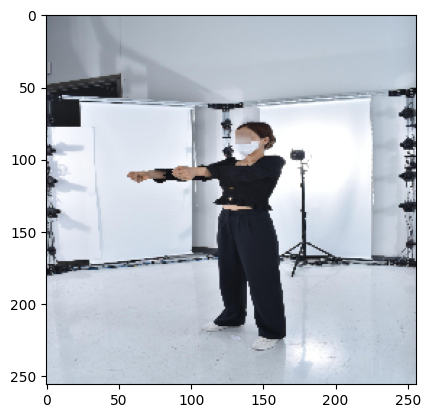

In [12]:
plt.imshow(data[0][0,:,:,::-1].astype(int))
plt.show()

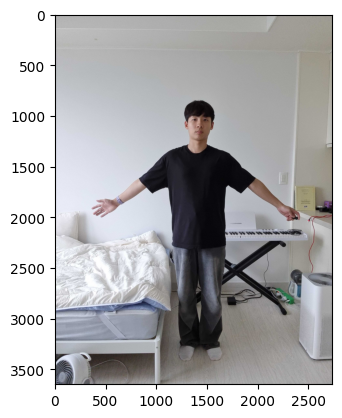

In [13]:
# 여기에 내 데이터 가져오기
from PIL import Image

test_img = Image.open('test_img.jpg')
image_array = np.array(test_img)

# 이미지를 표시
plt.imshow(image_array)
plt.show()

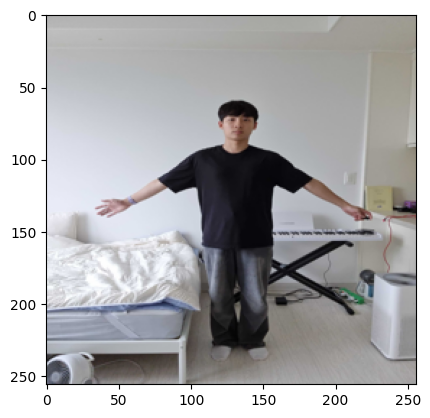

(256, 256, 3)

In [14]:
# 내 이미지 256x256으로 resize
image = Image.open('test_img.jpg')
image = image.resize((256,256))
image_array = np.array(image)
plt.imshow(image_array)
plt.show()
image_array = image_array/255
image_array.shape

In [15]:
print(data[0][0].shape)
print(data[2][0].shape)

(256, 256, 3)
(2,)


In [16]:
data[0][0] = image_array
data[2][0] = [169.8, 23.18]  # 키,  BMI 지수

In [17]:
result = model.predict([data[0], data[2]])

1/1 [==============================] - 0s 63ms/step


In [49]:
data[0].shape

(4, 256, 256, 3)

In [42]:
data[2]

array([[163.2     ,  21.964209],
       [163.4     ,  17.977825],
       [167.6     ,  26.37972 ],
       [164.1     ,  17.267752]], dtype=float32)

In [40]:
result.shape

(4, 31)

In [26]:
data[0][0]

array([[[0.6784314 , 0.6784314 , 0.6784314 ],
        [0.6784314 , 0.6784314 , 0.6784314 ],
        [0.6862745 , 0.6862745 , 0.6862745 ],
        ...,
        [0.60784316, 0.59607846, 0.5686275 ],
        [0.61960787, 0.60784316, 0.5803922 ],
        [0.6156863 , 0.6039216 , 0.5764706 ]],

       [[0.69411767, 0.69411767, 0.69411767],
        [0.6901961 , 0.6901961 , 0.6901961 ],
        [0.69411767, 0.69411767, 0.69411767],
        ...,
        [0.6156863 , 0.6039216 , 0.5764706 ],
        [0.61960787, 0.60784316, 0.5803922 ],
        [0.6117647 , 0.6       , 0.57254905]],

       [[0.69803923, 0.69803923, 0.69803923],
        [0.69803923, 0.69803923, 0.69803923],
        [0.69803923, 0.69803923, 0.69803923],
        ...,
        [0.6117647 , 0.6       , 0.57254905],
        [0.6117647 , 0.6       , 0.57254905],
        [0.6156863 , 0.6039216 , 0.5764706 ]],

       ...,

       [[0.42352942, 0.45882353, 0.5176471 ],
        [0.3882353 , 0.41960785, 0.48235294],
        [0.38039216, 0

In [27]:
result[0]

array([141.99019 ,  80.783295, 125.481804, 102.0262  ,  73.89154 ,
        43.8723  ,  56.325756,  35.79045 ,  90.354225,  79.7433  ,
        83.49724 ,  92.39348 ,  53.5515  ,  35.586464,  35.96719 ,
        21.348314,  25.590021,  30.149616,  24.012316,  15.323384,
        30.26518 ,  53.818844,  37.869865,  22.838095,  10.910241,
        24.538471,   9.493473,  14.262086,  17.962212,  10.00068 ,
         8.101232], dtype=float32)

In [ ]:
목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,
무릎높이,머리둘레,목둘레,젖가슴둘레,허리둘레,
배꼽수준허리둘레,엉덩이둘레,넙다리둘레,무릎둘레,장딴지둘레,
종아리최소둘레,발목둘레,편위팔둘레,편팔꿈치둘레,손목둘레,
위팔길이,팔길이,어깨사이너비,머리수직길이,얼굴수직길이,
발크기,발너비,얼굴너비,손직선길이,손바닥직선길이,
손안쪽가쪽직선길이

In [18]:
result[0]

array([141.82681 ,  80.861244, 124.326614, 102.638954,  73.64758 ,
        42.38927 ,  58.35511 ,  32.422955,  94.441986,  78.903336,
        85.94682 ,  97.58288 ,  56.72273 ,  36.191364,  36.954983,
        22.230034,  25.112387,  29.157673,  23.986109,  16.413754,
        31.274263,  56.11498 ,  35.35891 ,  21.29895 ,  11.758543,
        24.804152,  10.213607,  13.323158,  18.415707,  10.630233,
         8.449633], dtype=float32)

In [12]:
config = {
        # model
        'input_shape': [256,256,3],
        'batch_size': 1,
        'path_pretrained': None, 
        'type_backbone': "blazepose", 
        
        # loss
        'type_loss_fn': 'wing',
        
        # data
        'seg_shape': [64,64],
        'path_classes': "../seg_classes.txt",
        'shuffle': True, 
        'is_normalized': False, 
        'is_with_seg': False, 
        'path_dataset': "D:\\data\\body_parts_measurement",
        ## attention type
        'type_attention': "regression", #regression, categorical, none
        'num_category_bmi': 10,
        'num_category_height': 10,
        'has_filename': True,

        # train
        'epochs': 30,
        'eval_term': 1
    }
model = get_model(config)
model.summary()
model.load_weights('blazepose_attention_31features_1002train_mf/blazepose_attention_0_3.2034787193590604.h5')
data_generator_test = BodyPartsMeasurementDataGenerator(config, data_type="test")

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(1, 256, 256, 3)]   0                                            
__________________________________________________________________________________________________
conv2d_118 (Conv2D)             (1, 128, 128, 24)    672         input_9[0][0]                    
__________________________________________________________________________________________________
sequential_144 (Sequential)     (1, 128, 128, 24)    840         conv2d_118[0][0]                 
__________________________________________________________________________________________________
tf.__operators__.add_18 (TFOpLa (1, 128, 128, 24)    0           conv2d_118[0][0]                 
                                                                 sequential_144[0][0]       

In [13]:
f_w = open("eval_results_test.txt","w")
f_w.write("Evaluation Started At "+datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "\n")

list_mape = []
list_diff_percentage_parts_measurements = []



for idx in tqdm(range(len(data_generator_test))) :
    try :
        batch_data = data_generator_test.get_data(idx)
    except :
        print("idx",idx,"wrong")
    batch_images, batch_body_parts_measurement, batch_categorical_bmi_and_height, filename = batch_data
    batch_images, batch_body_parts_measurement, batch_categorical_bmi_and_height = np.expand_dims(batch_images, axis=0), np.expand_dims(batch_body_parts_measurement, axis=0), np.expand_dims(batch_categorical_bmi_and_height, axis=0)

    pd_parts_measurements = model.predict([batch_images, batch_categorical_bmi_and_height])
    batch_diff_parts_measurements = abs(batch_body_parts_measurement - pd_parts_measurements)
    batch_diff_percentage_parts_measurements = abs(batch_diff_parts_measurements / batch_body_parts_measurement)
    

    mape = sum(batch_diff_percentage_parts_measurements[0]) / len(batch_diff_percentage_parts_measurements[0])

    str_filename = str(idx) + " filename: " + filename + "\n"
    str_gt = "gt: " + ", ".join(str(x) for x in batch_body_parts_measurement[0]) + "\n"
    str_pd = "pd: " + ", ".join(str(x) for x in pd_parts_measurements[0]) + "\n"
    str_pe = "ape: " + ", ".join(str(x) for x in batch_diff_percentage_parts_measurements[0]) + "\n"
    str_mape = "MAPE : " + str(mape) + "\n\n"

    f_w.write(str_filename)
    f_w.write(str_gt)
    f_w.write(str_pd)
    f_w.write(str_pe)
    f_w.write(str_mape)

    list_mape.append(mape)
    list_diff_percentage_parts_measurements.append(batch_diff_percentage_parts_measurements)

np_diff_percentage_parts_measurements = np.squeeze(np.array(list_diff_percentage_parts_measurements))
for idx in range(np_diff_percentage_parts_measurements.shape[1]) :
    part_mape = sum(np_diff_percentage_parts_measurements[:,idx])/np_diff_percentage_parts_measurements.shape[0]
    f_w.write("Part MAPE "+ str(idx) + ": " + str(part_mape) + "\n")

f_w.write("MAPE for Test Dataset : " + str(sum(list_mape)/len(list_mape)) + "\n")
f_w.write("Evaluation Ended At "+datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S') + "\n")
f_w.close()

 17%|█▋        | 20601/120960 [33:07<2:26:53, 11.39it/s]

idx 20600 wrong


100%|██████████| 120960/120960 [3:19:16<00:00, 10.12it/s] 
